#Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.



In [100]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

#Digits dataset


The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

Note: if we were working from image files (e.g., ‘png’ files), we would load them using matplotlib.pyplot.imread.



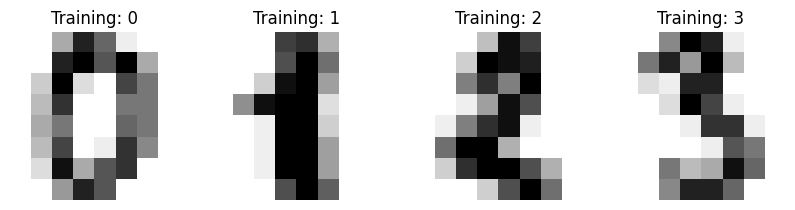

In [103]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

#Classification

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.


We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [104]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted digit value in the title.



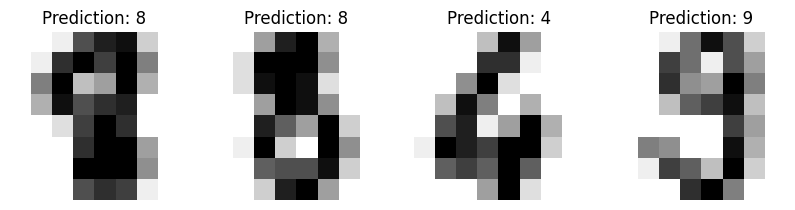

In [105]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

classification_report builds a text report showing the main classification metrics.



In [106]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




We can also plot a confusion matrix of the true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


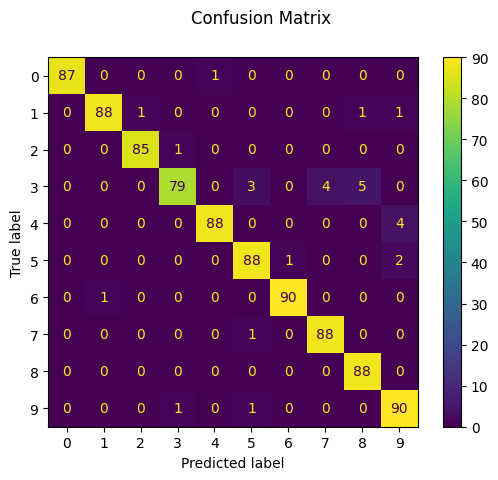

In [107]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

If the results from evaluating a classifier are stored in the form of a confusion matrix and not in terms of y_true and y_pred, one can still build a classification_report as follows:

In [108]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




#Dự đoán trên dataset chữ viết tay tự viết

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')

In [111]:
# Lấy đường link truy cập vào dataset ảnh từ drive
link_drive = '/content/drive/MyDrive/ML/data/'
data_drive = os.listdir(link_drive)

## Xử lí ảnh và dự đoán

Số lượng ảnh từ drive: 90


<ipython-input-119-e7e7d58e1f85>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))


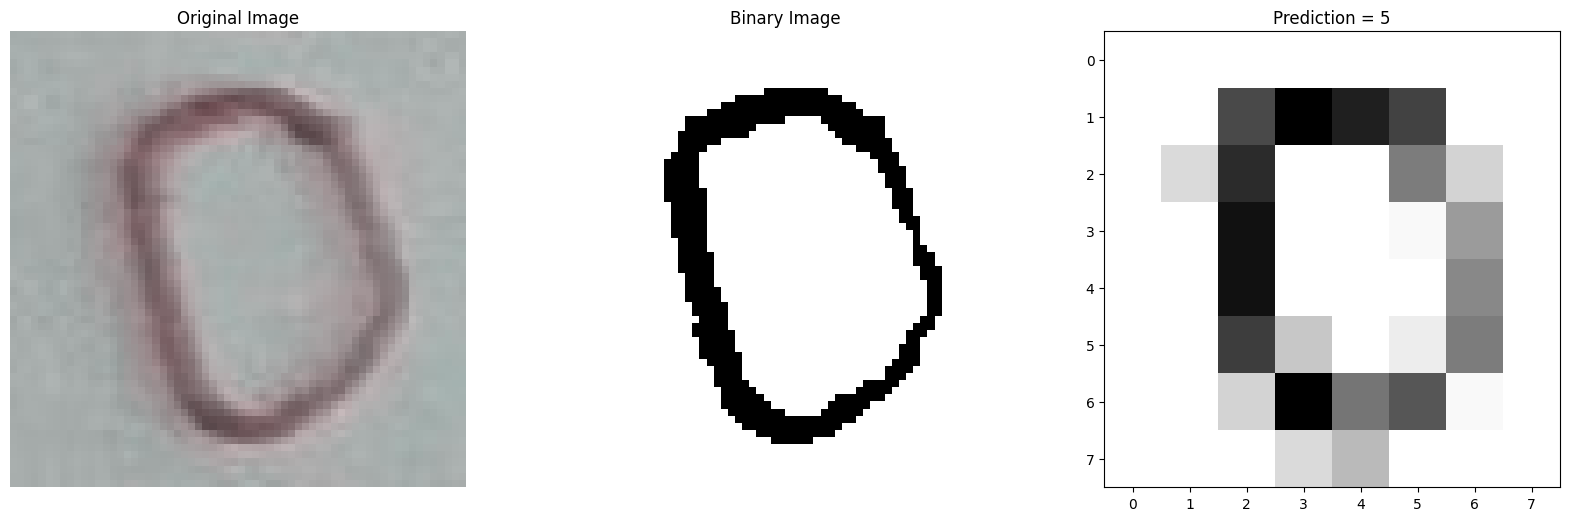

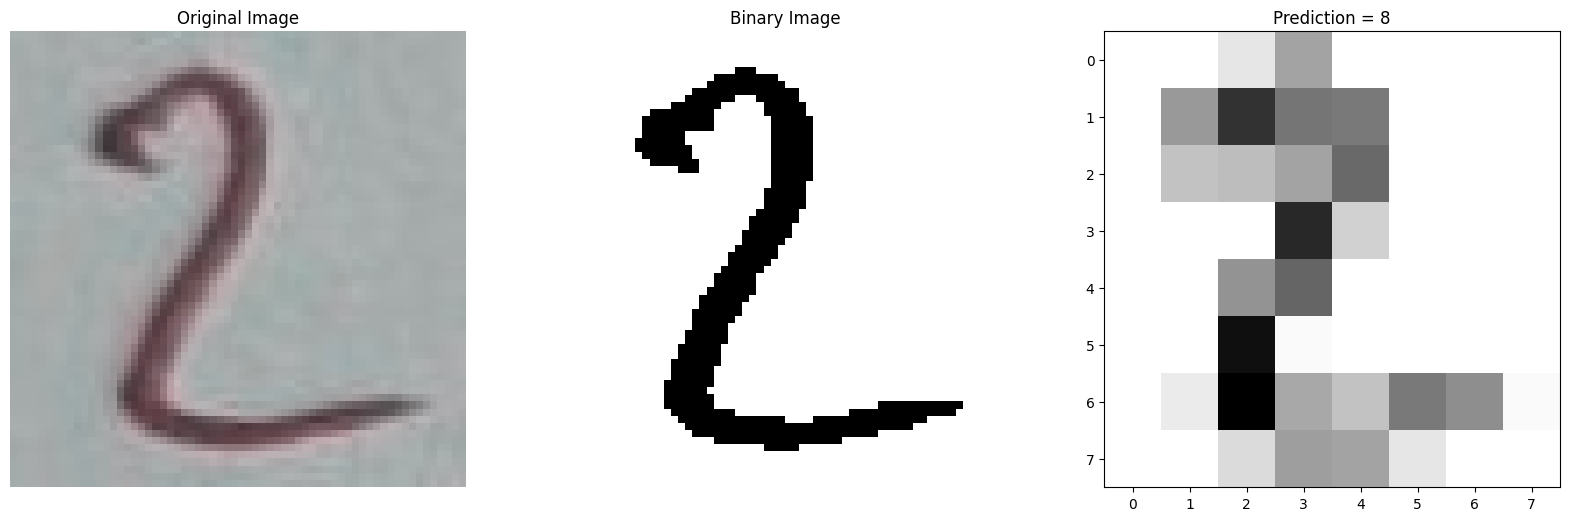

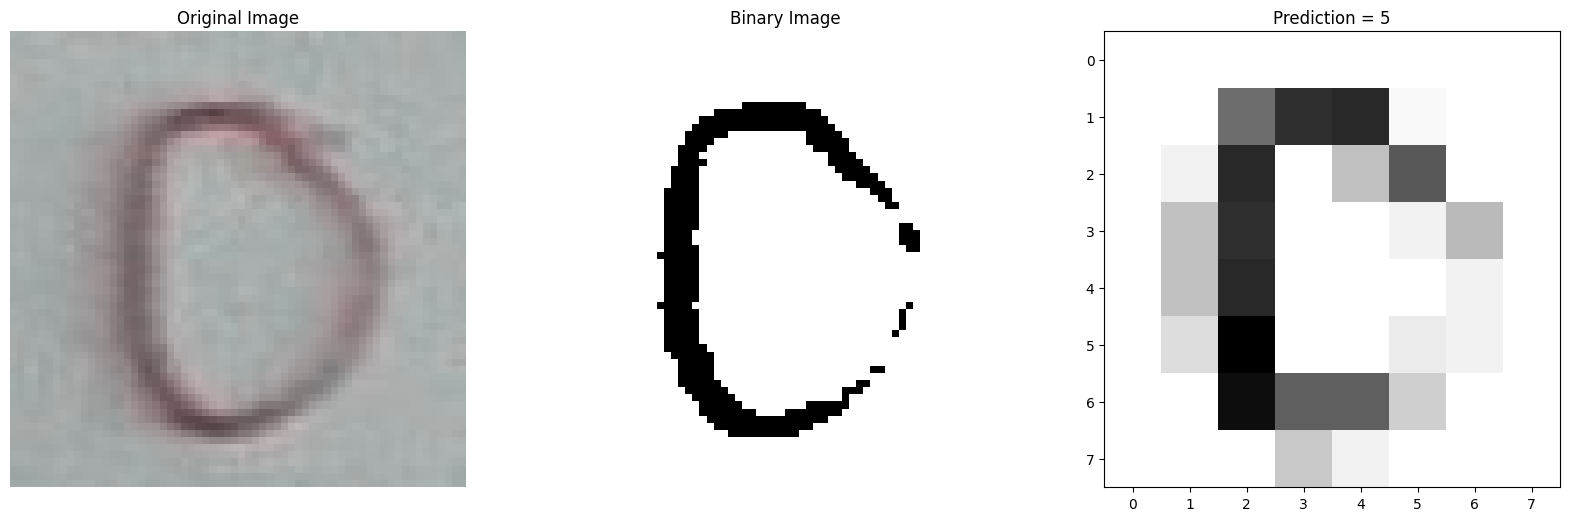

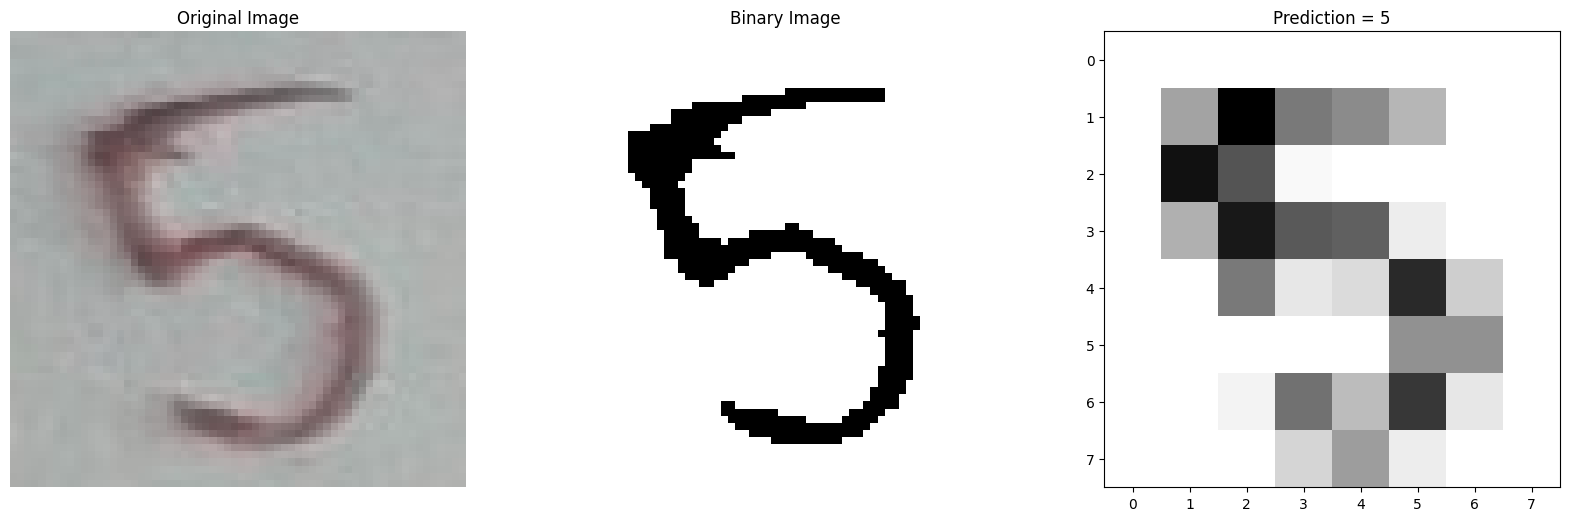

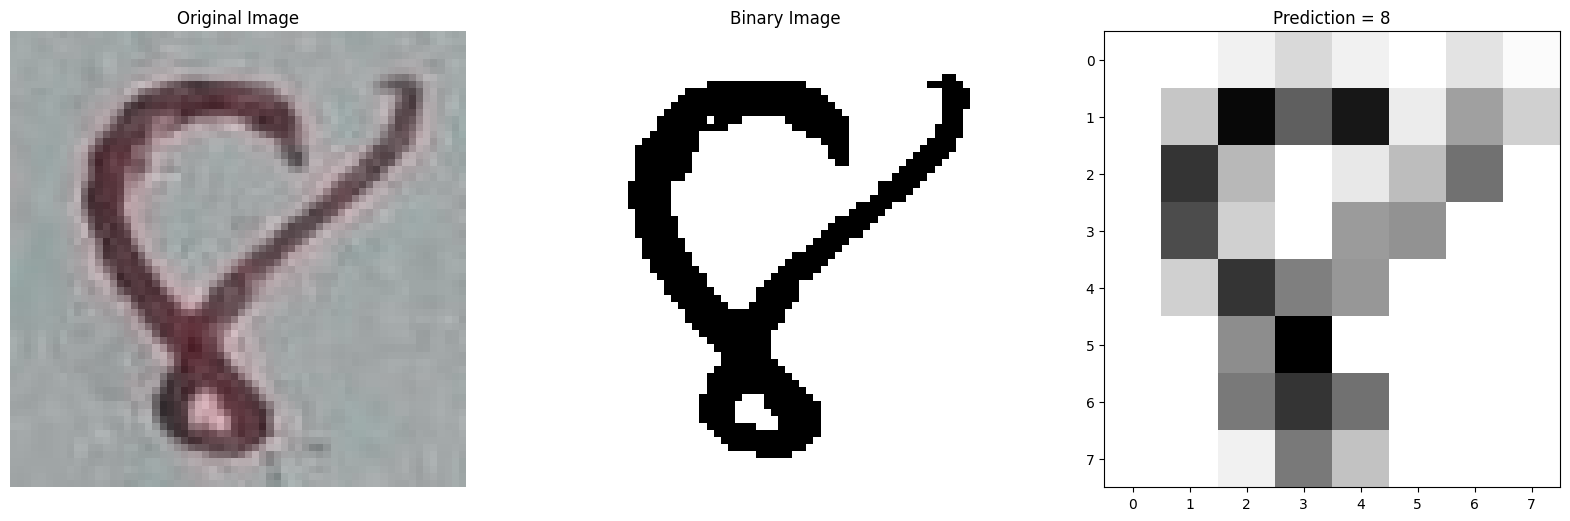

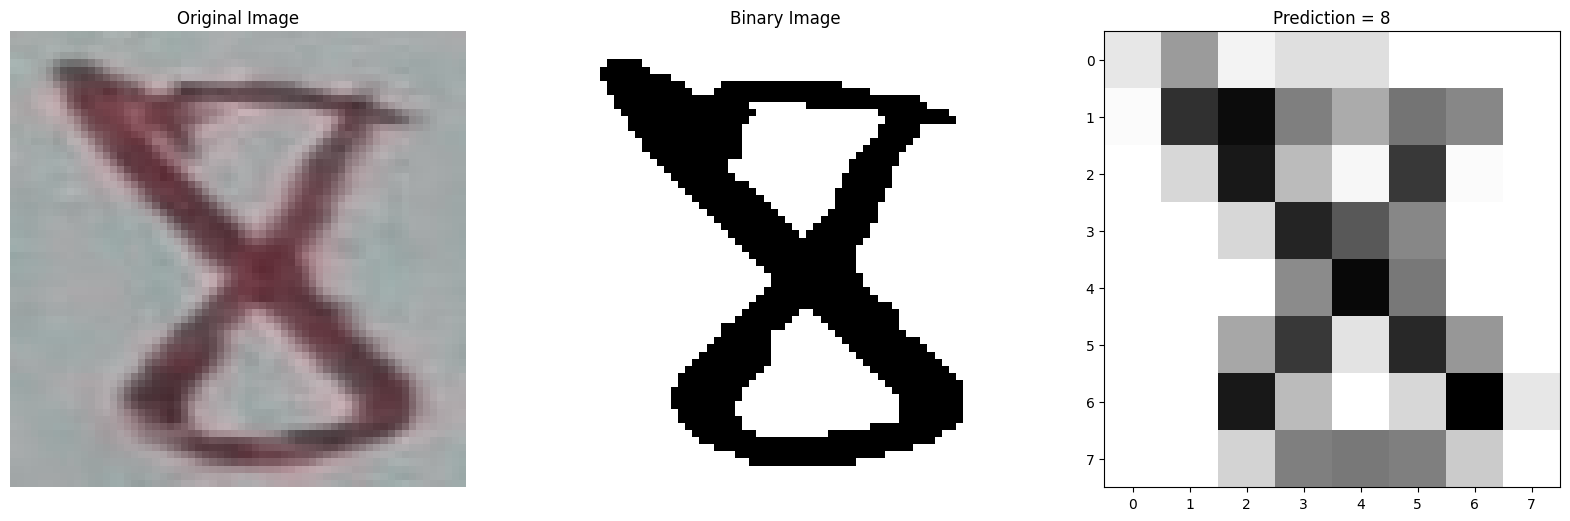

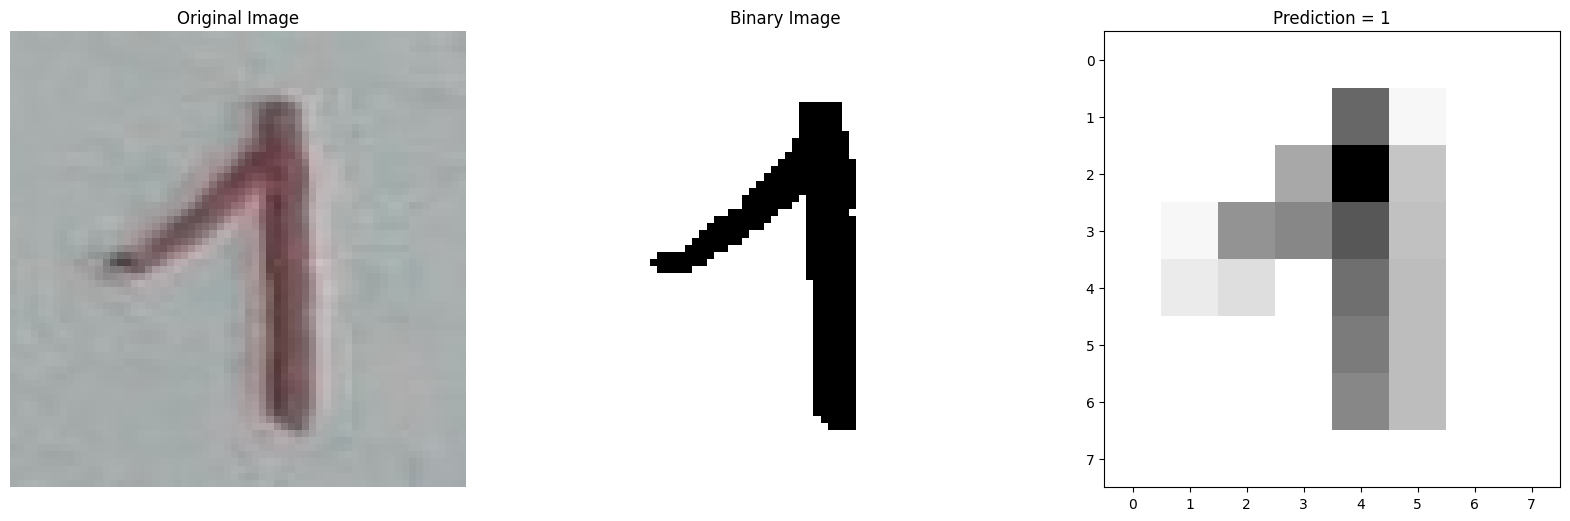

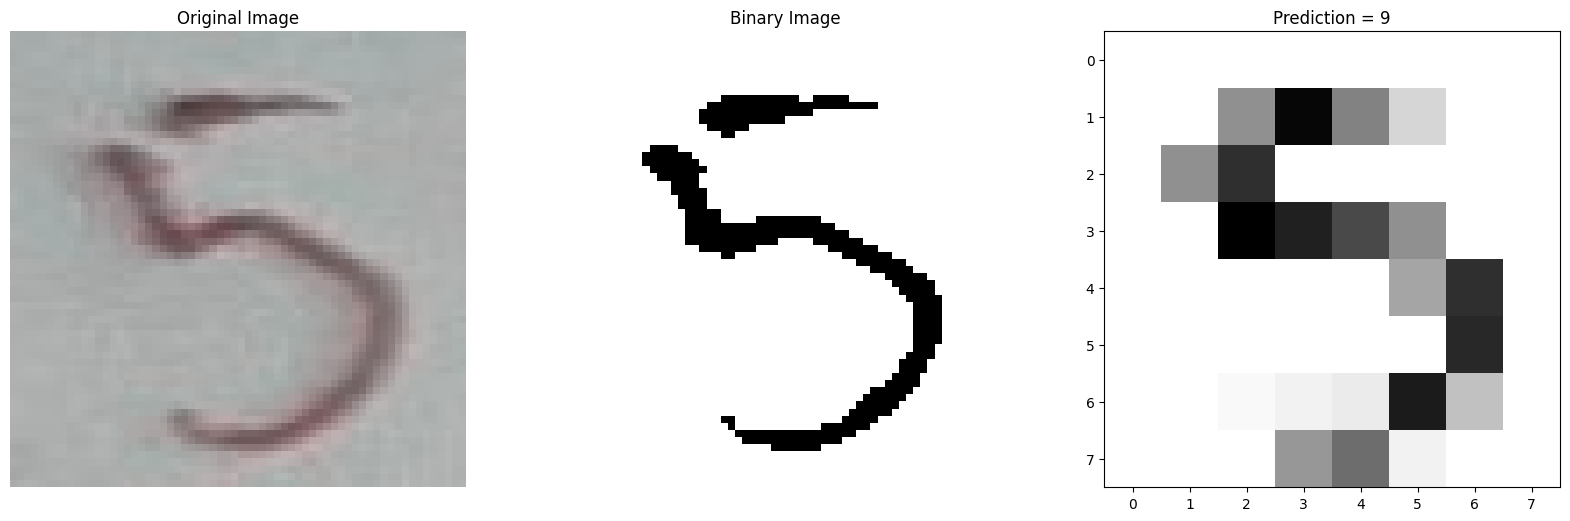

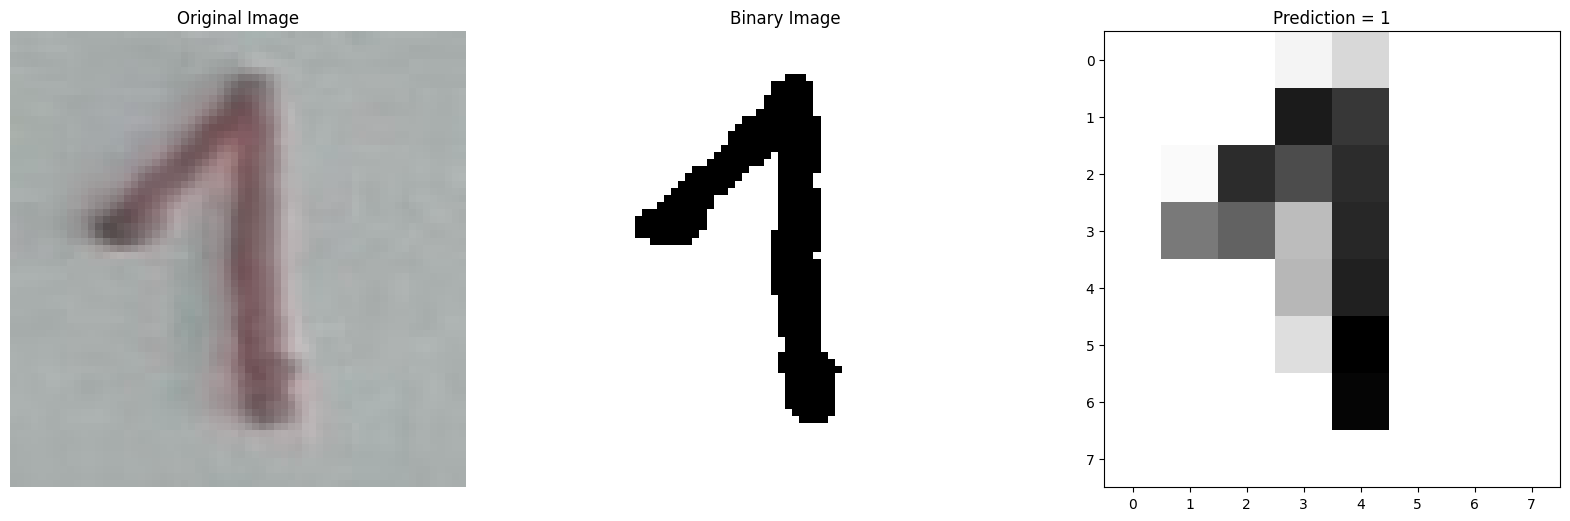

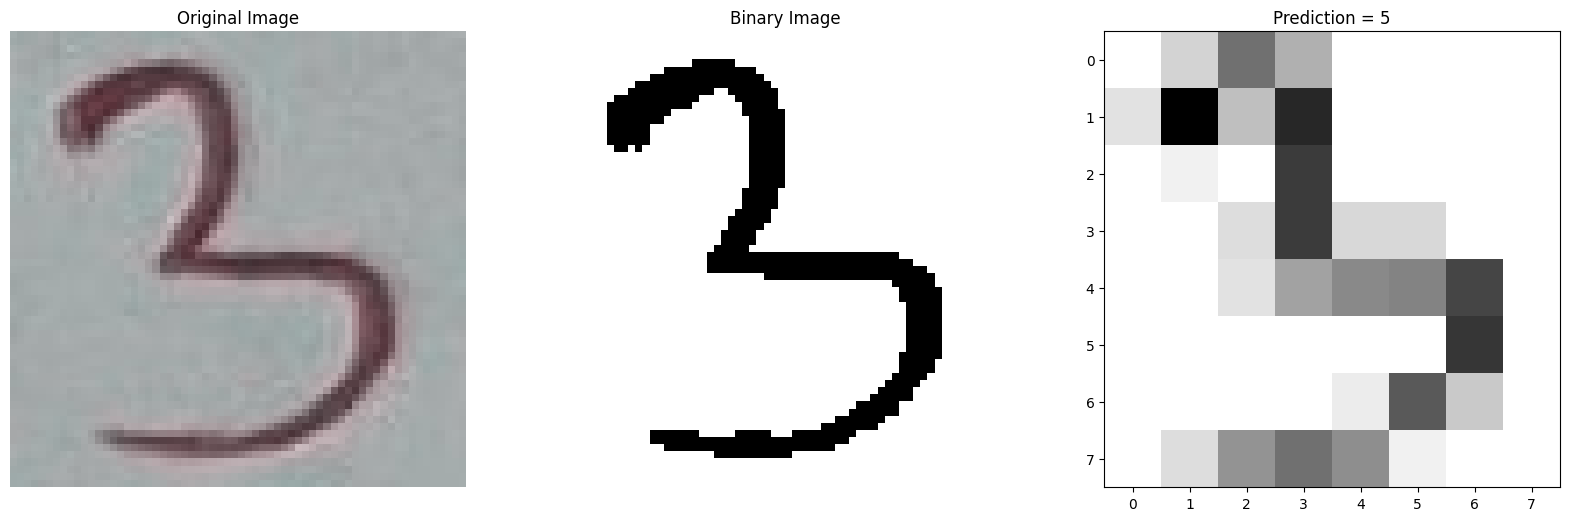

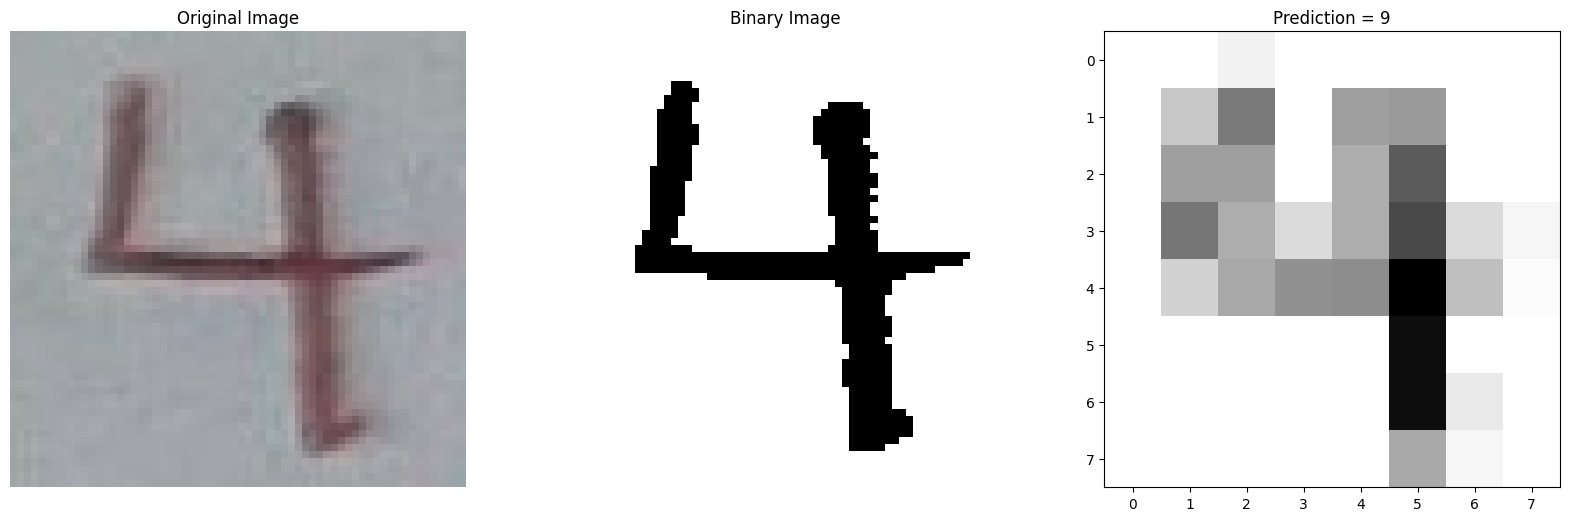

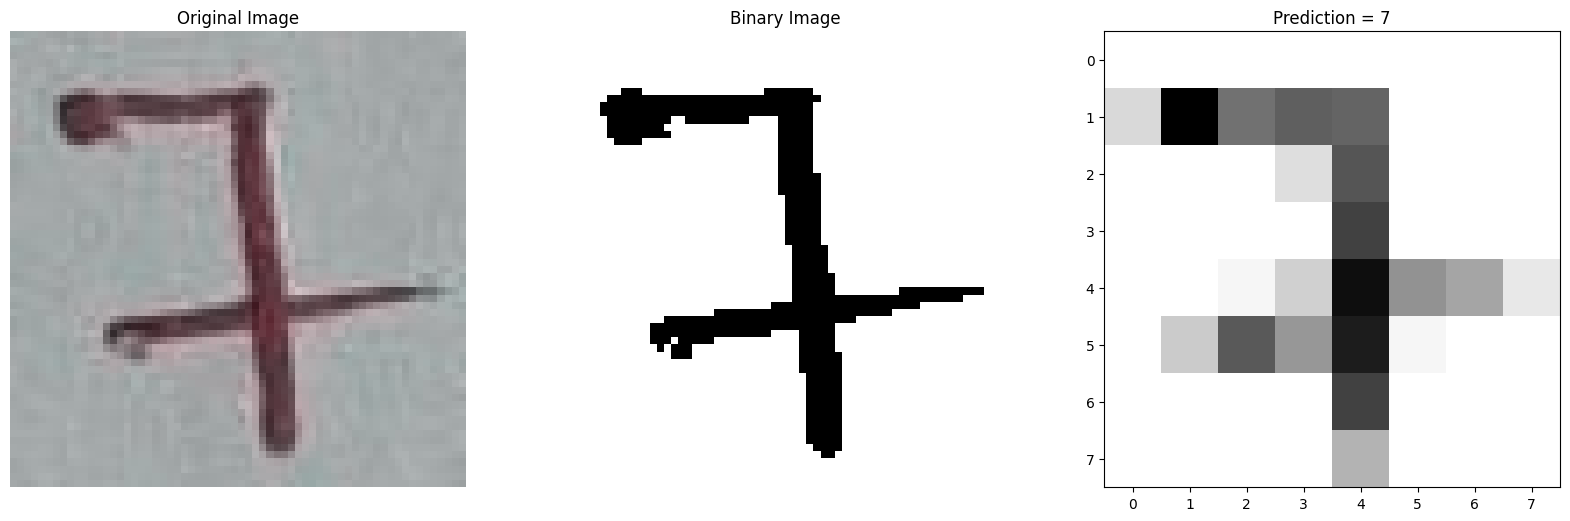

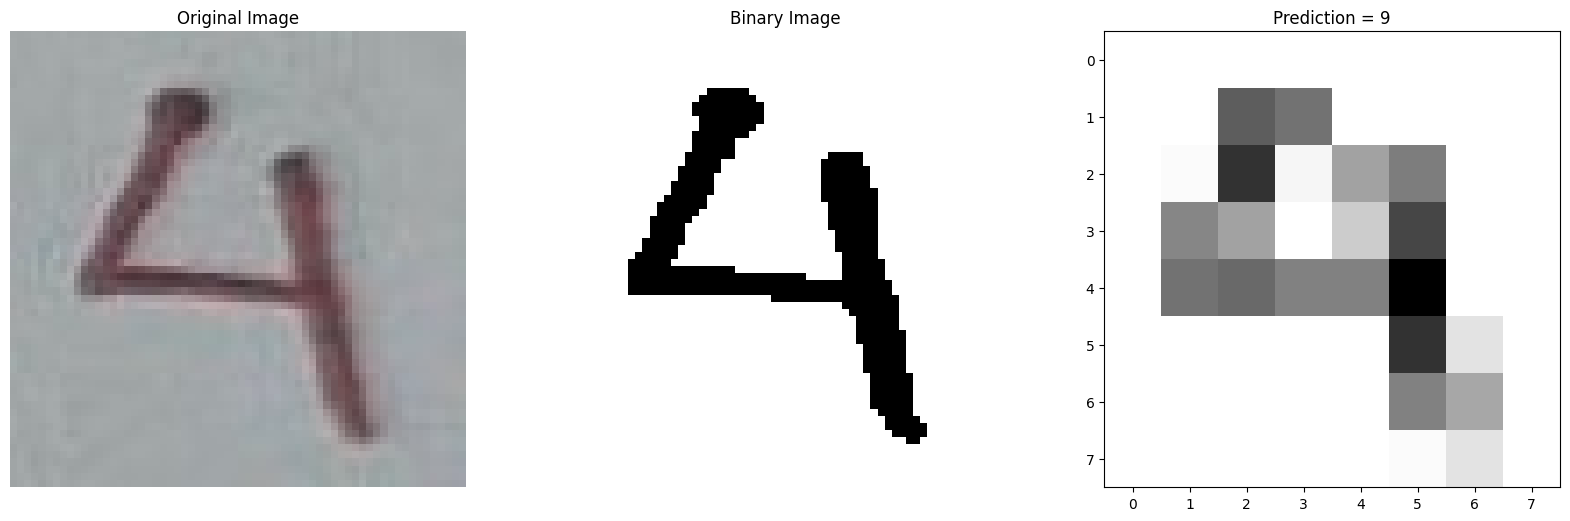

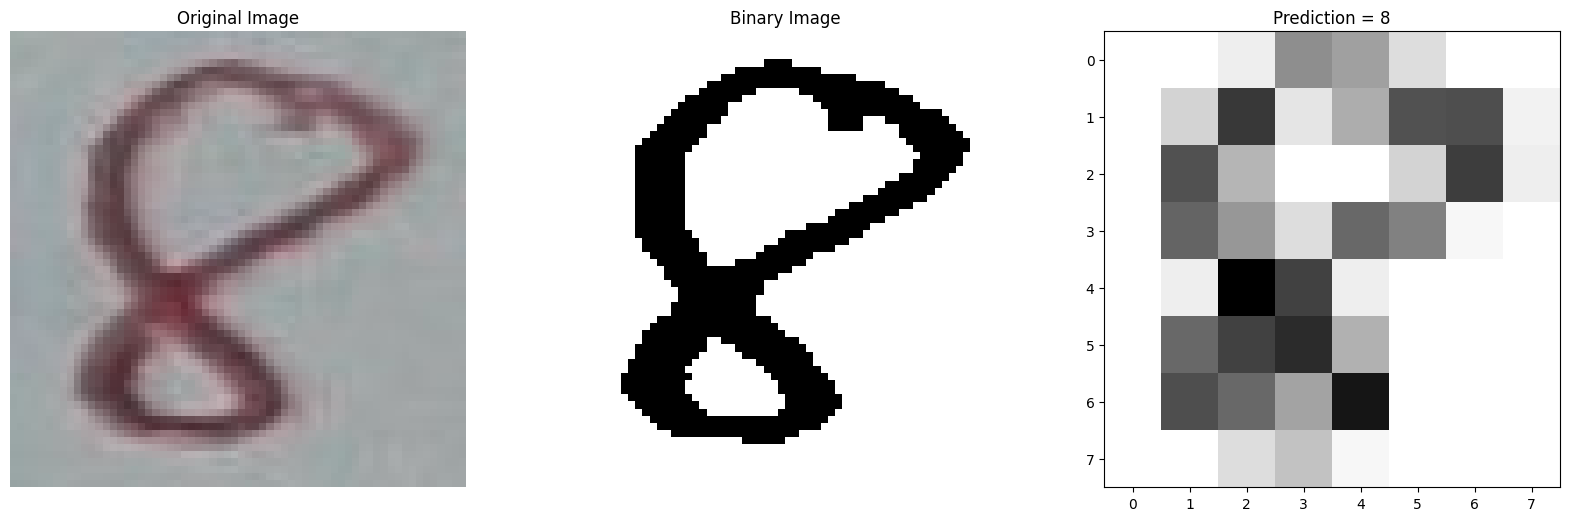

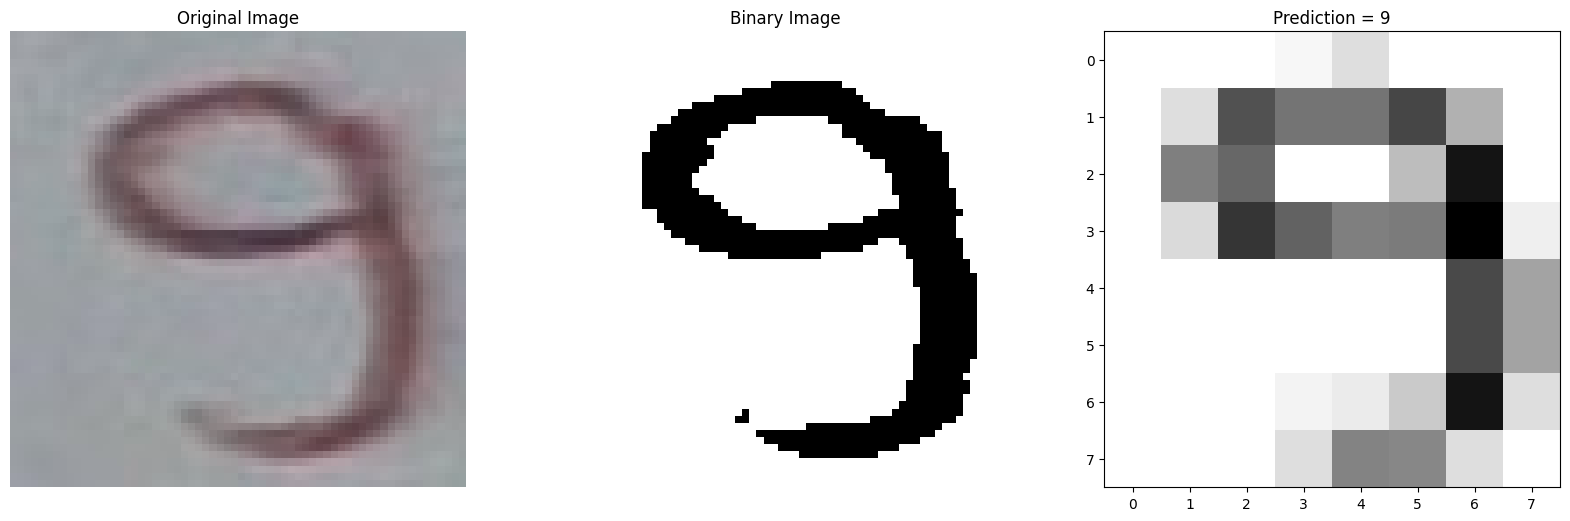

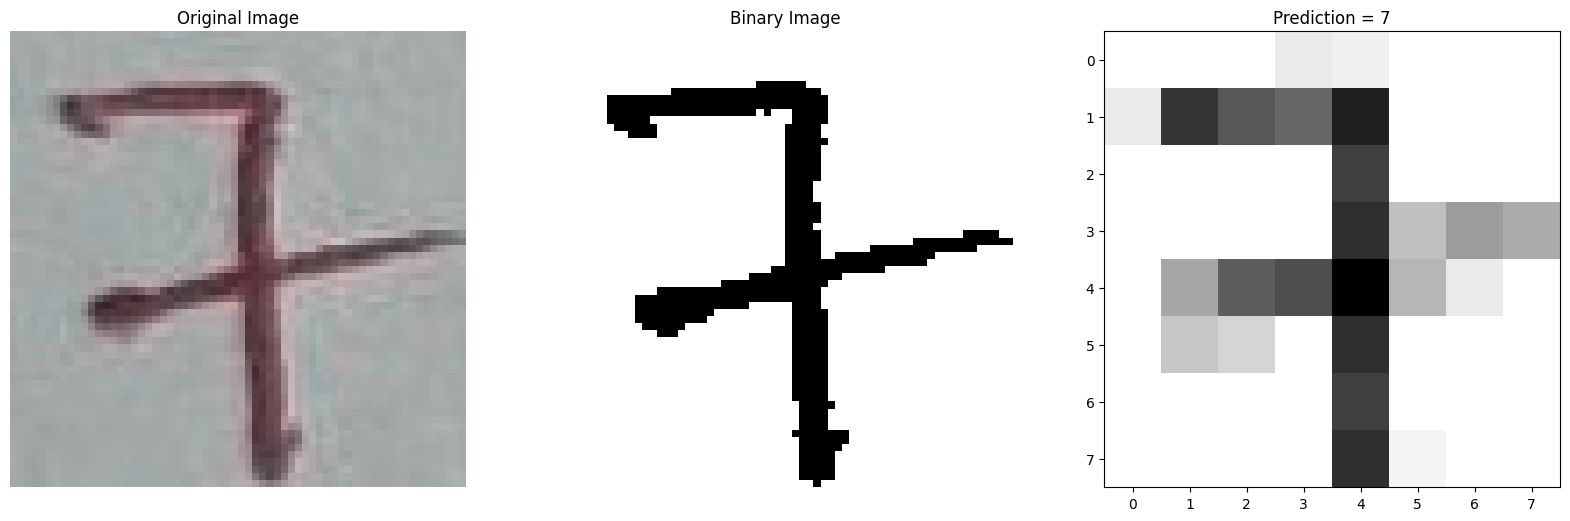

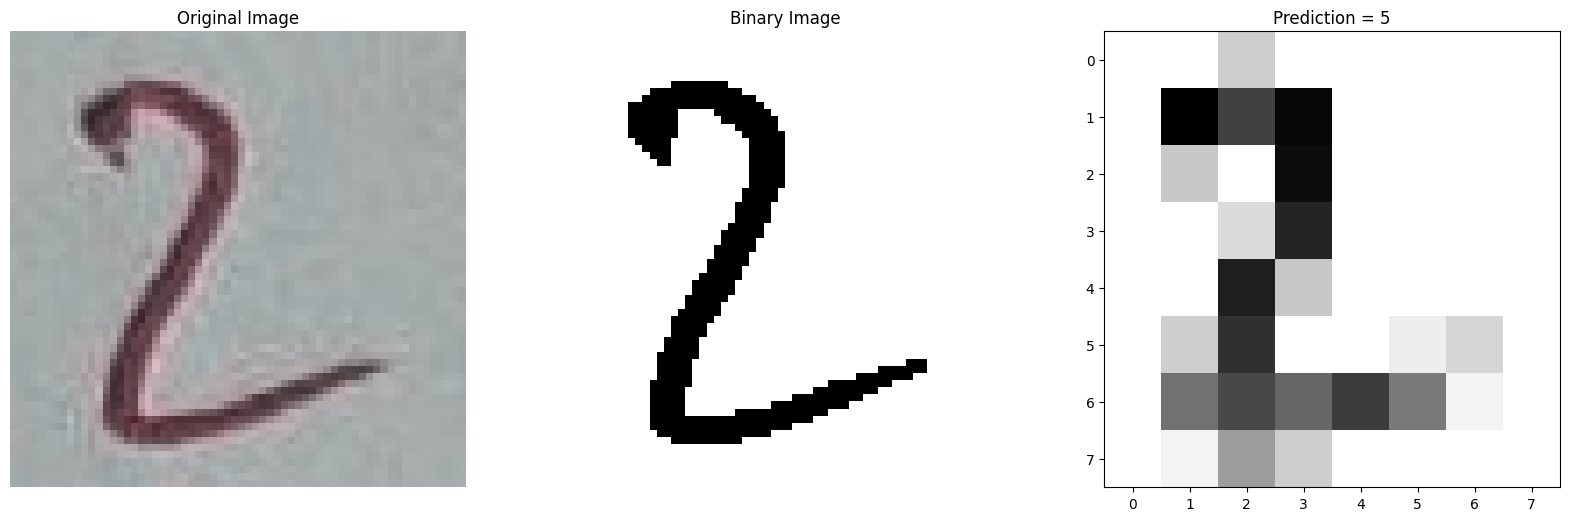

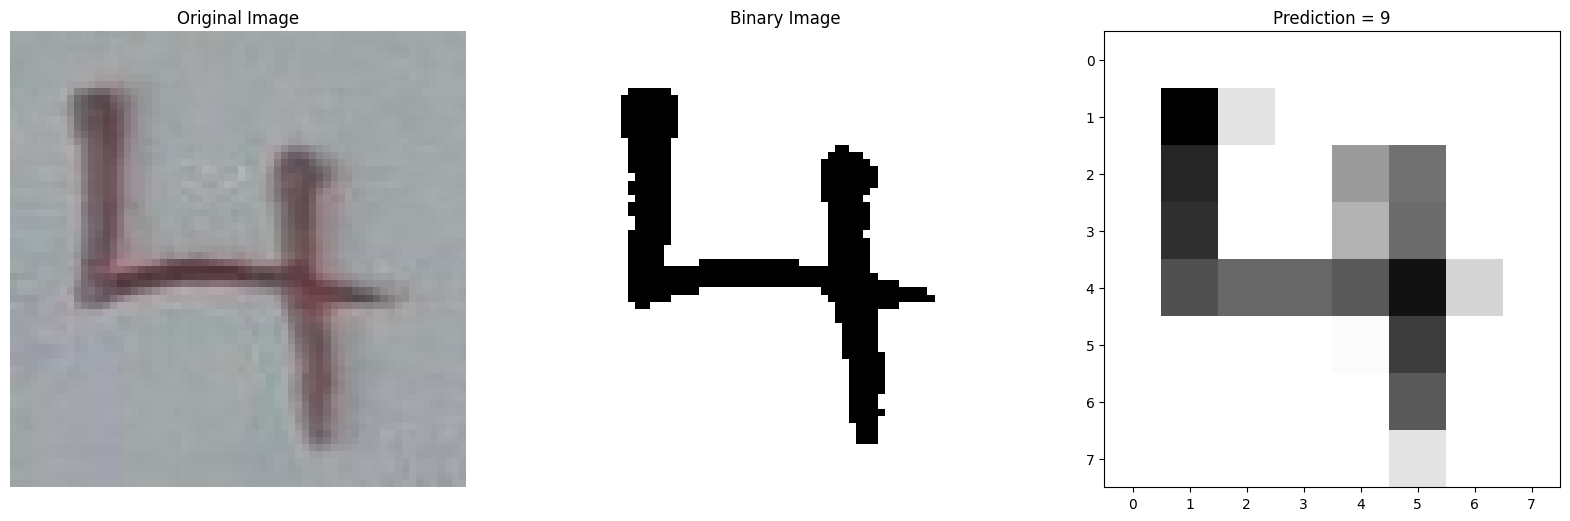

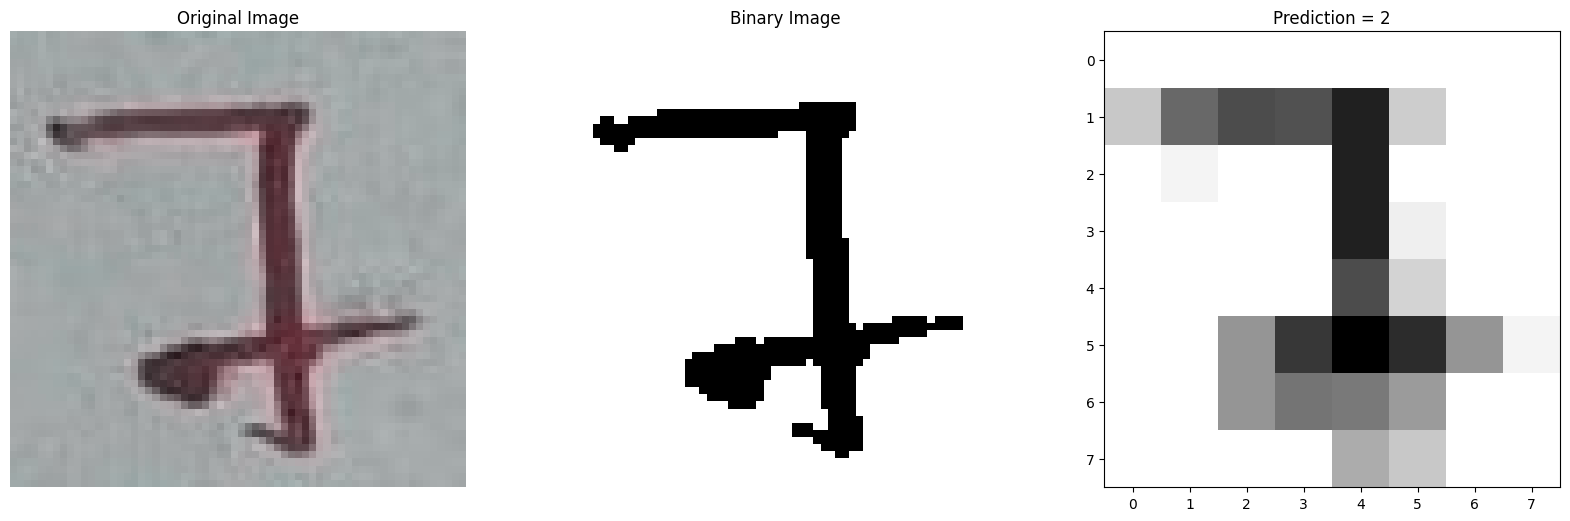

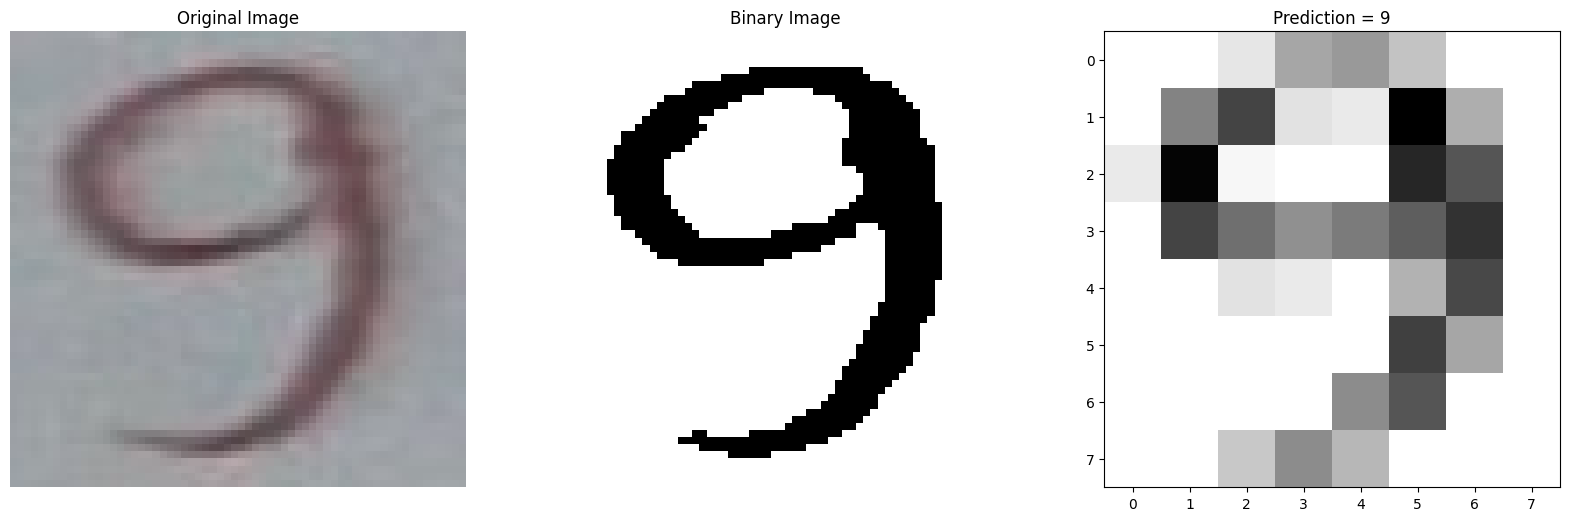

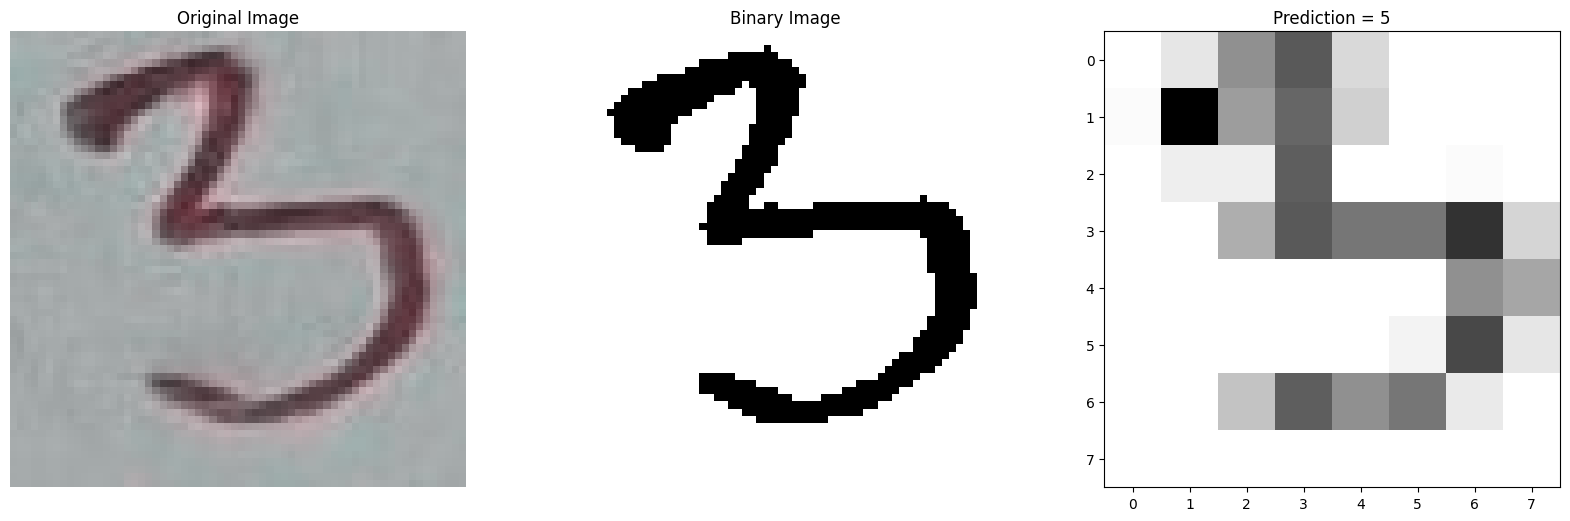

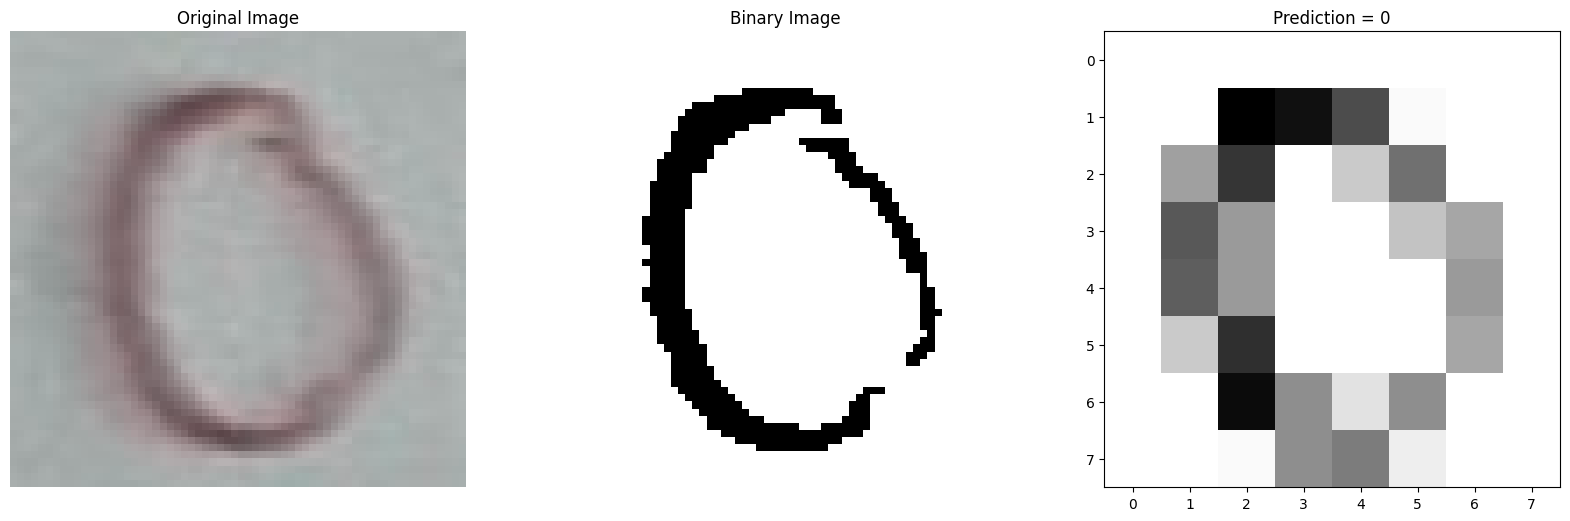

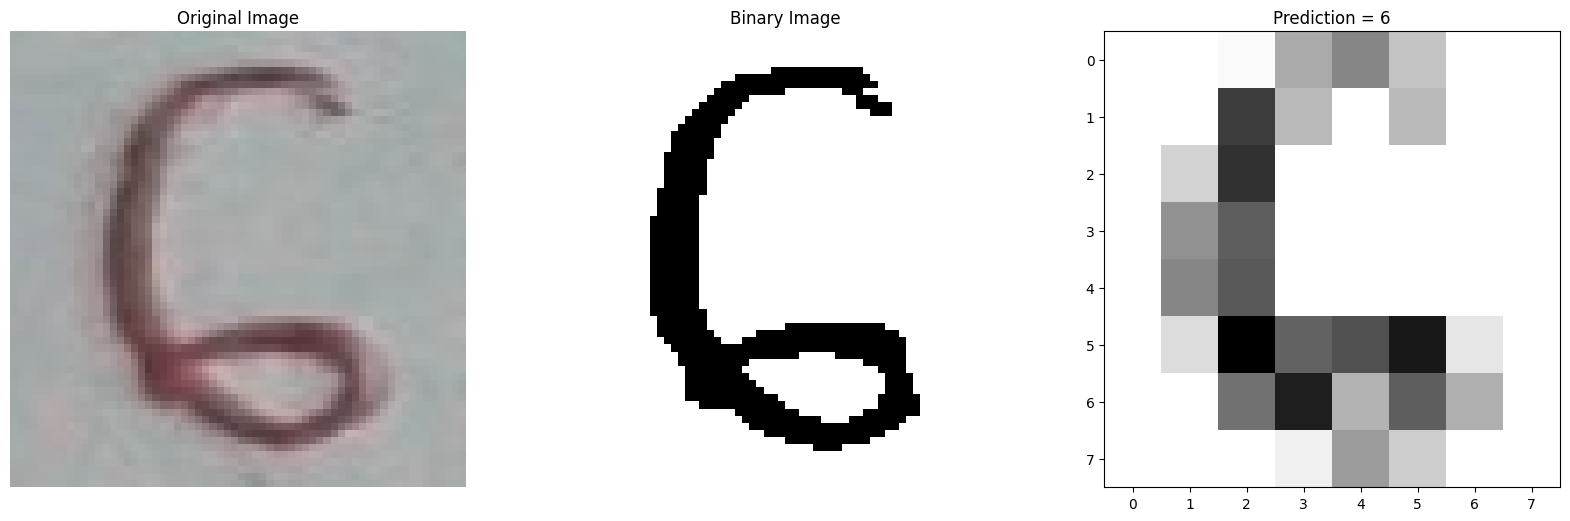

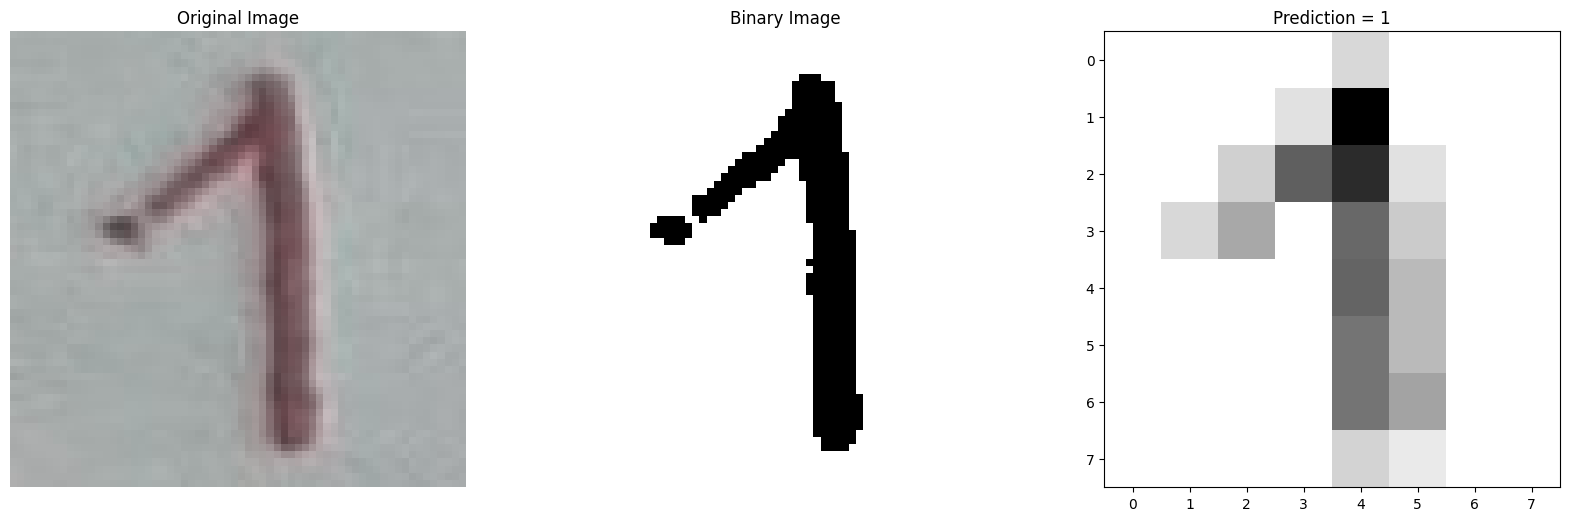

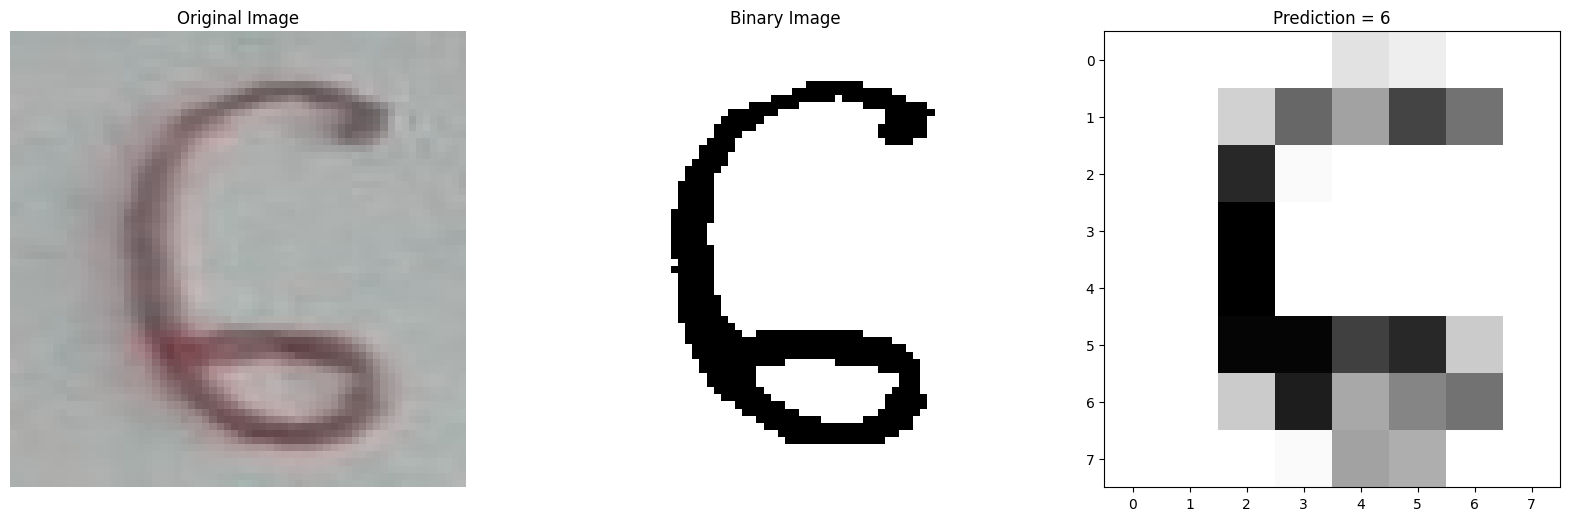

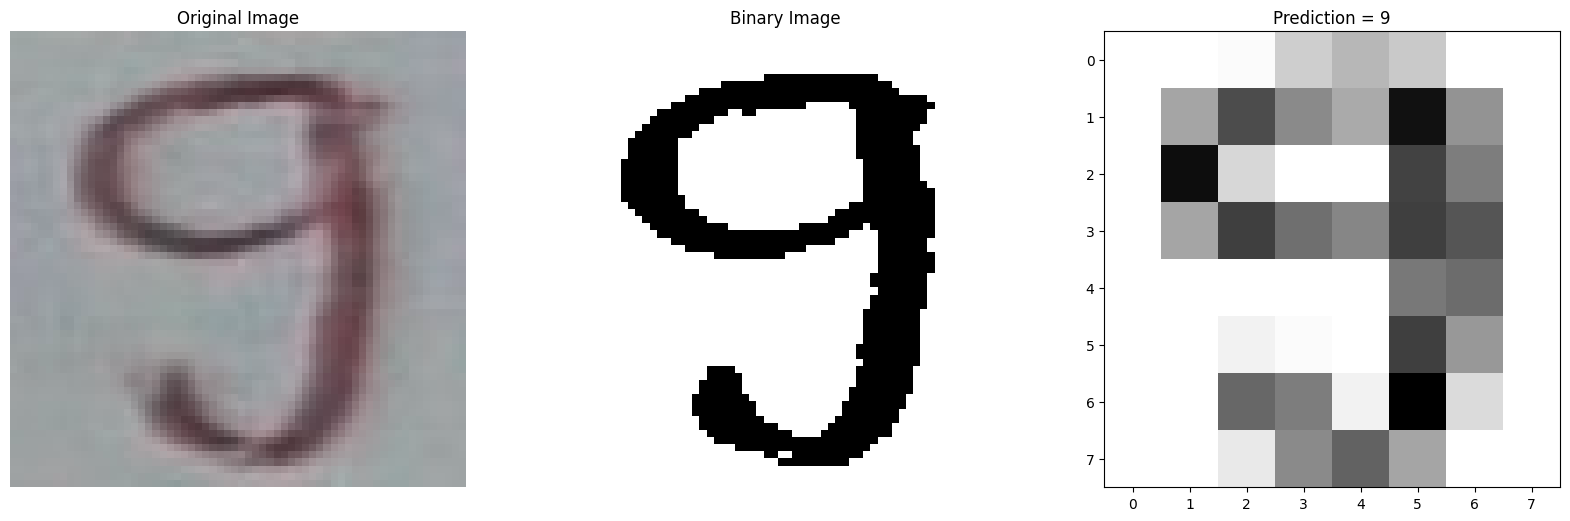

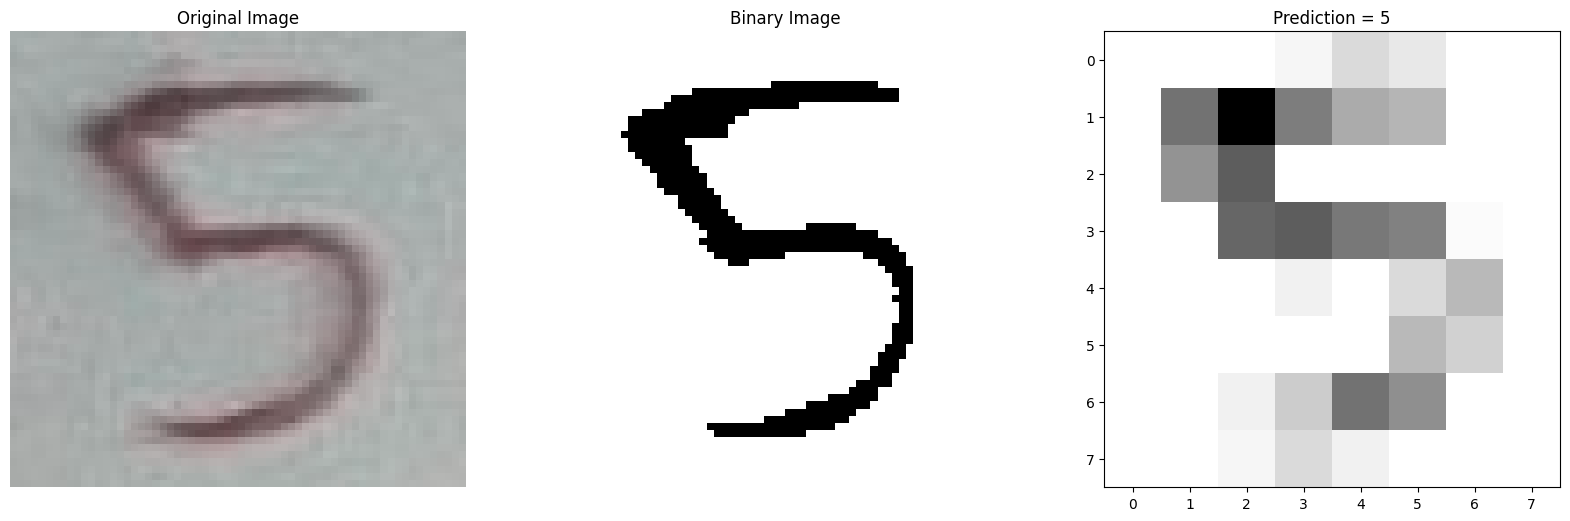

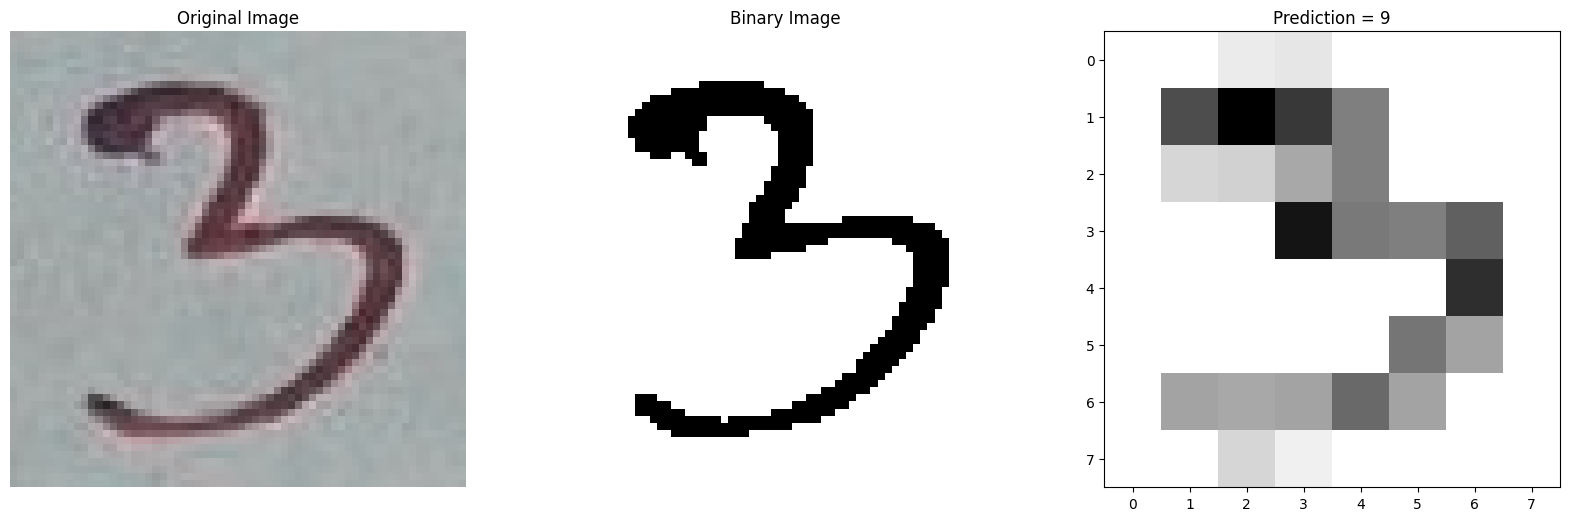

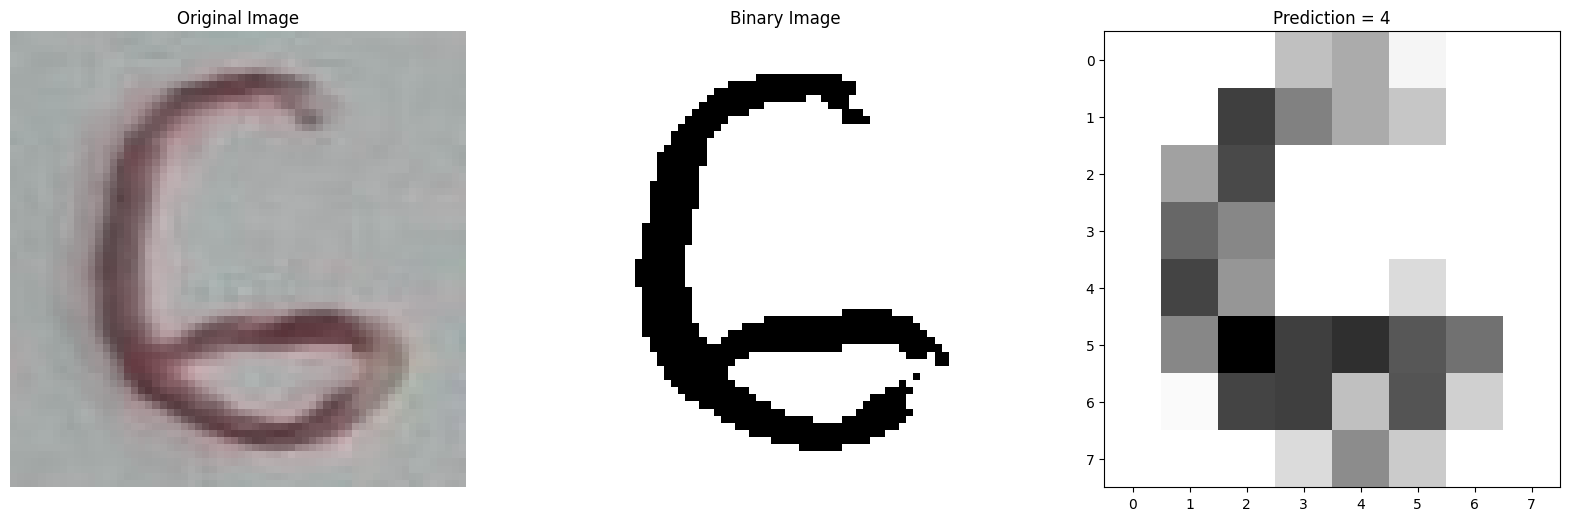

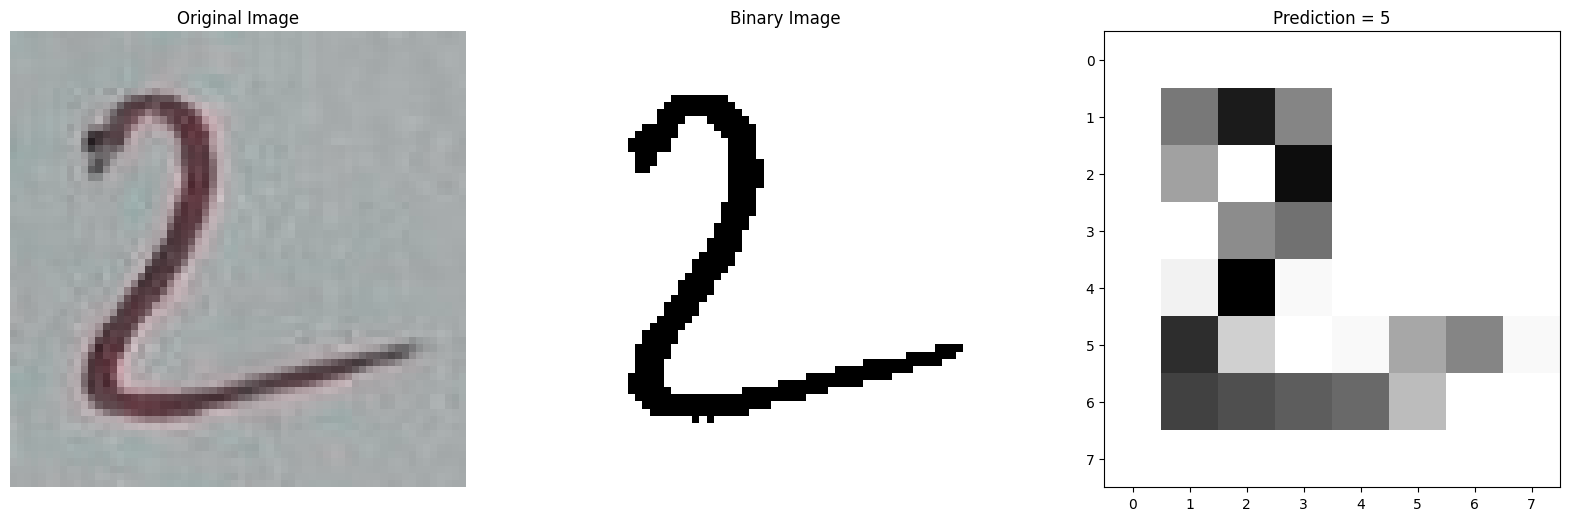

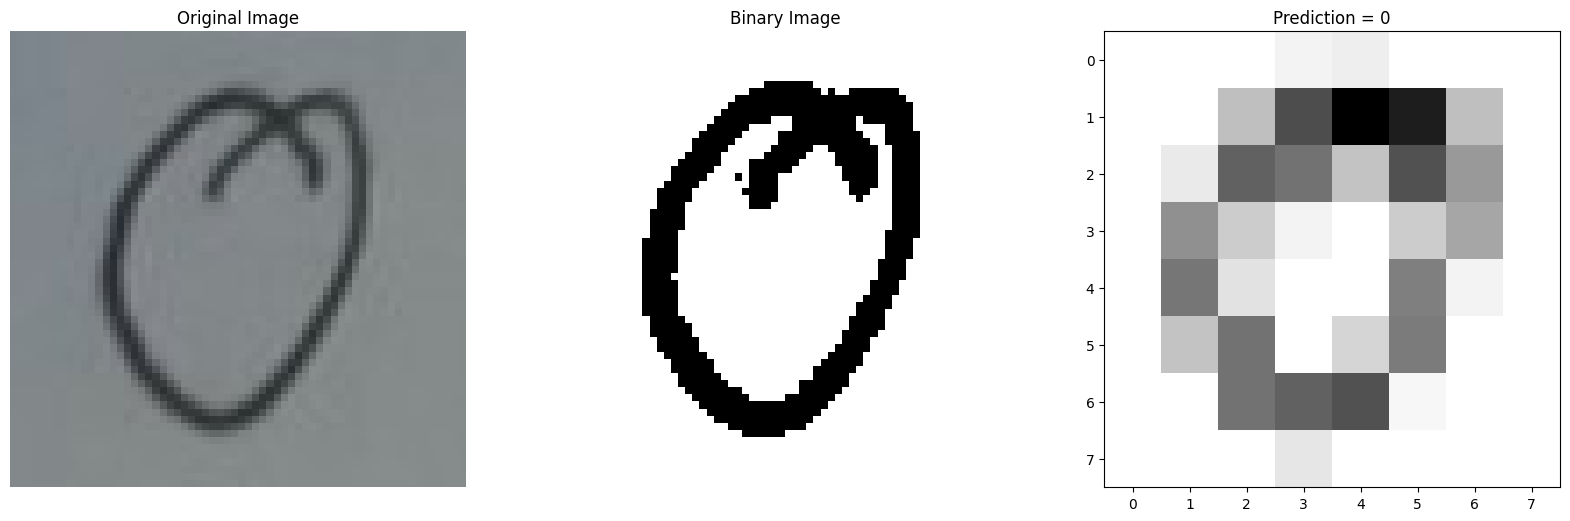

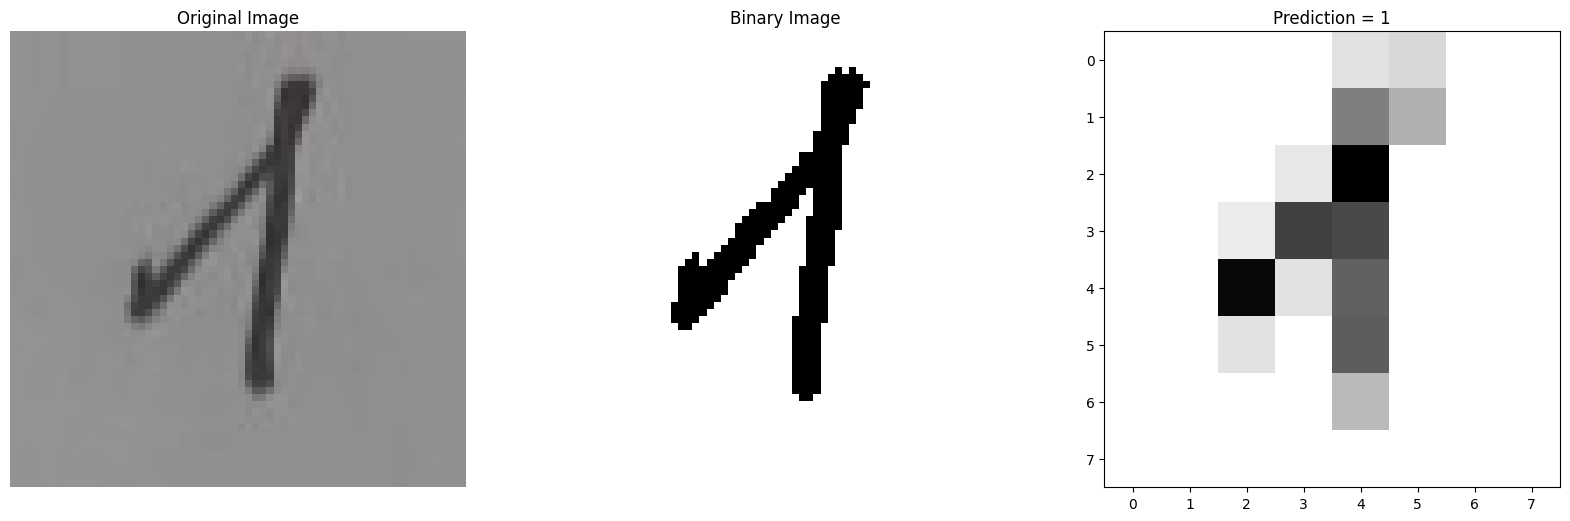

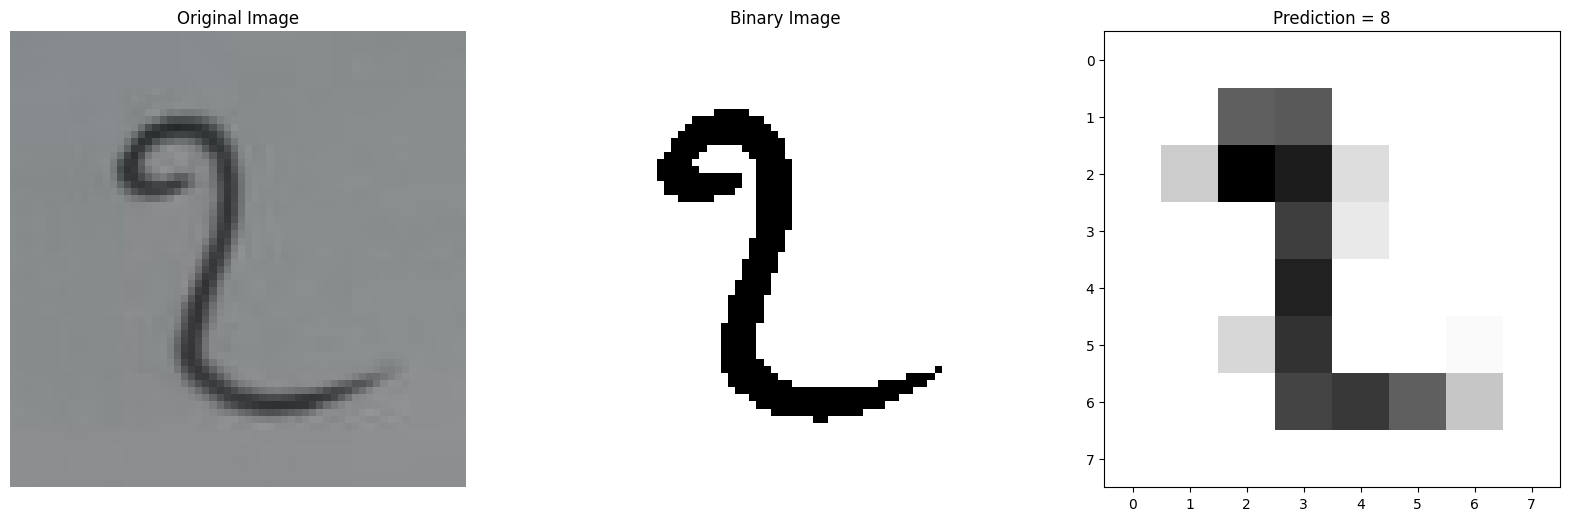

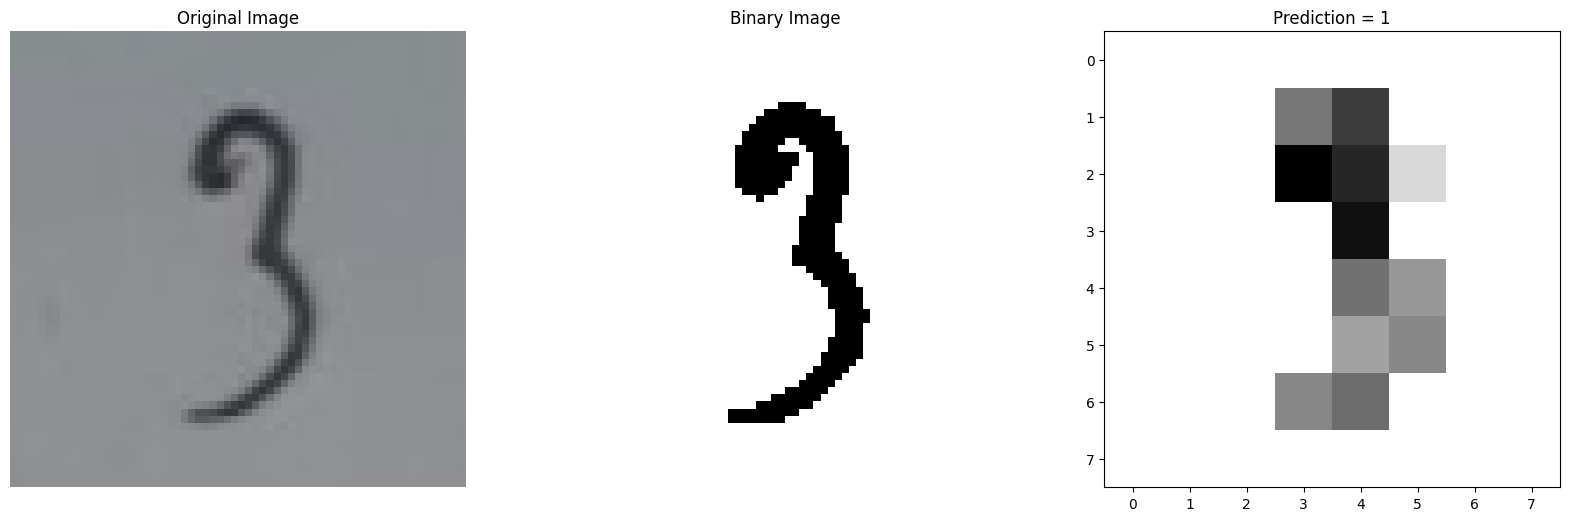

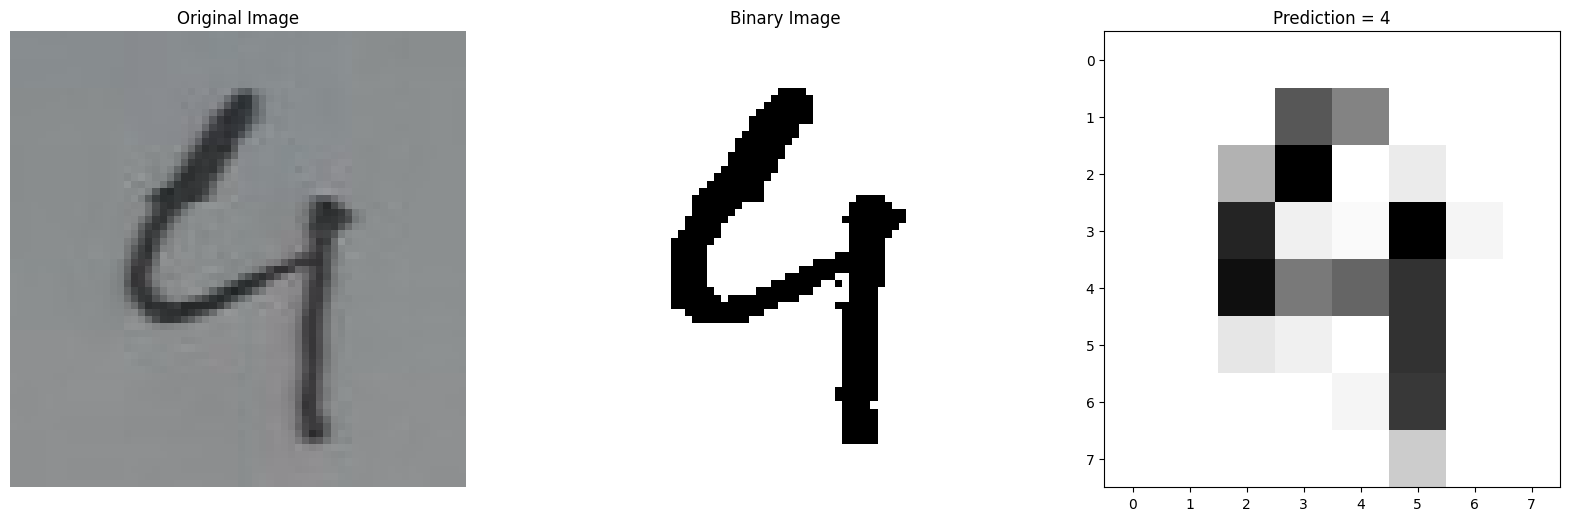

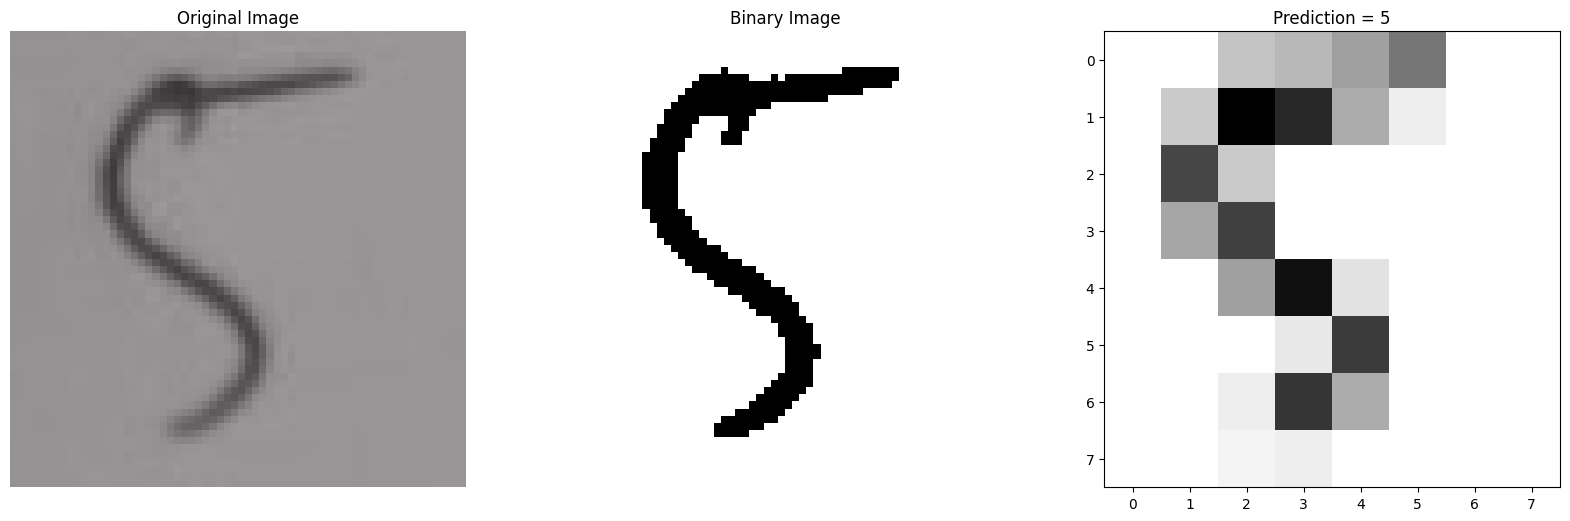

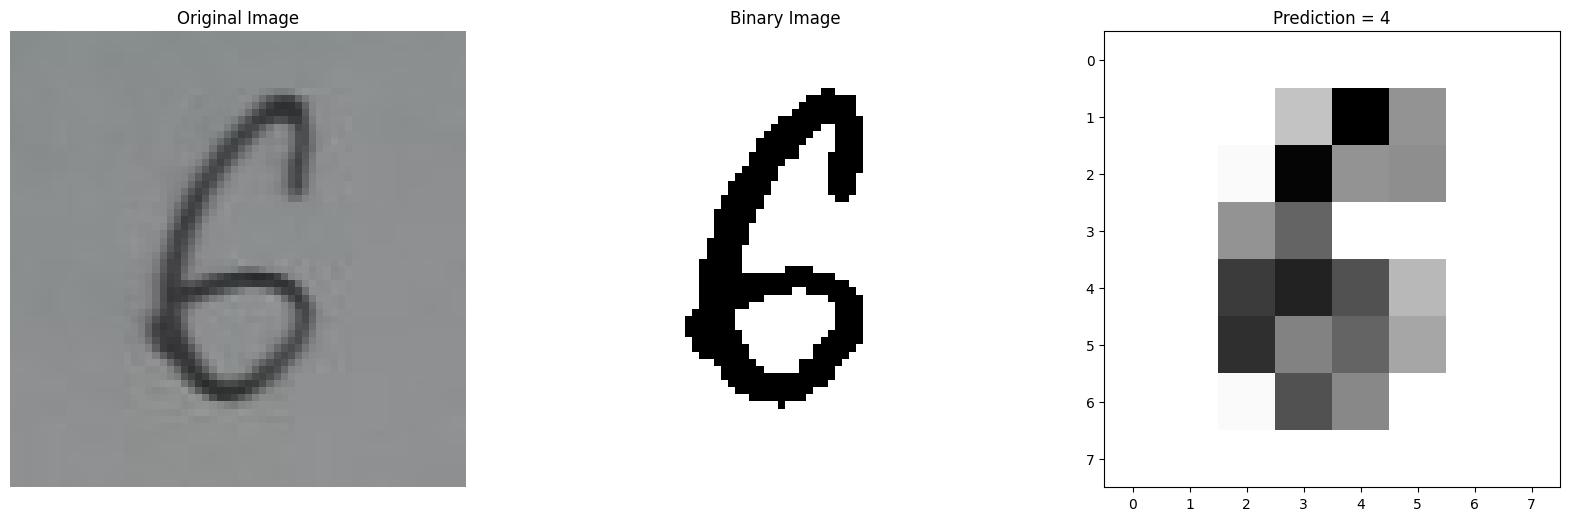

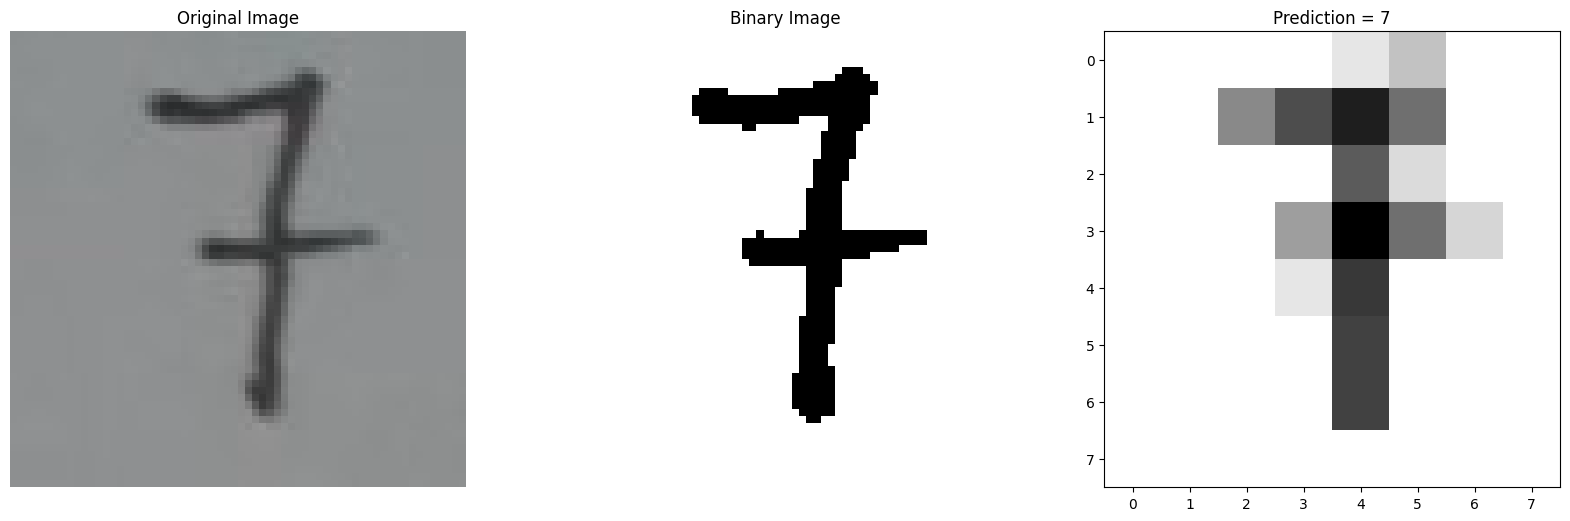

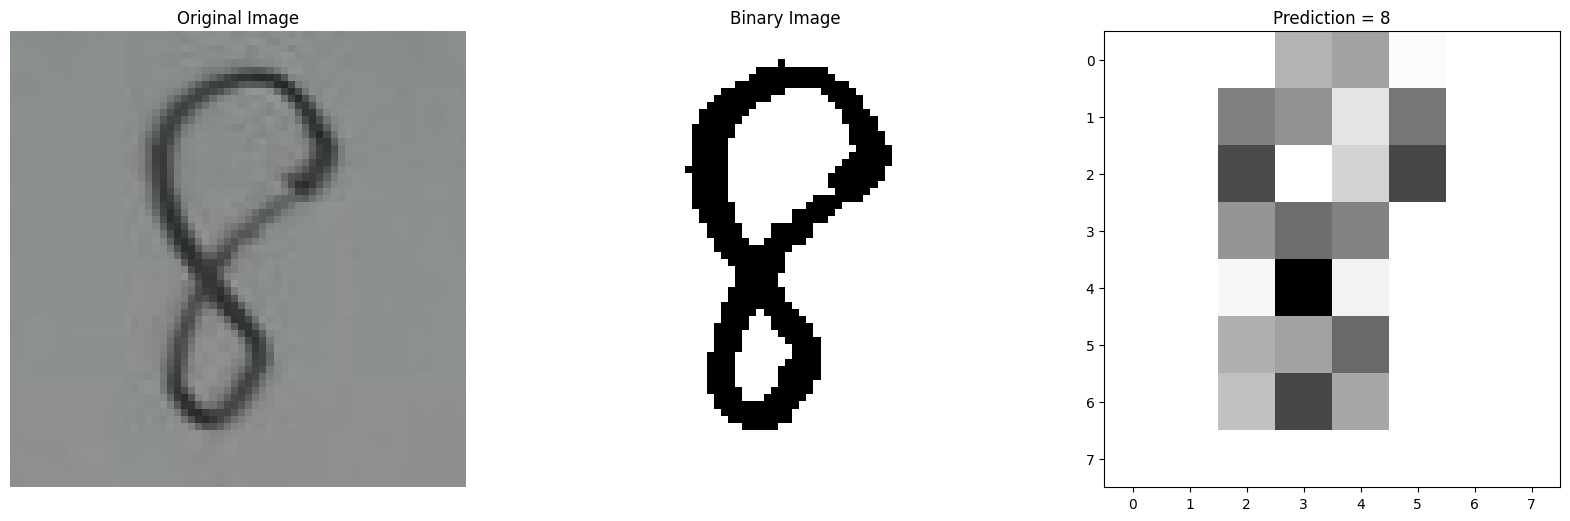

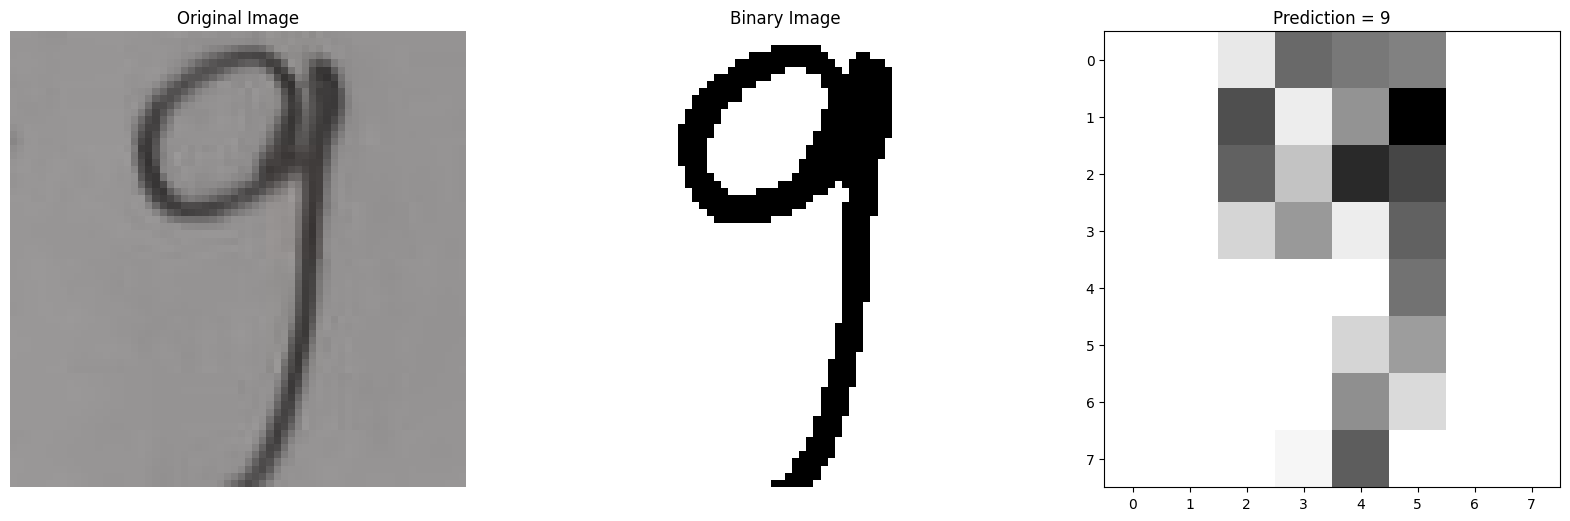

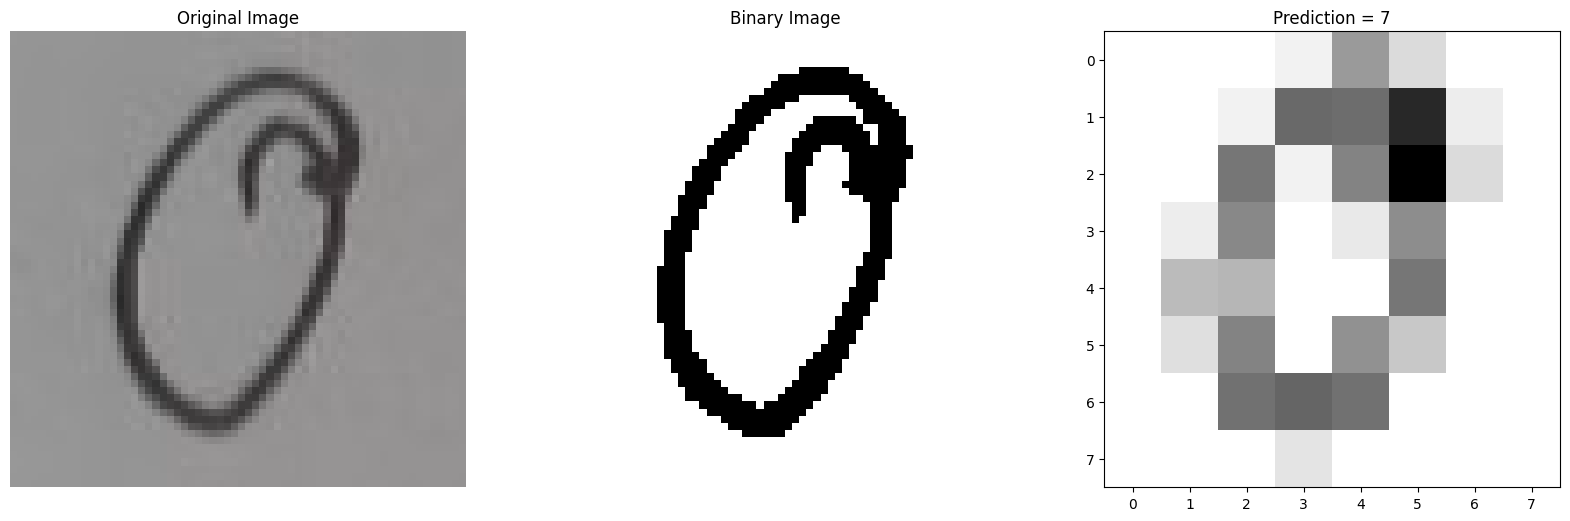

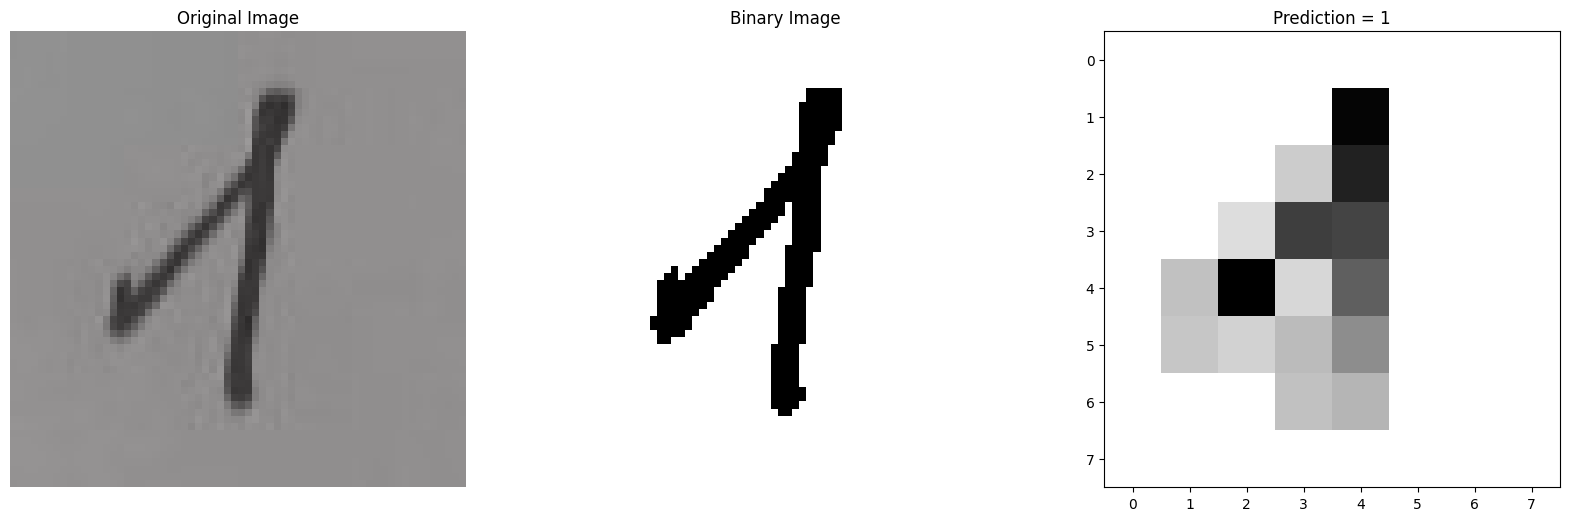

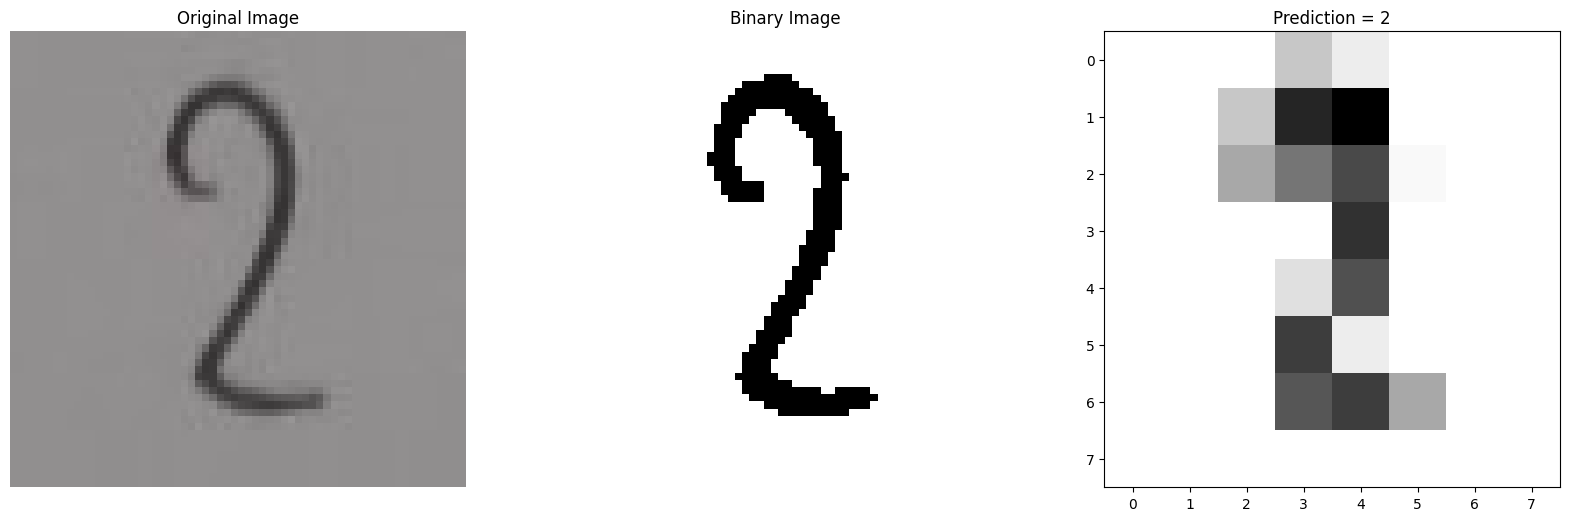

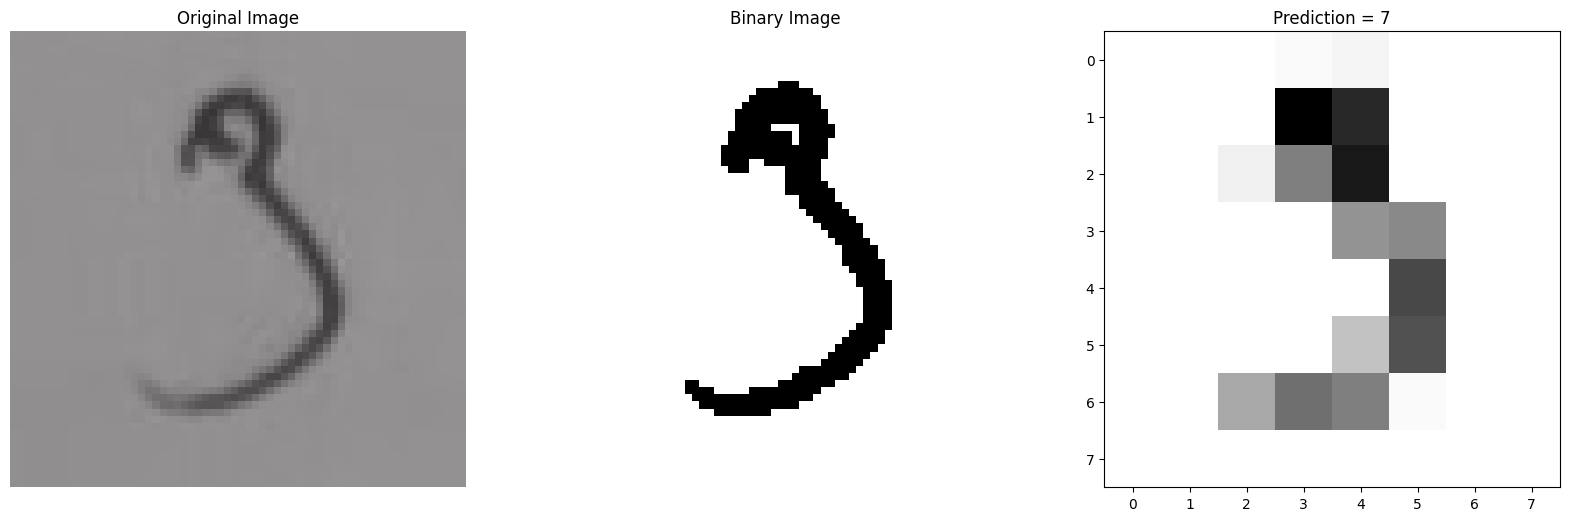

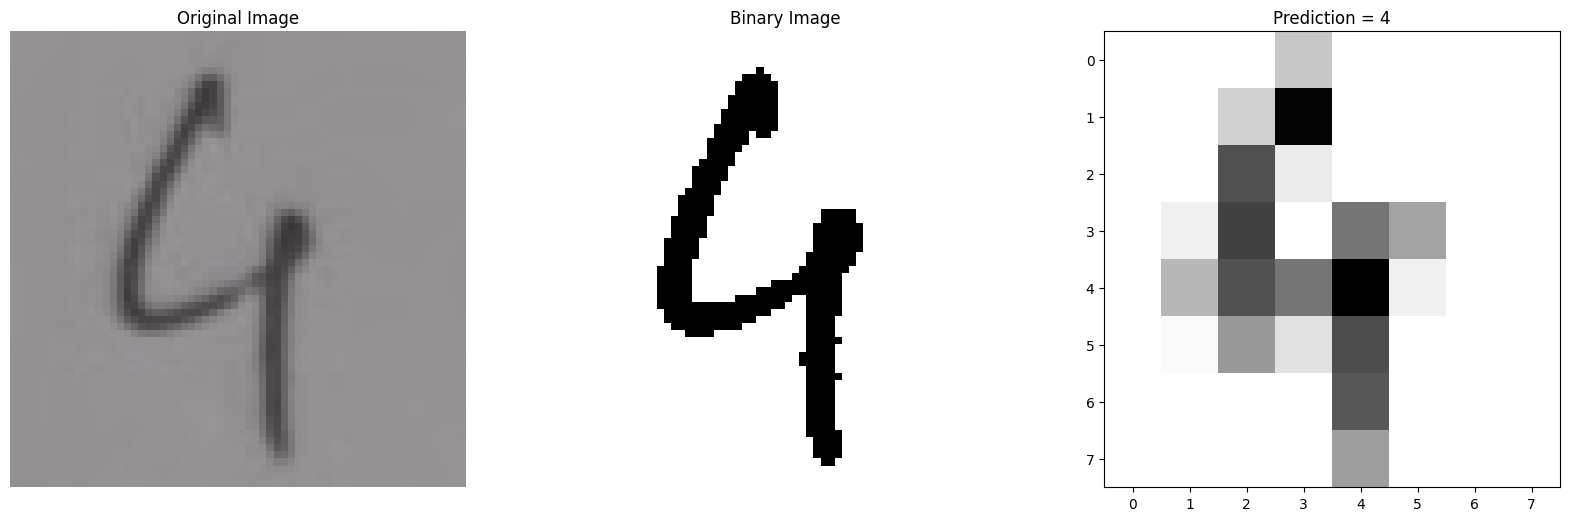

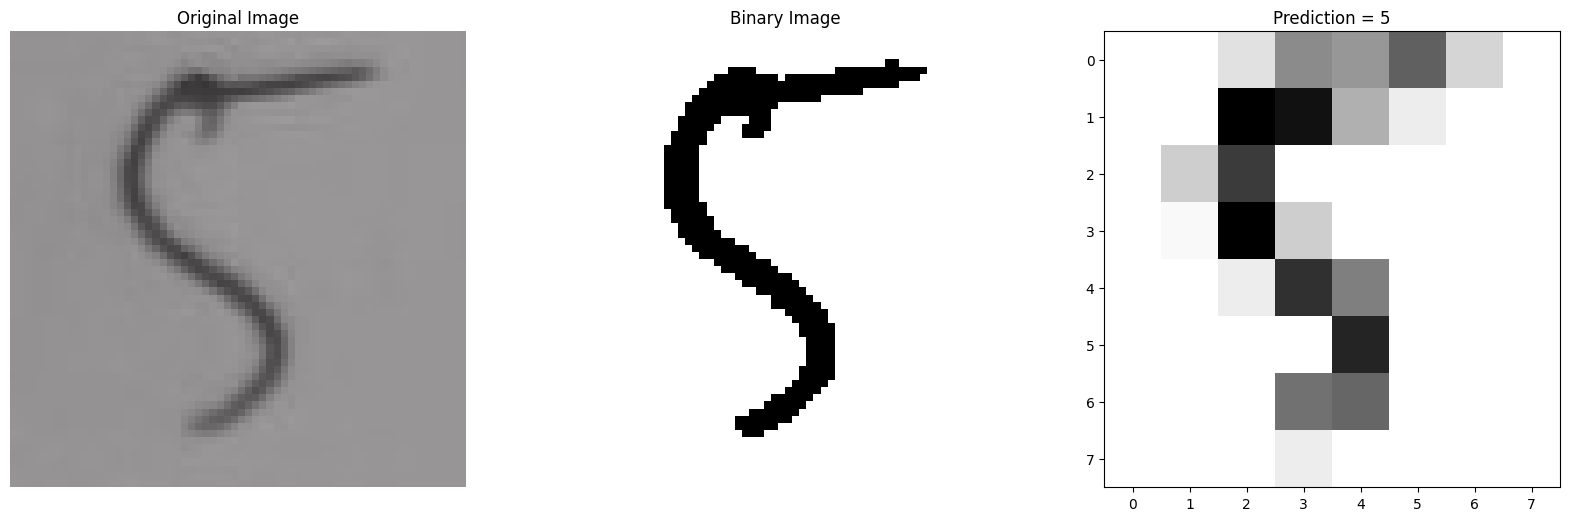

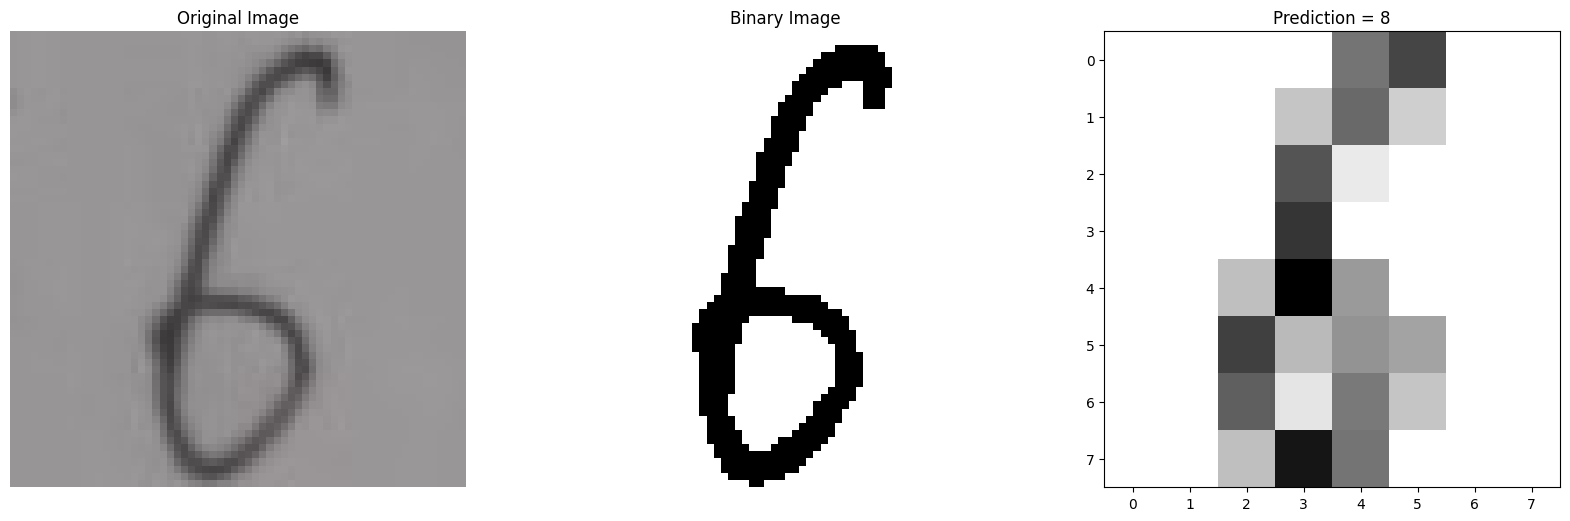

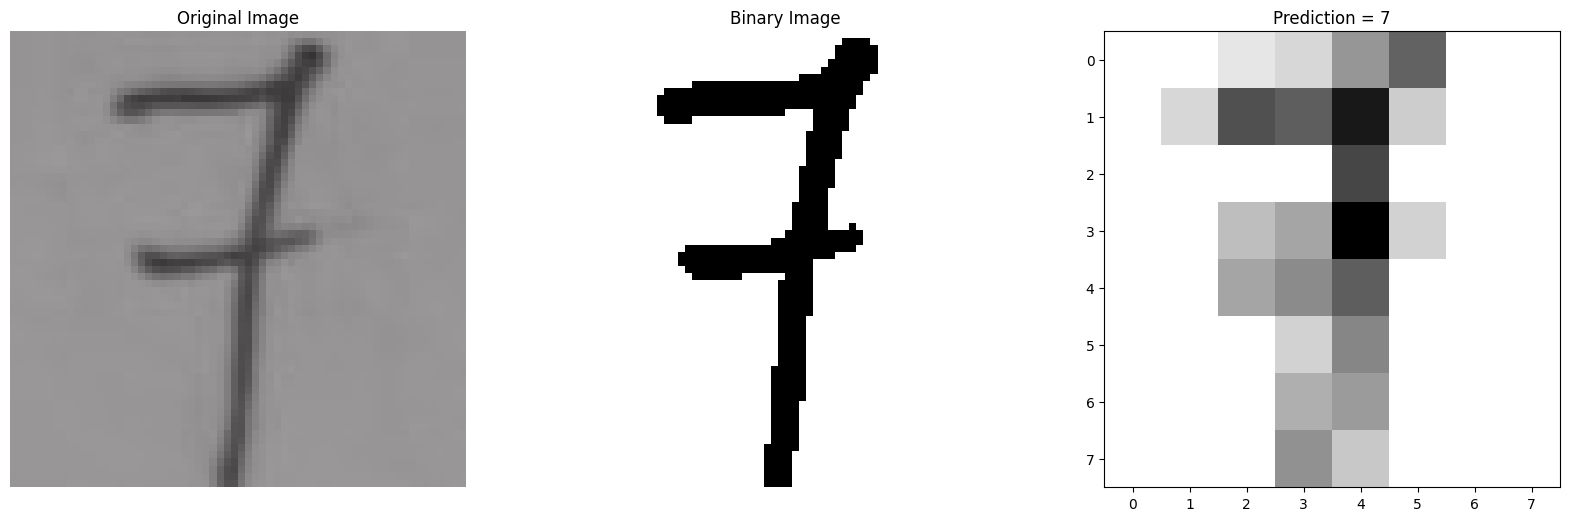

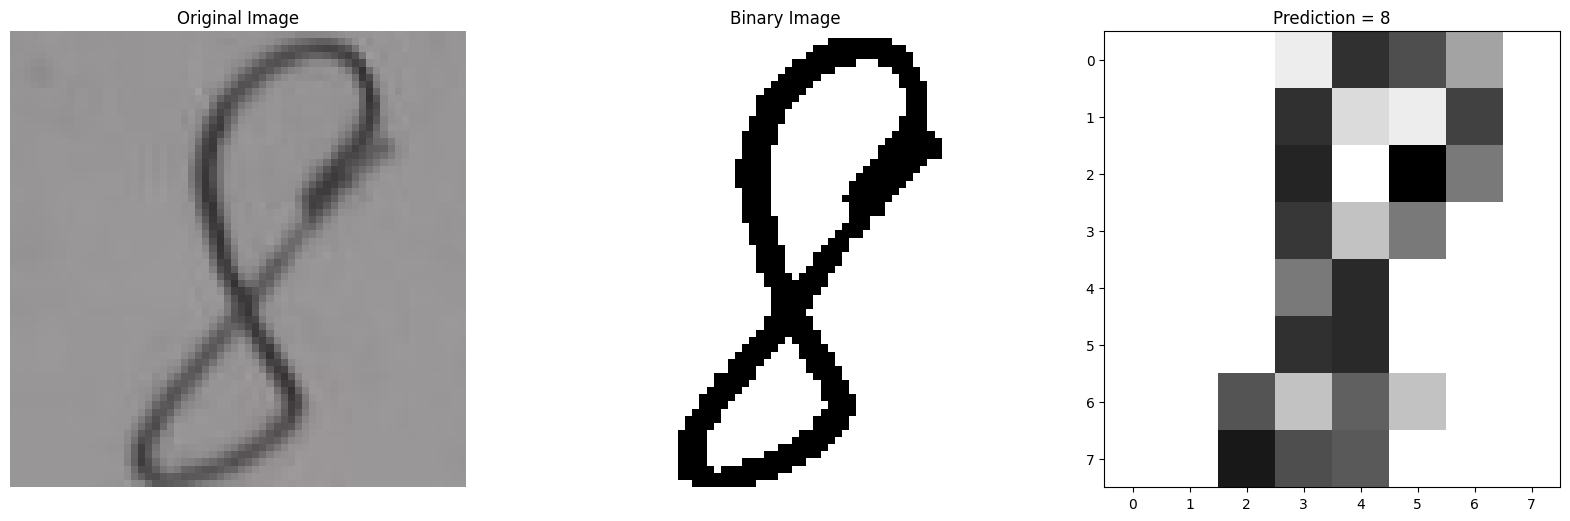

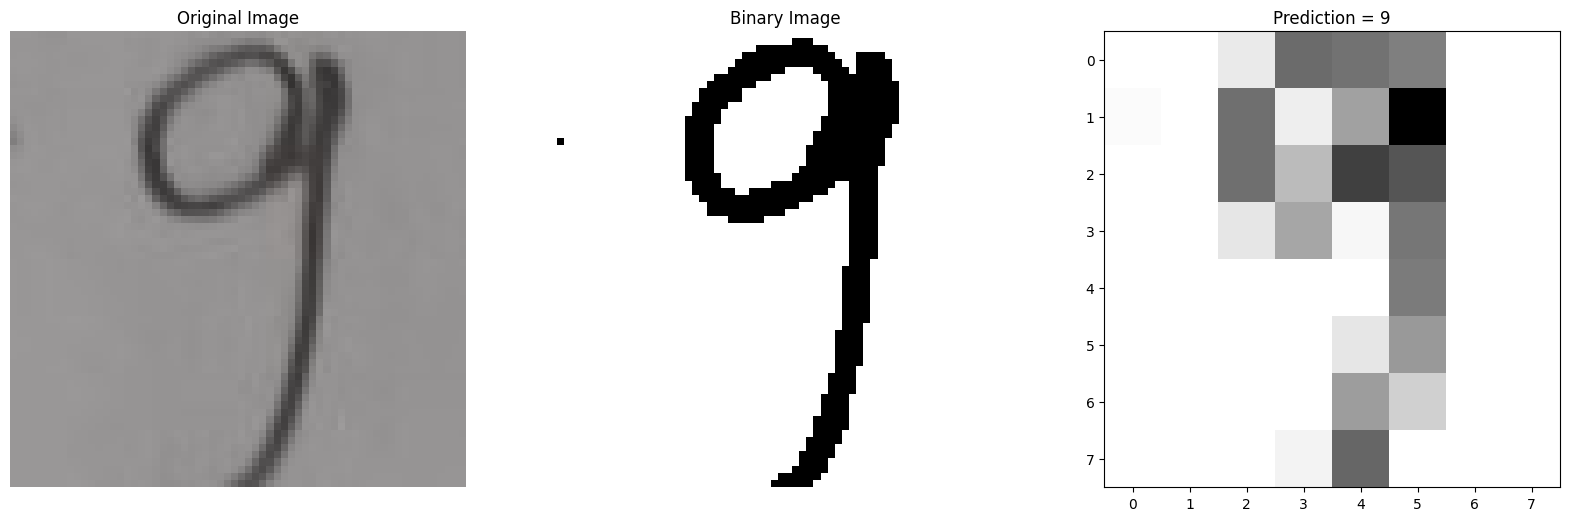

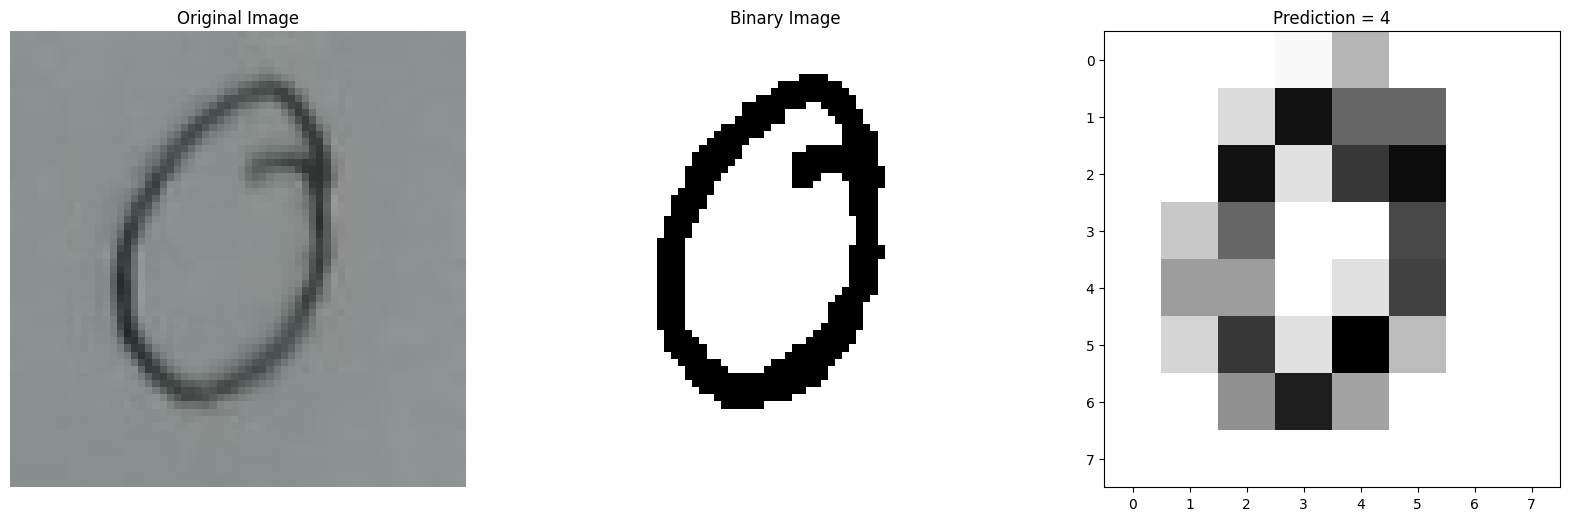

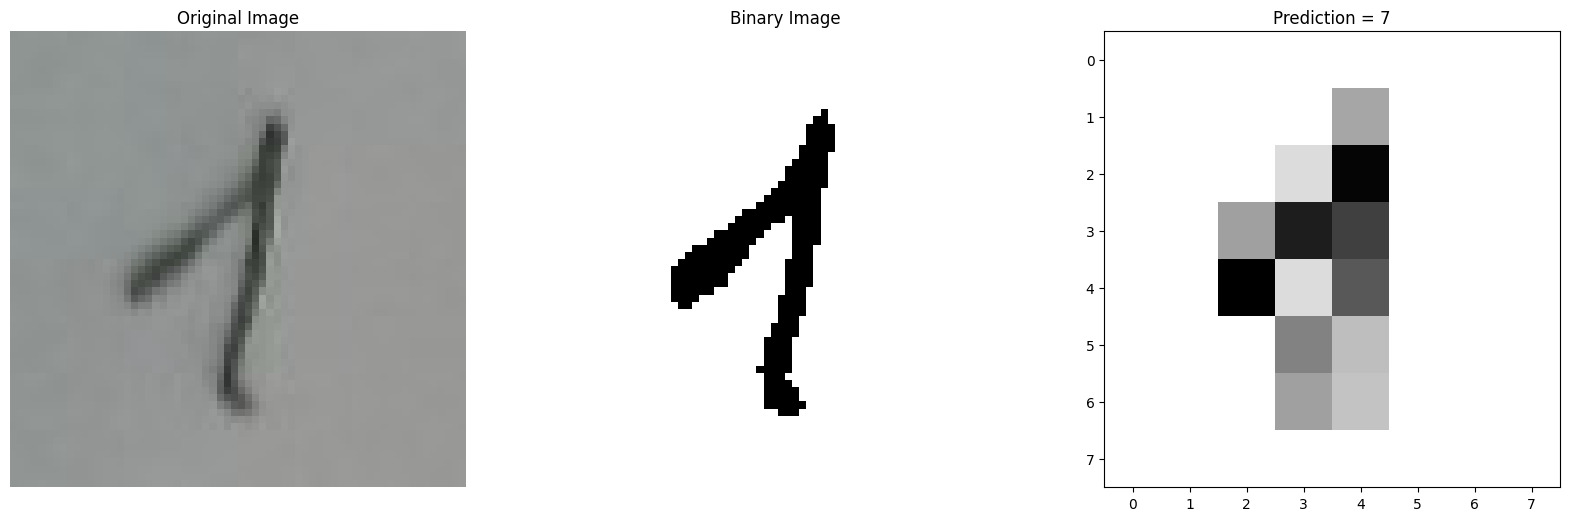

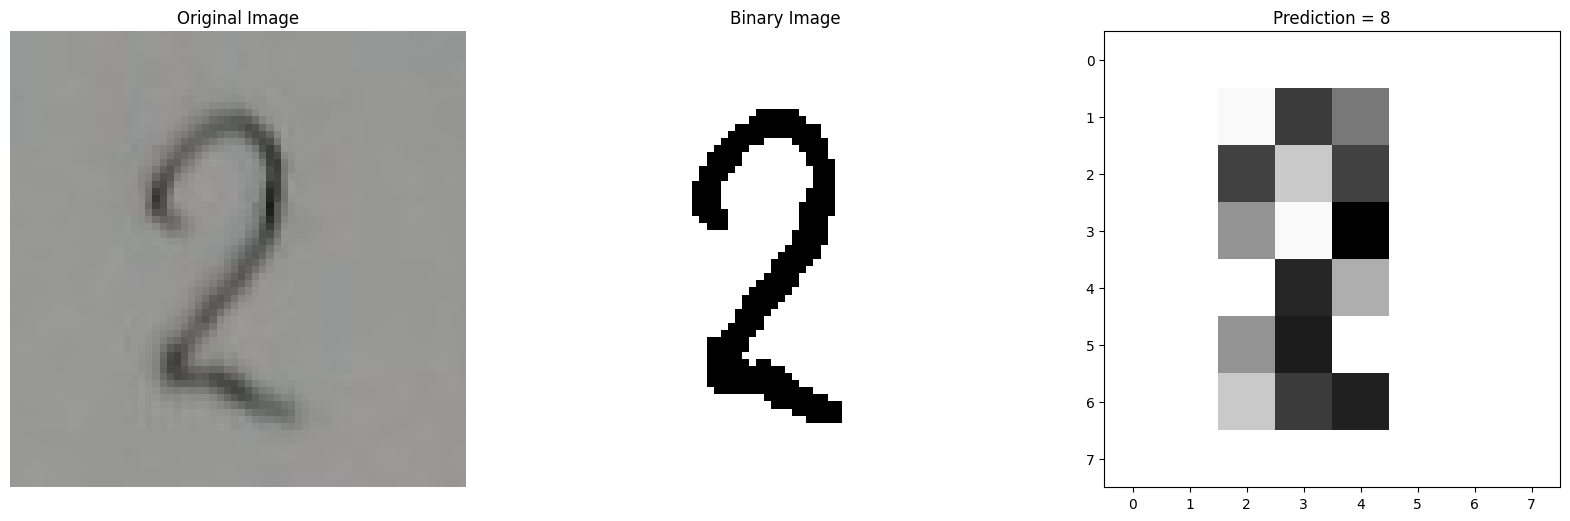

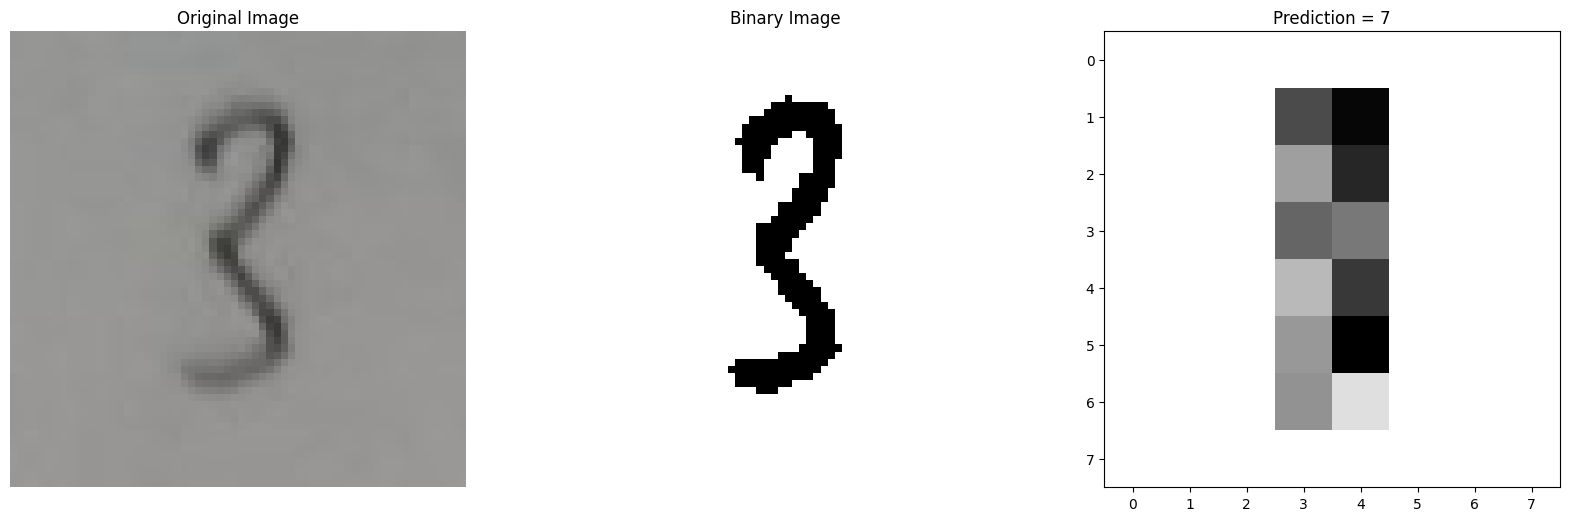

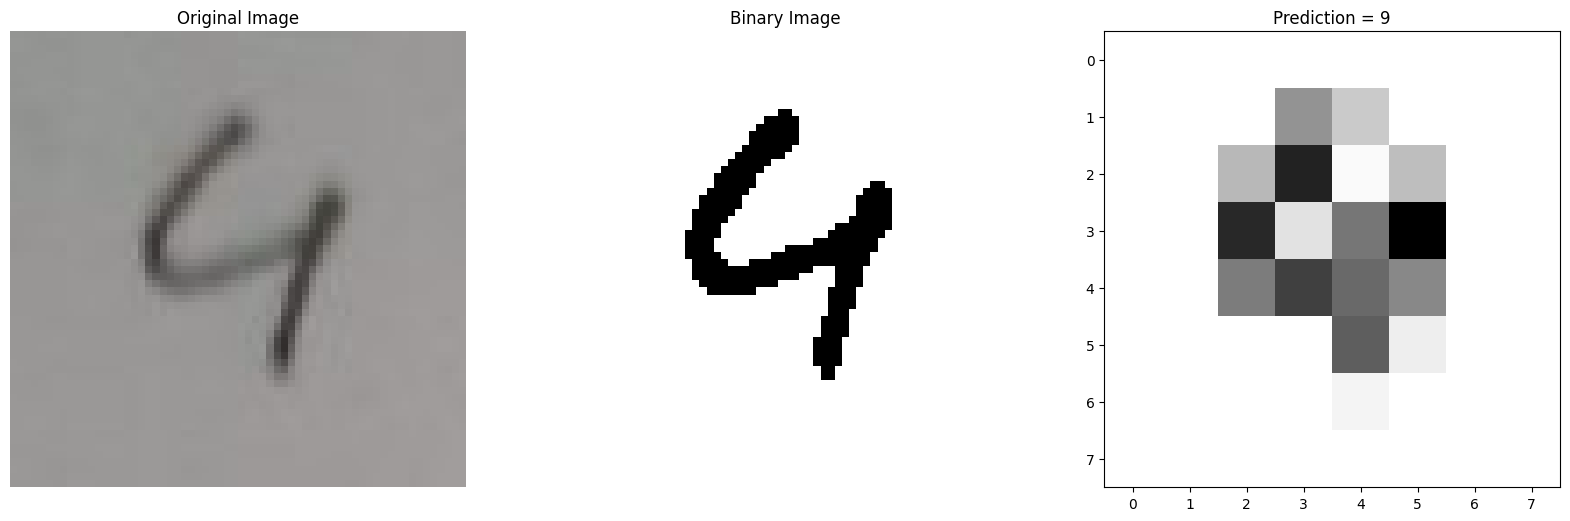

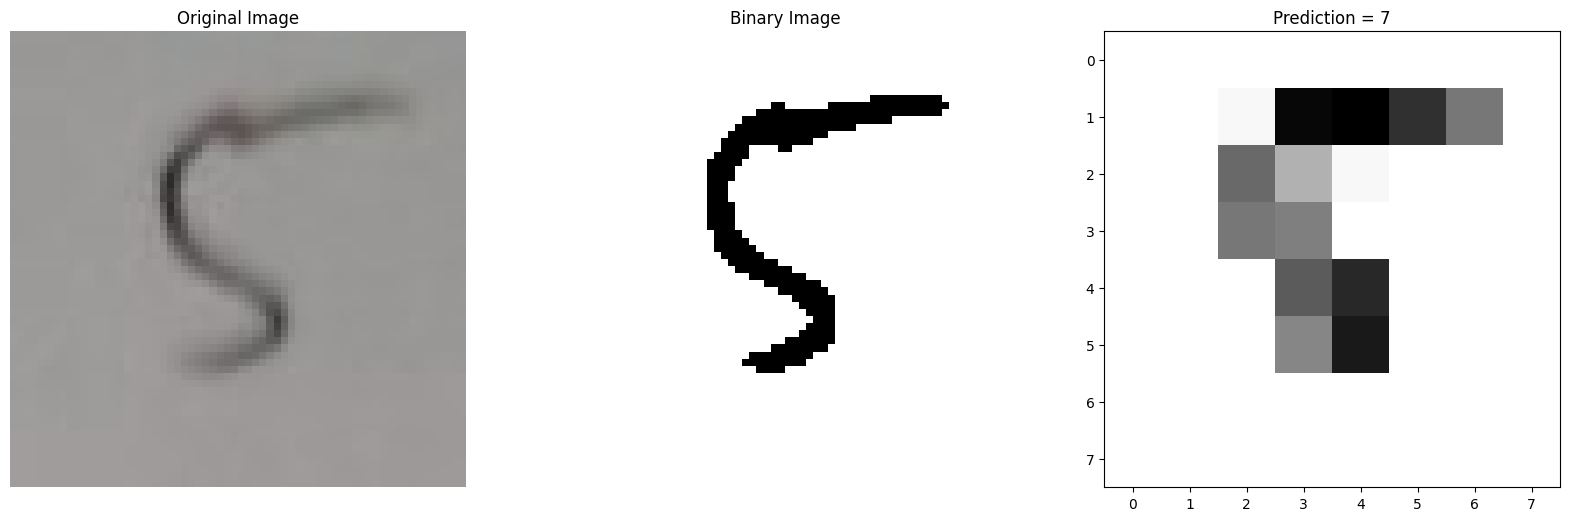

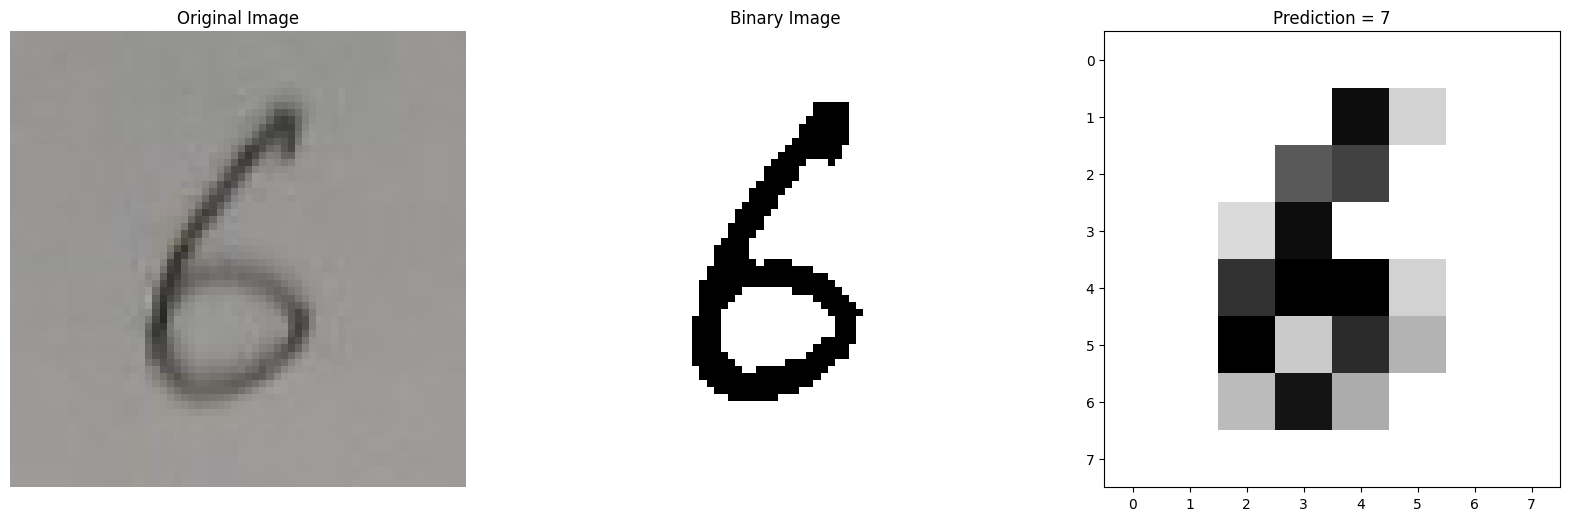

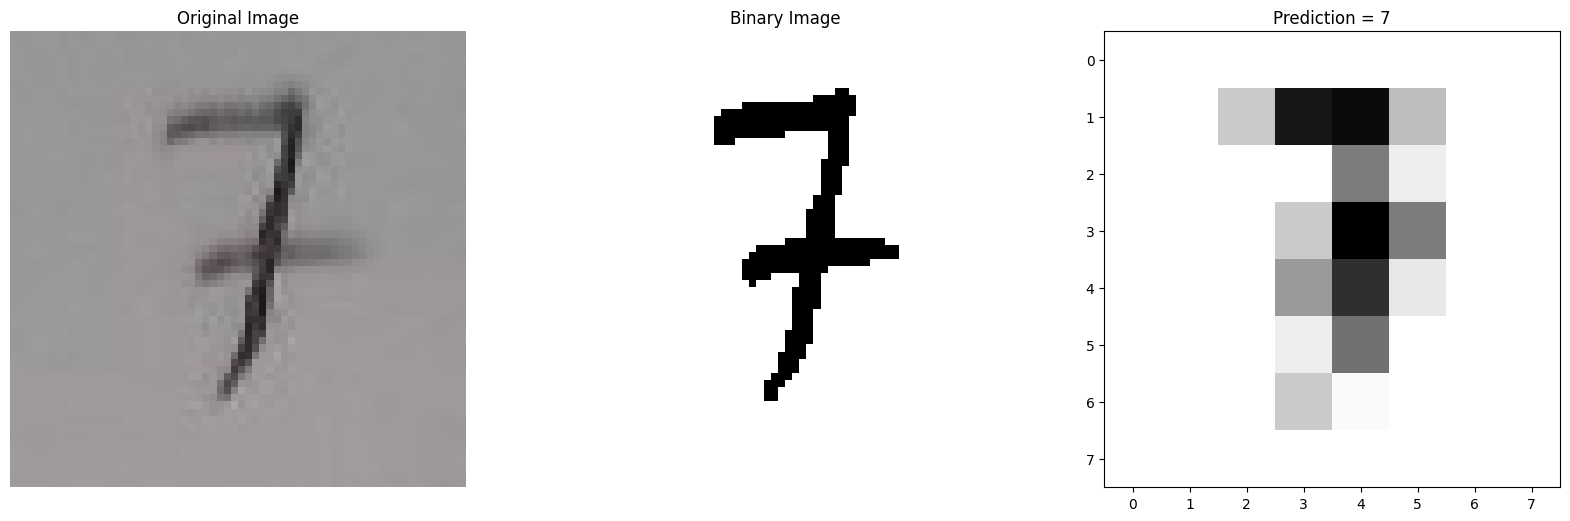

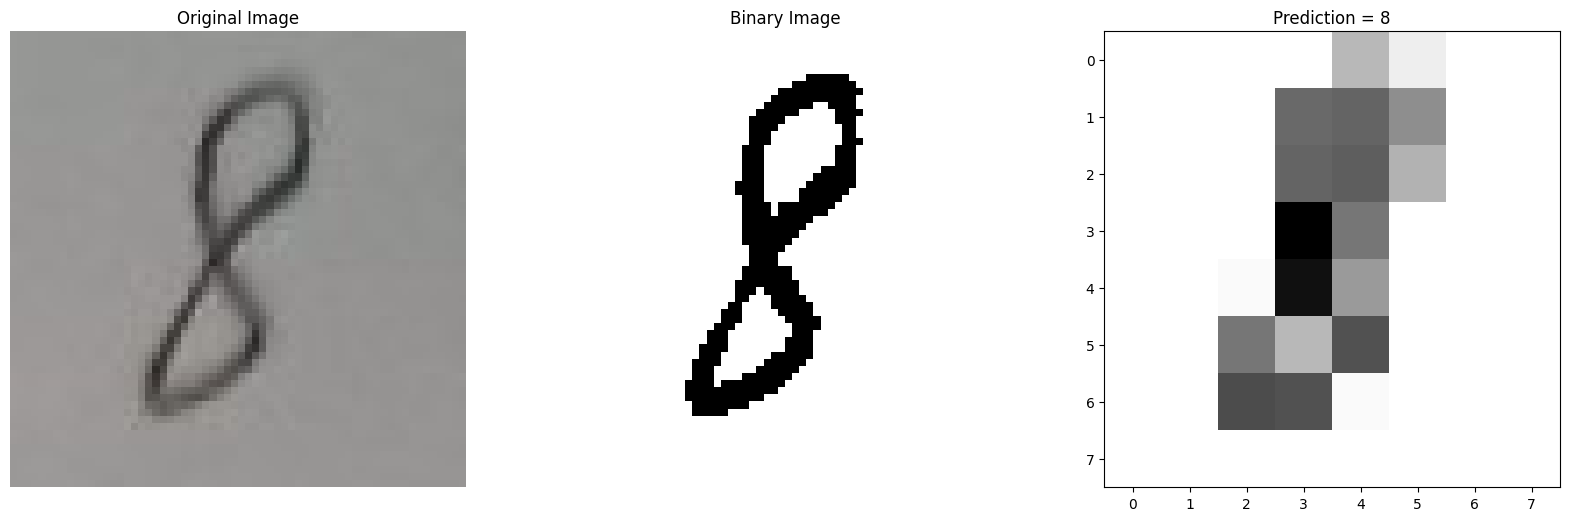

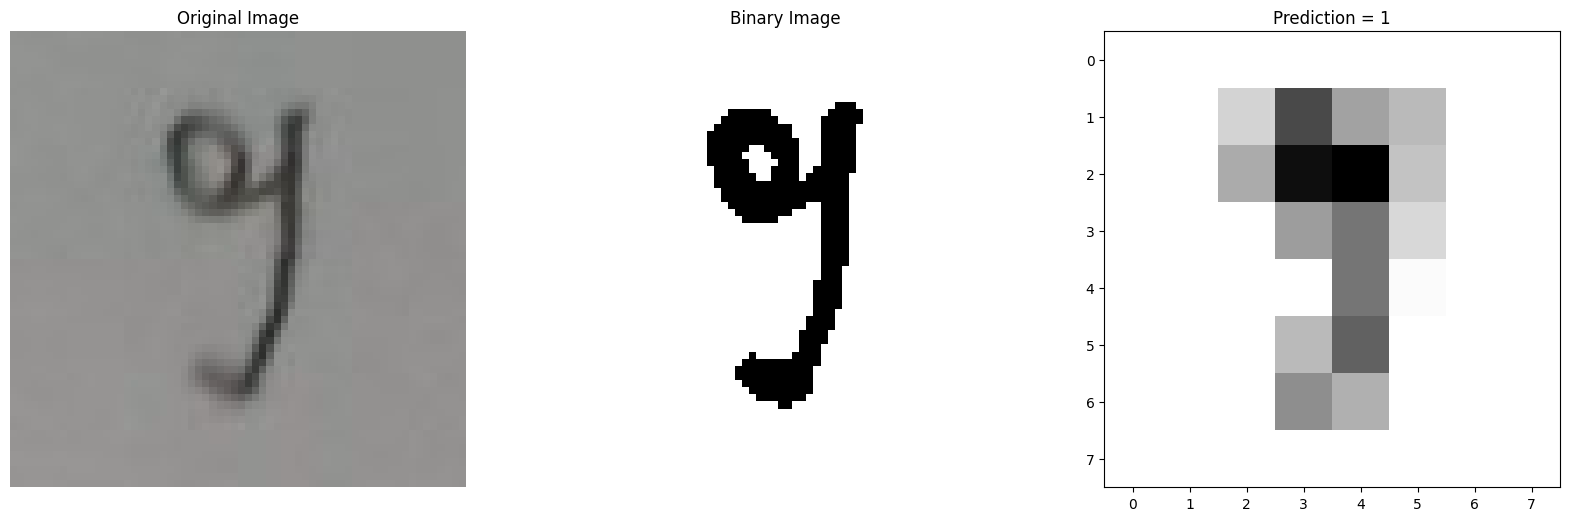

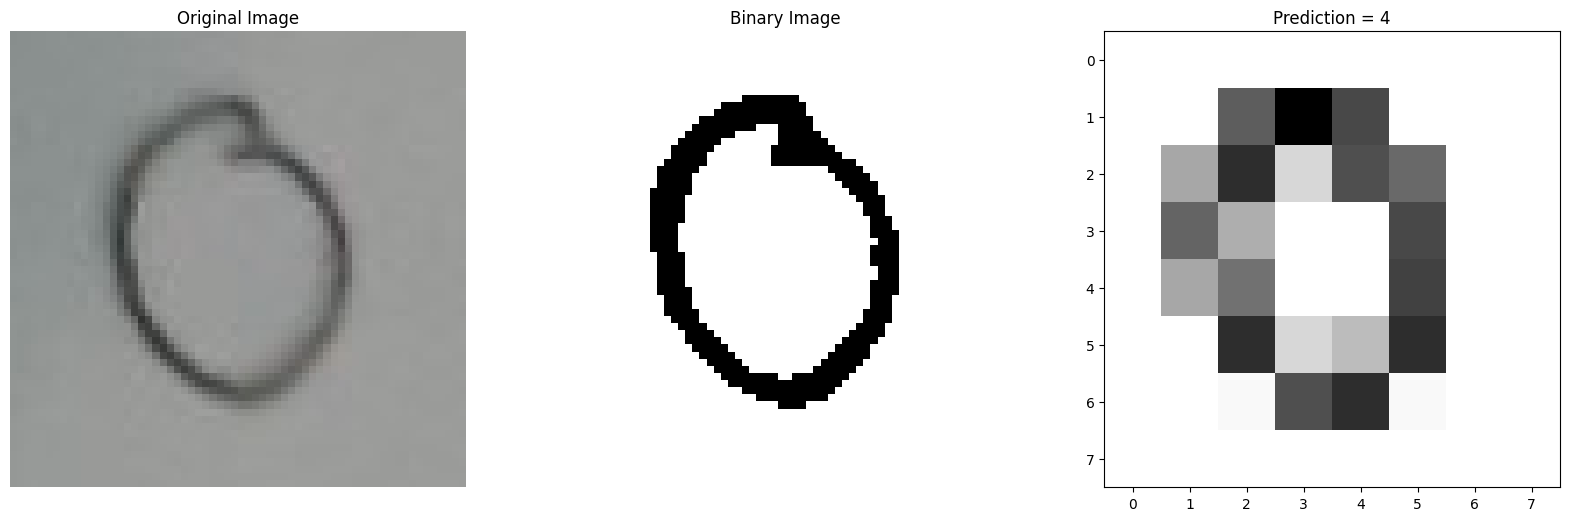

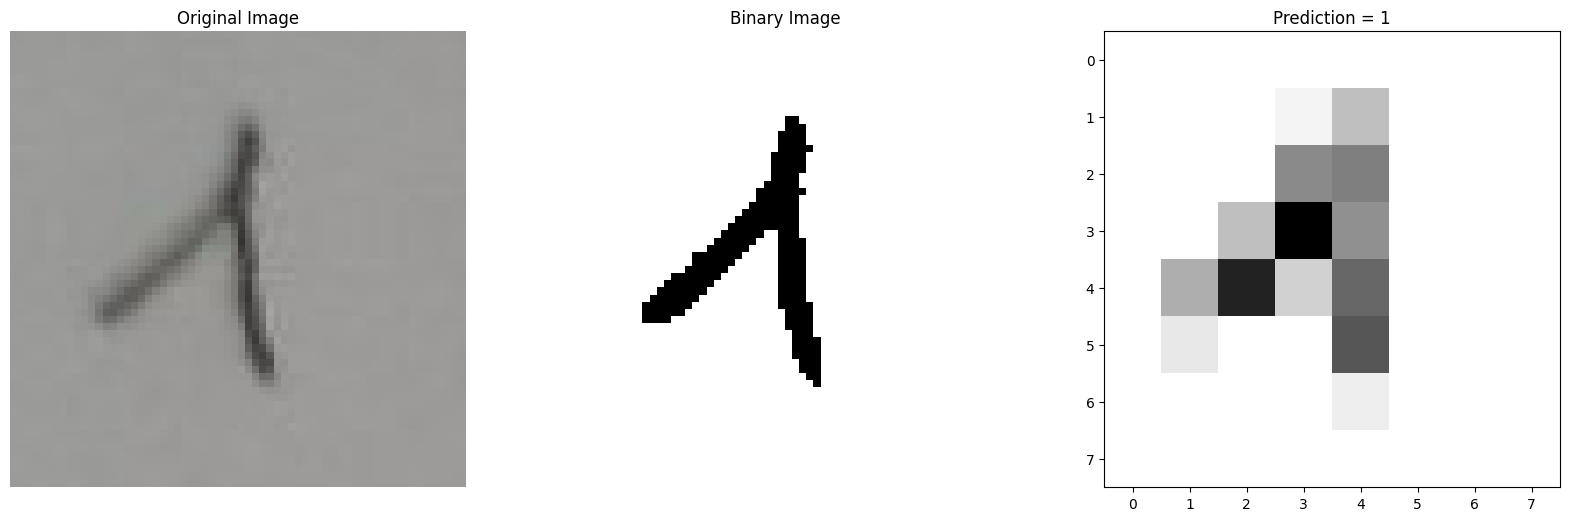

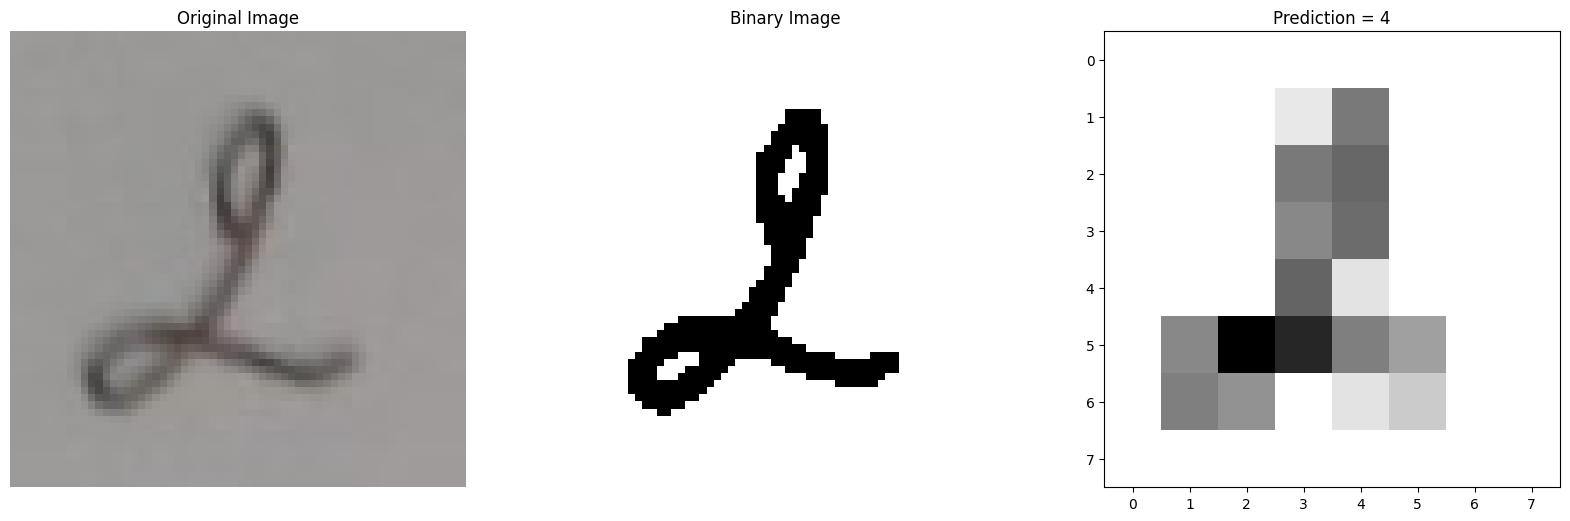

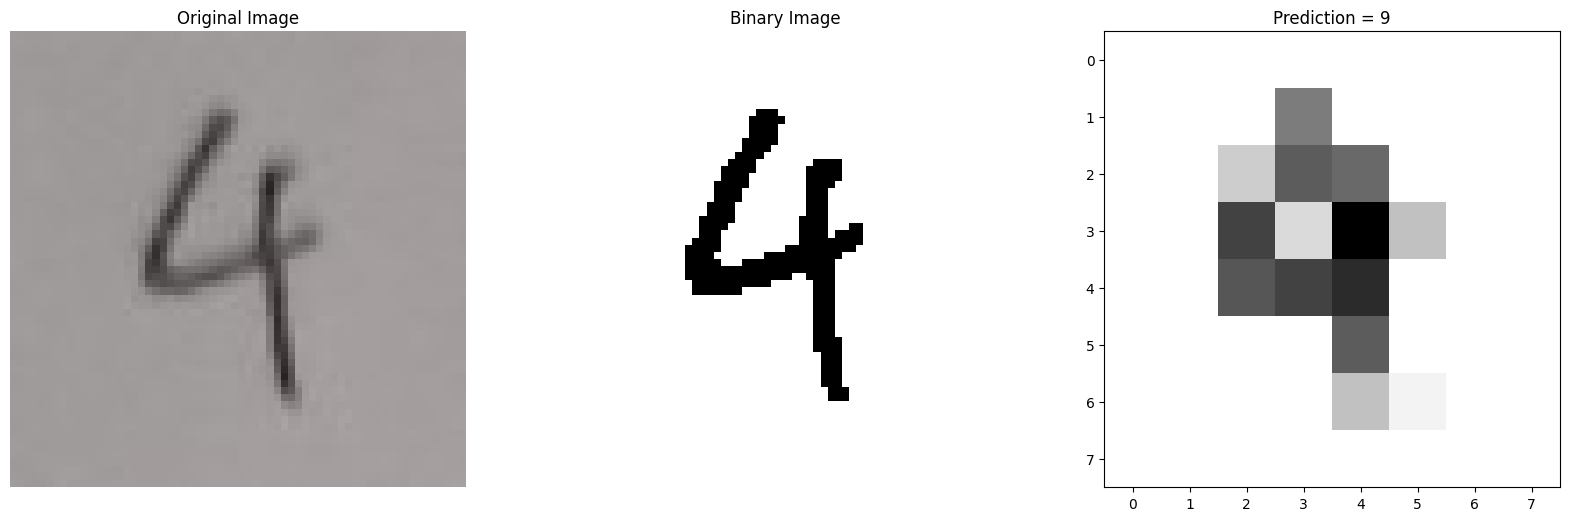

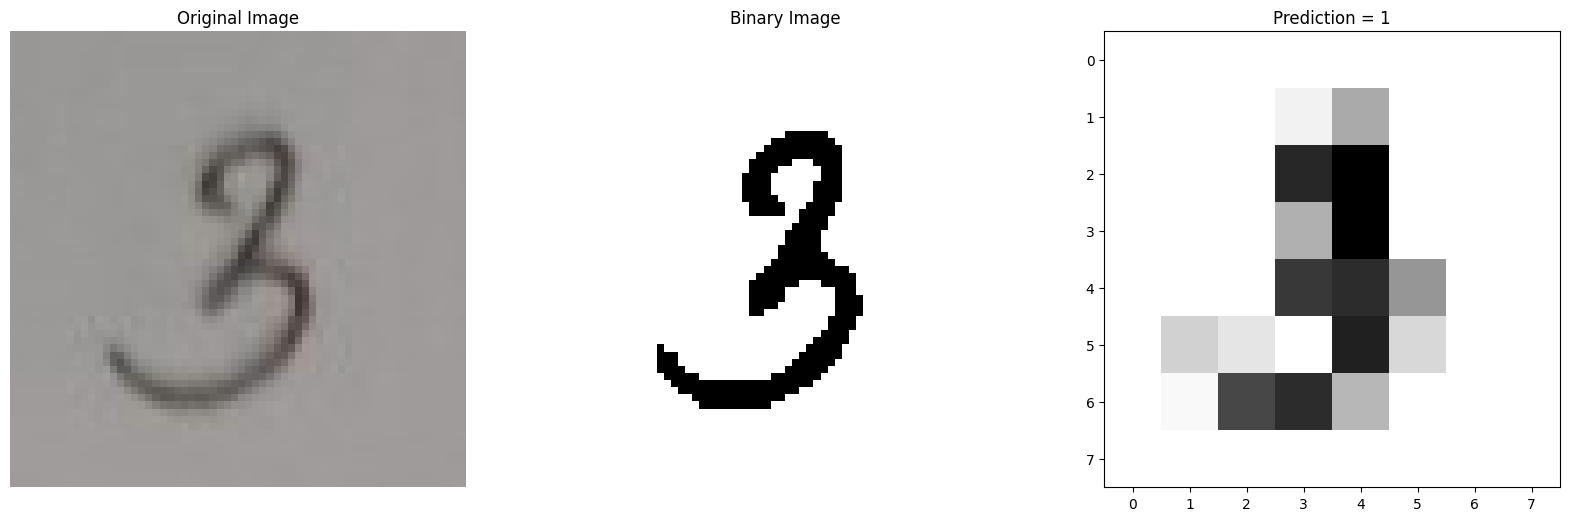

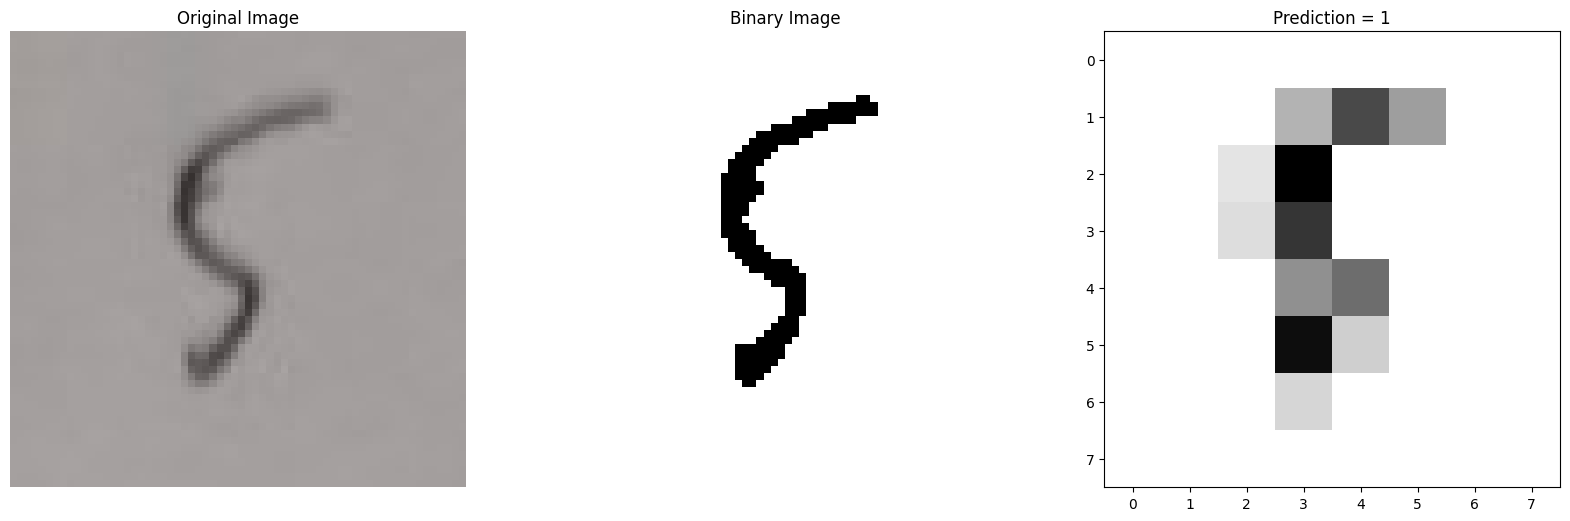

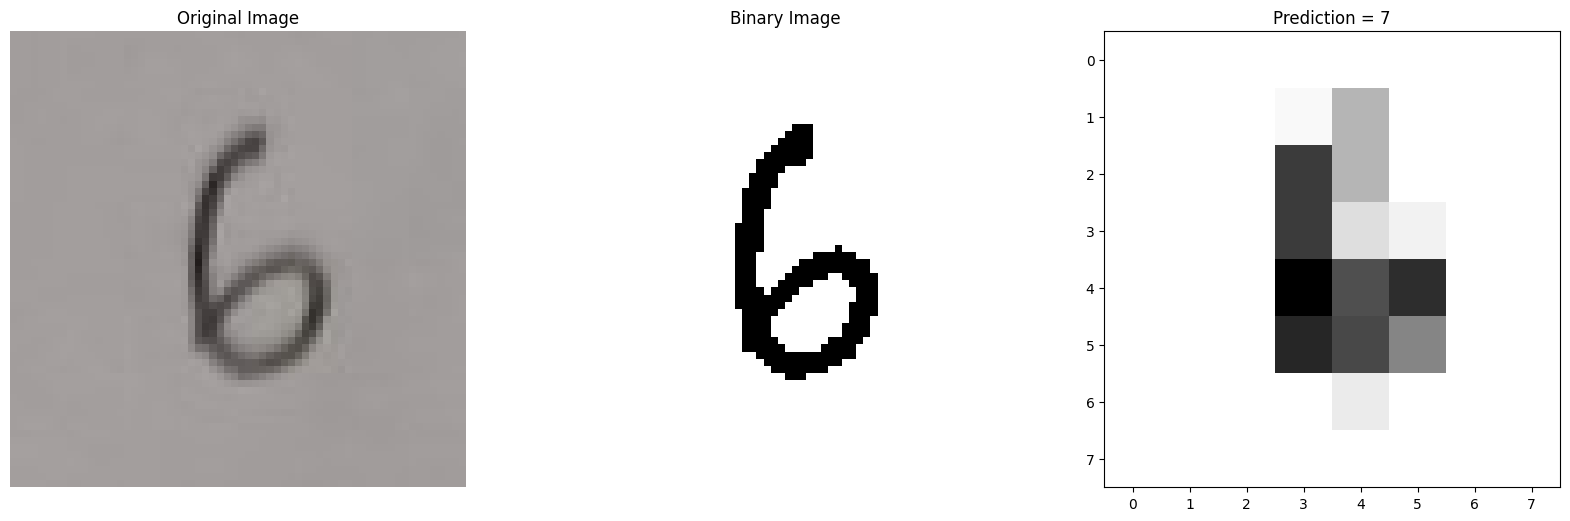

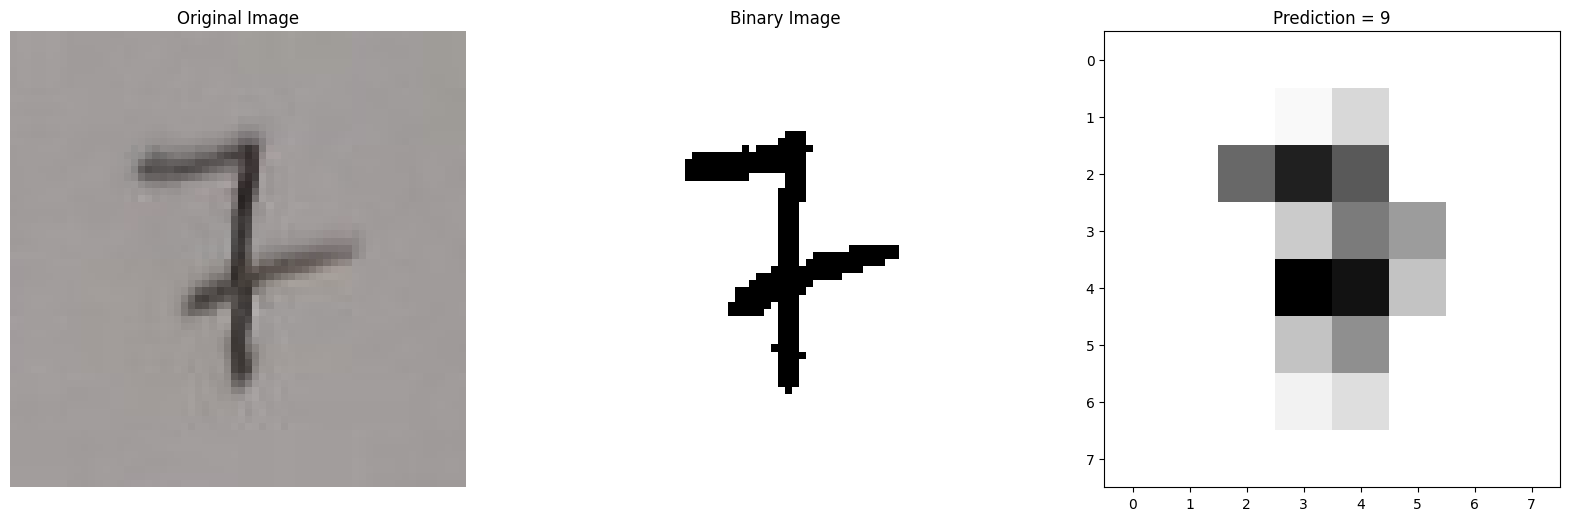

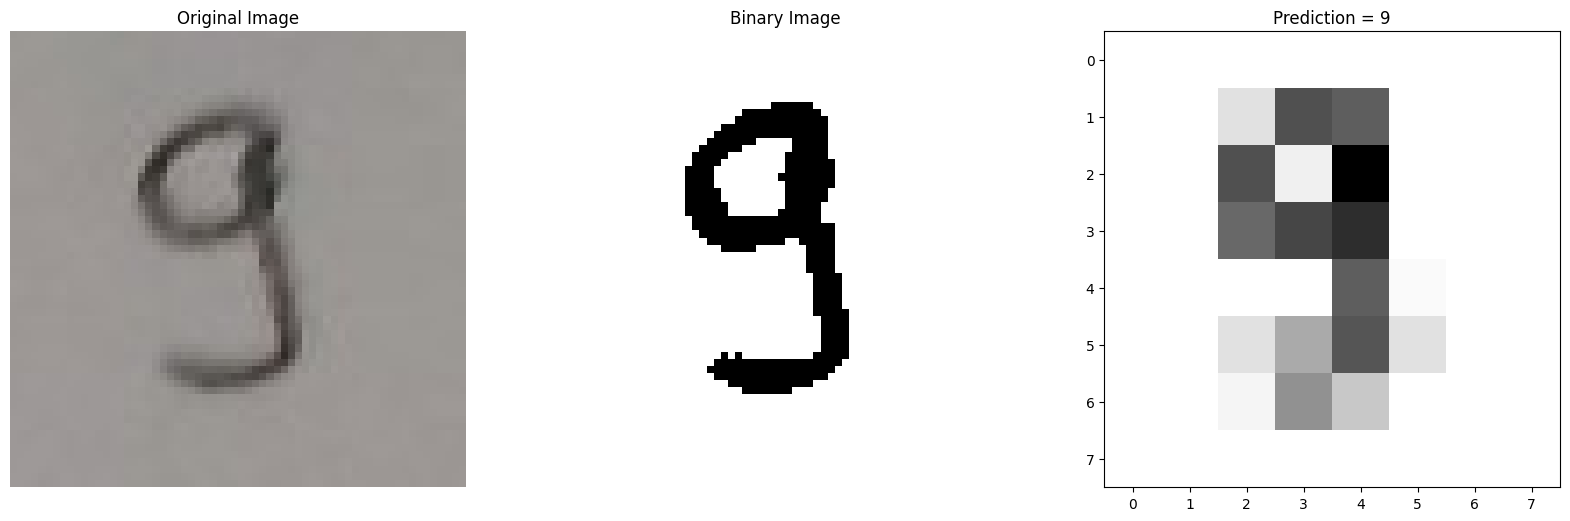

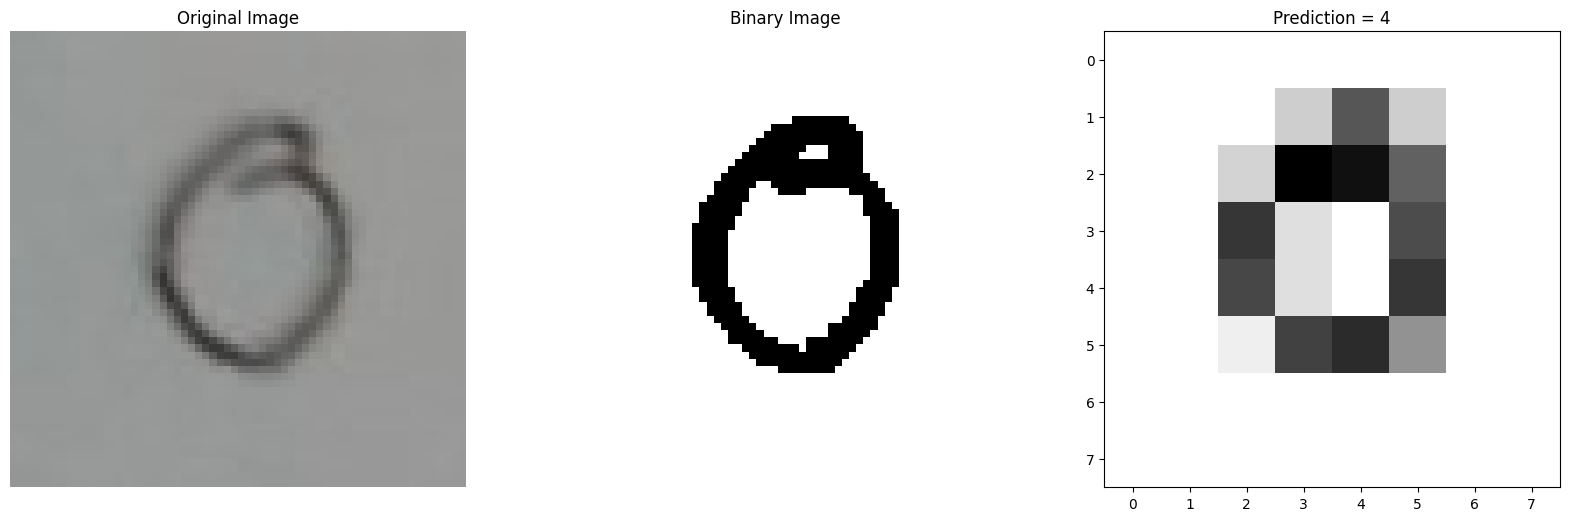

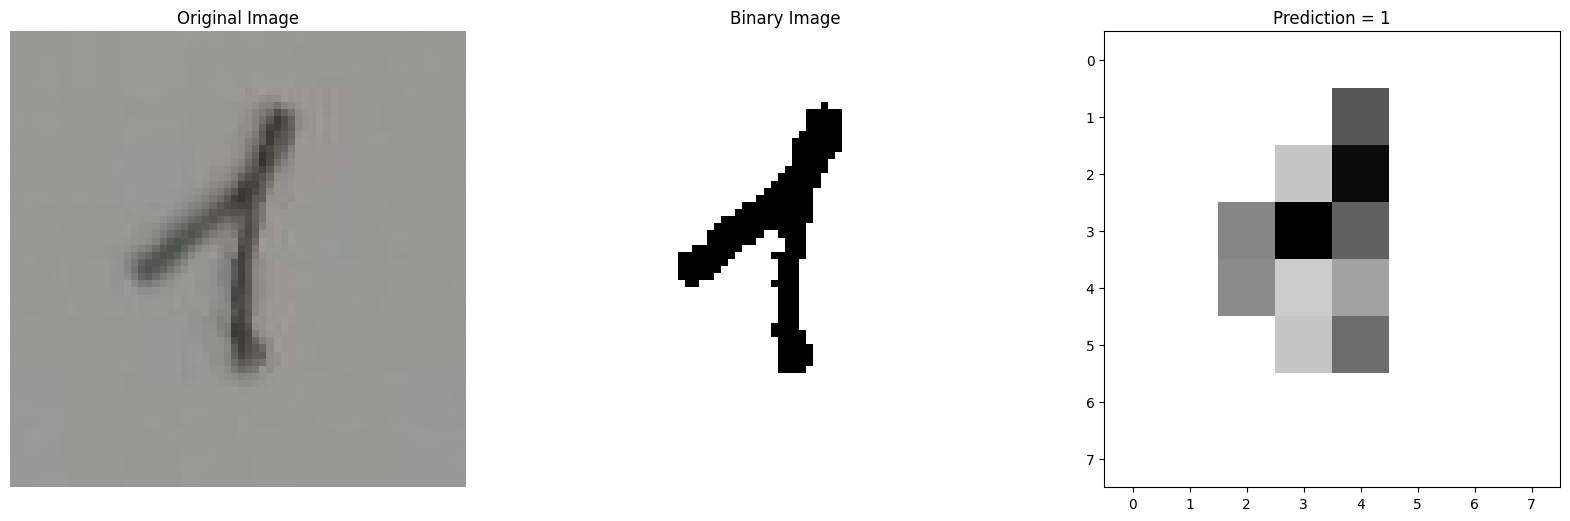

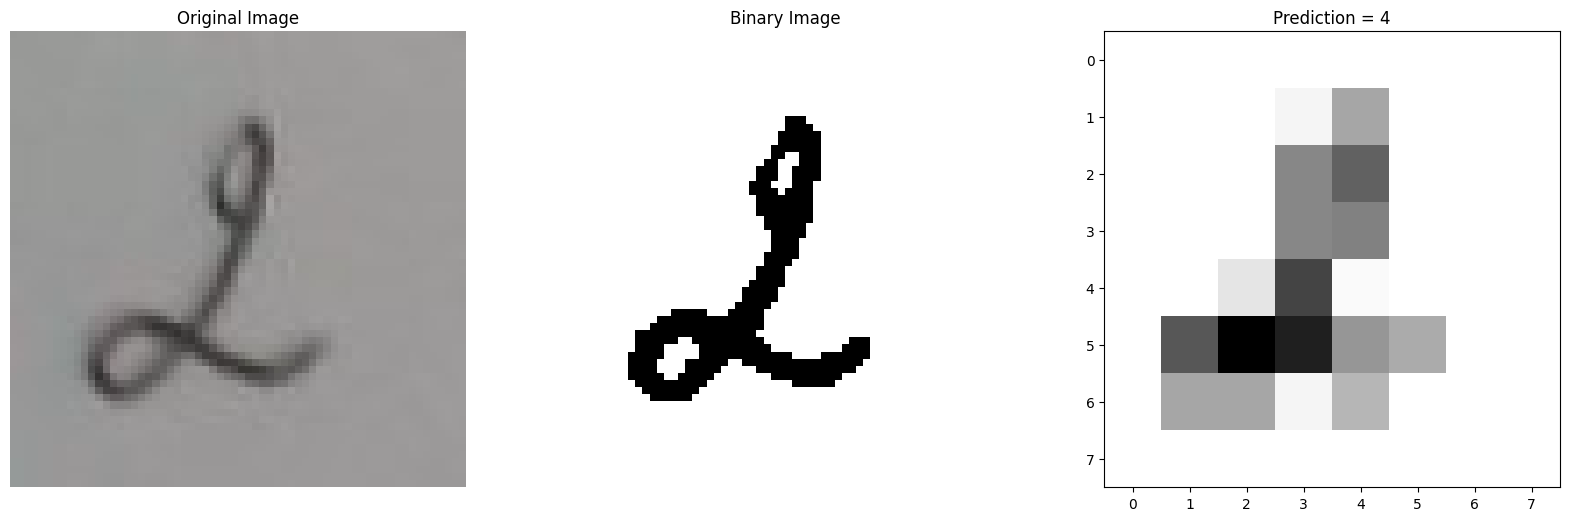

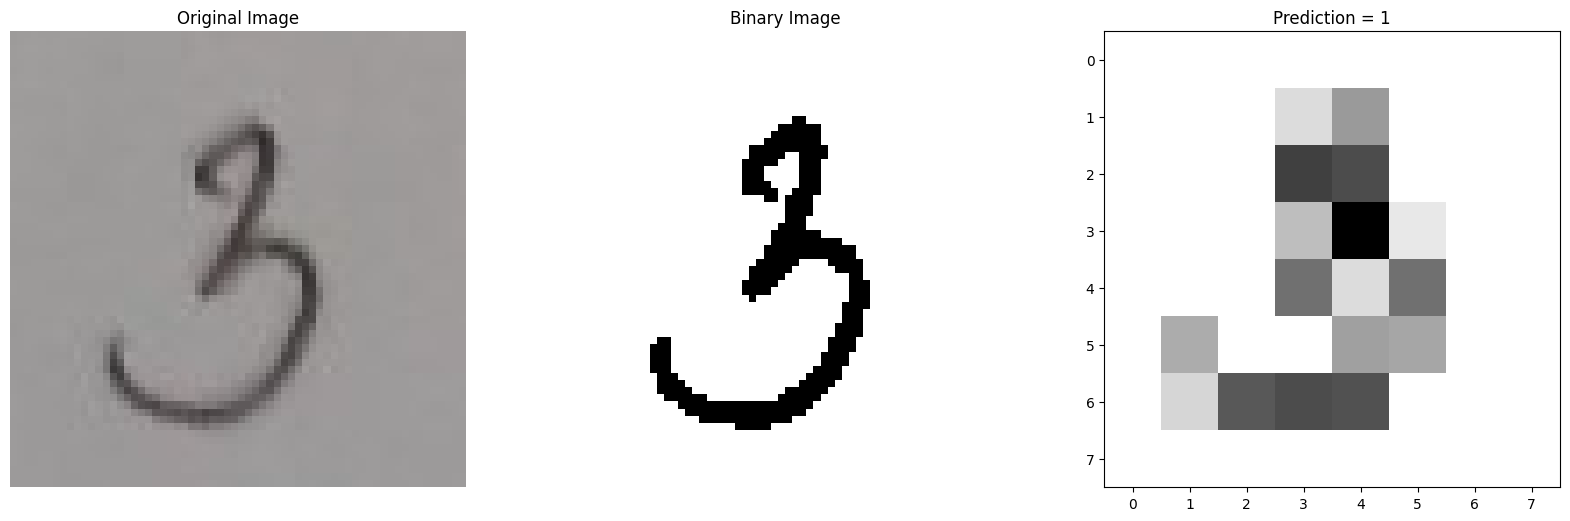

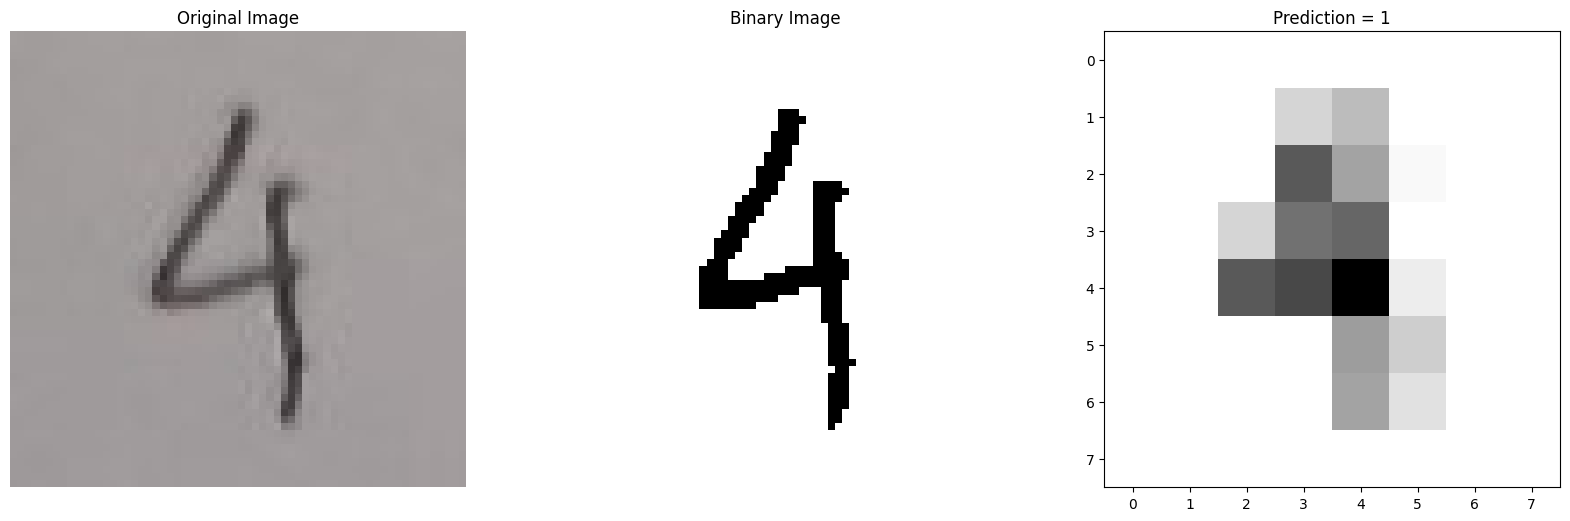

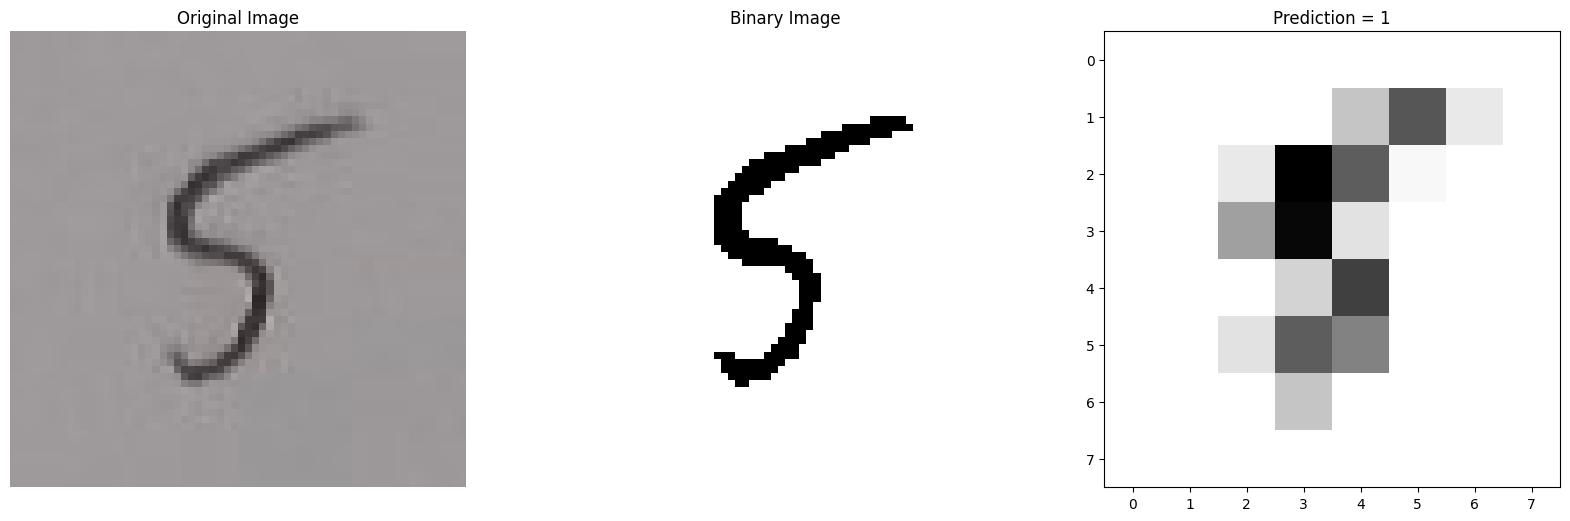

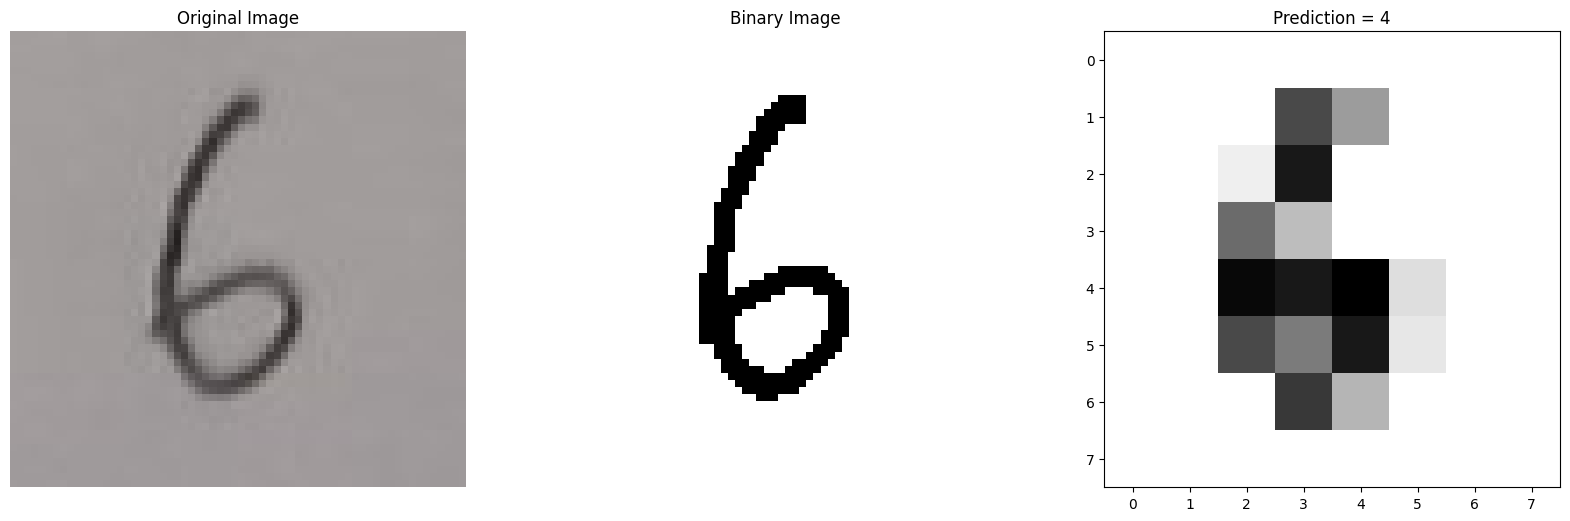

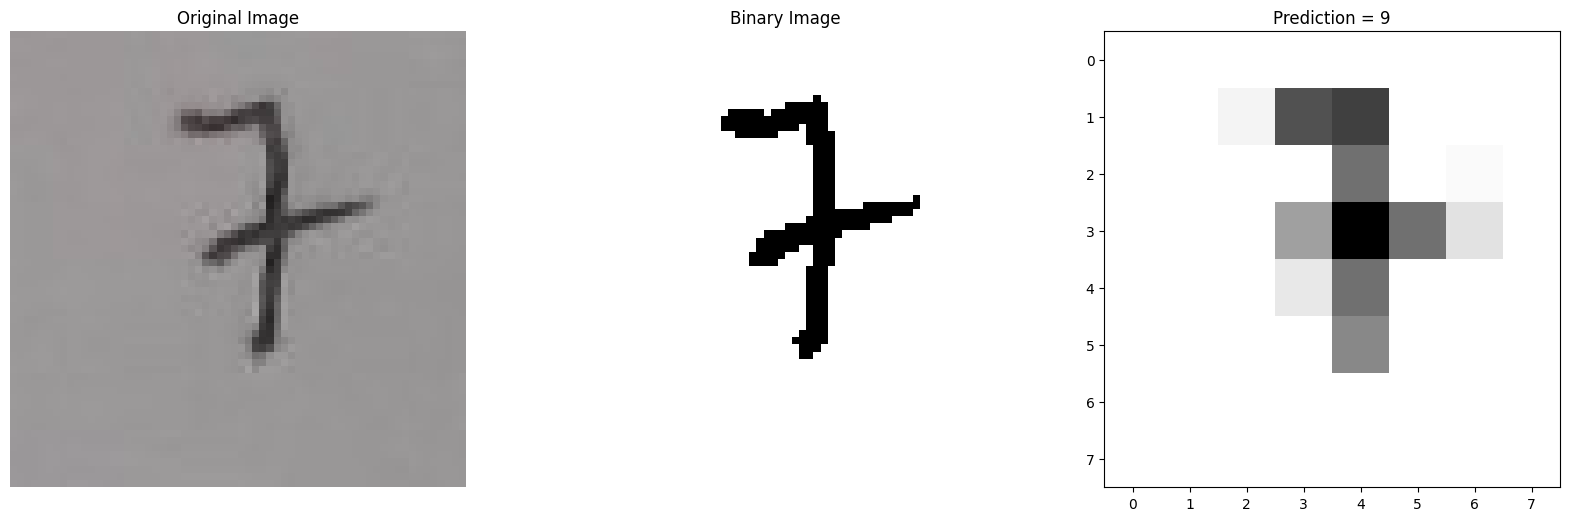

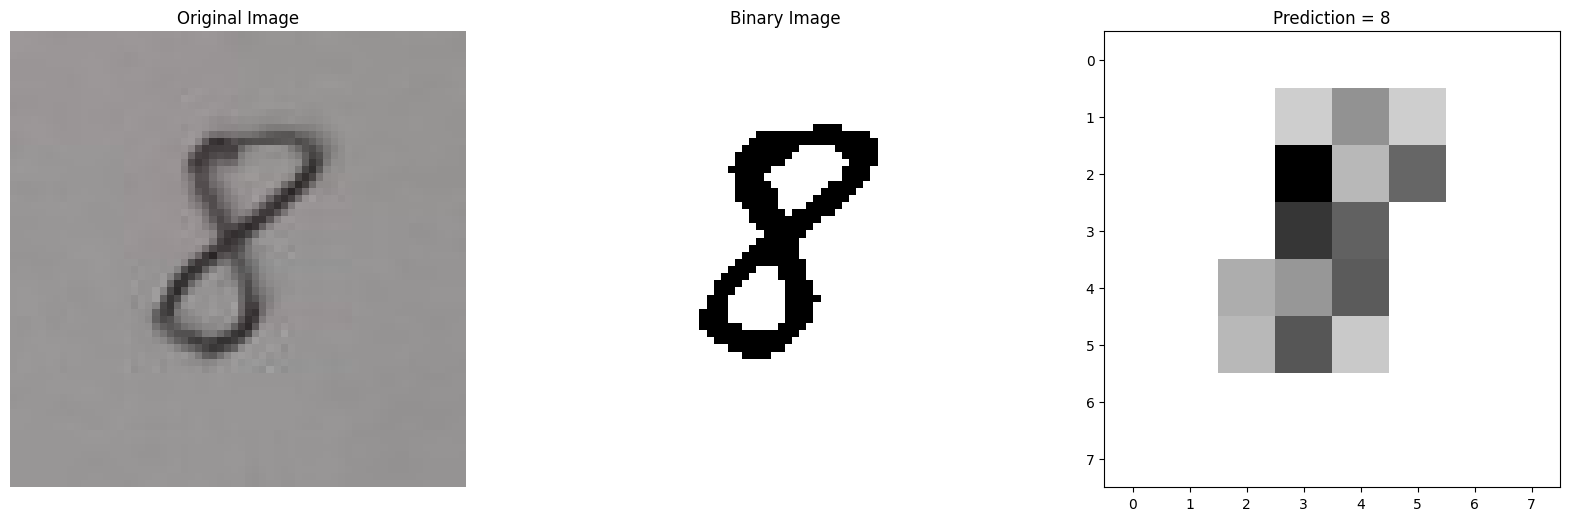

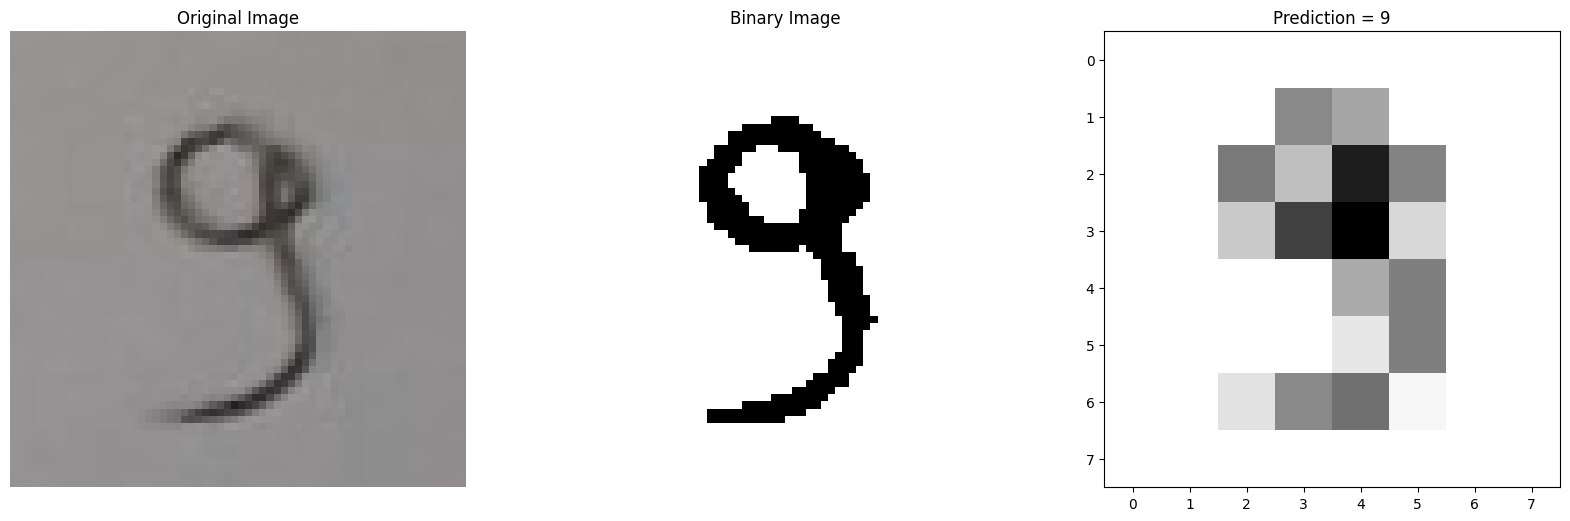

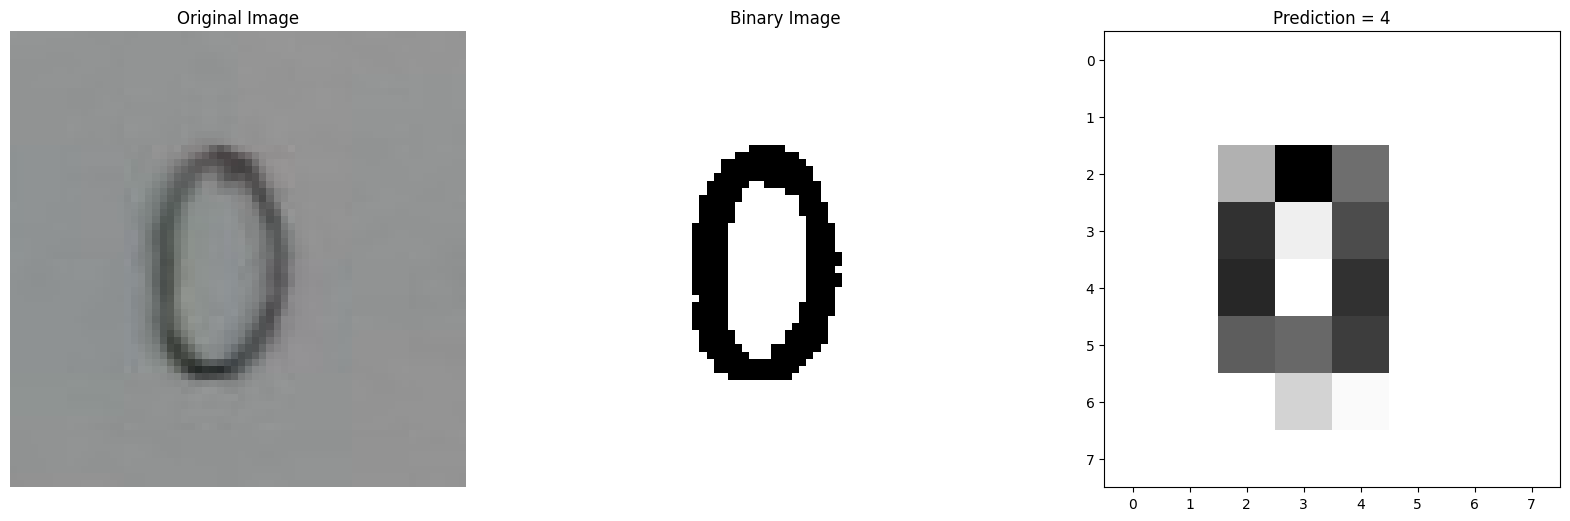

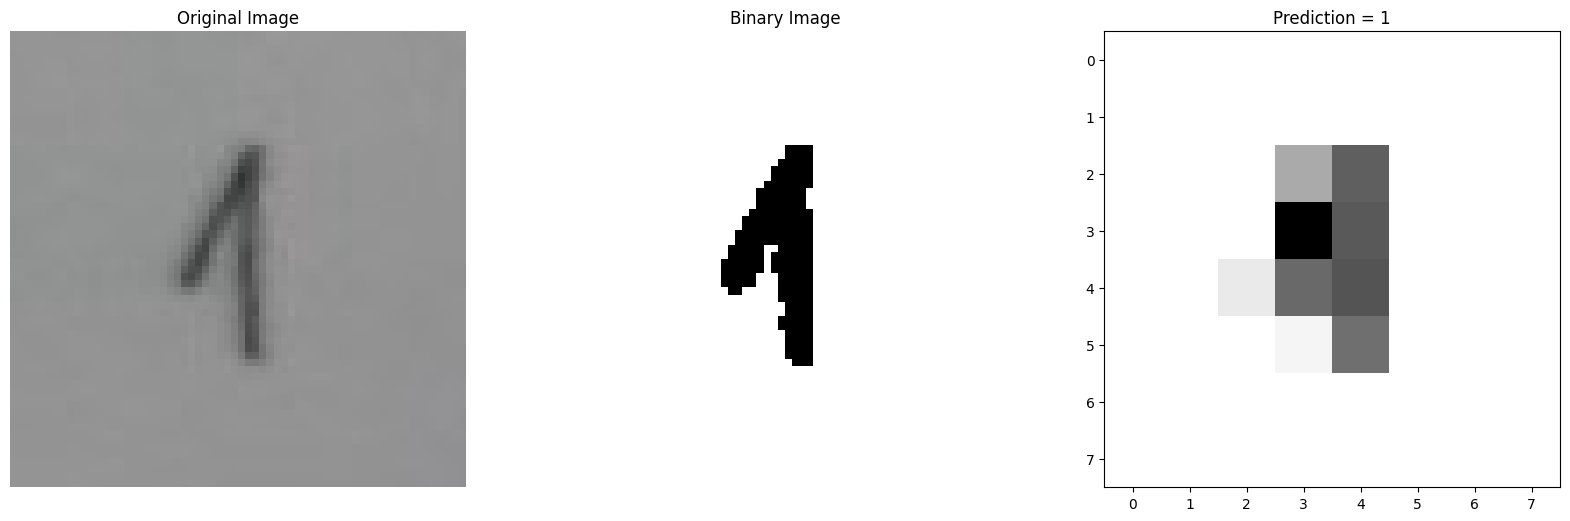

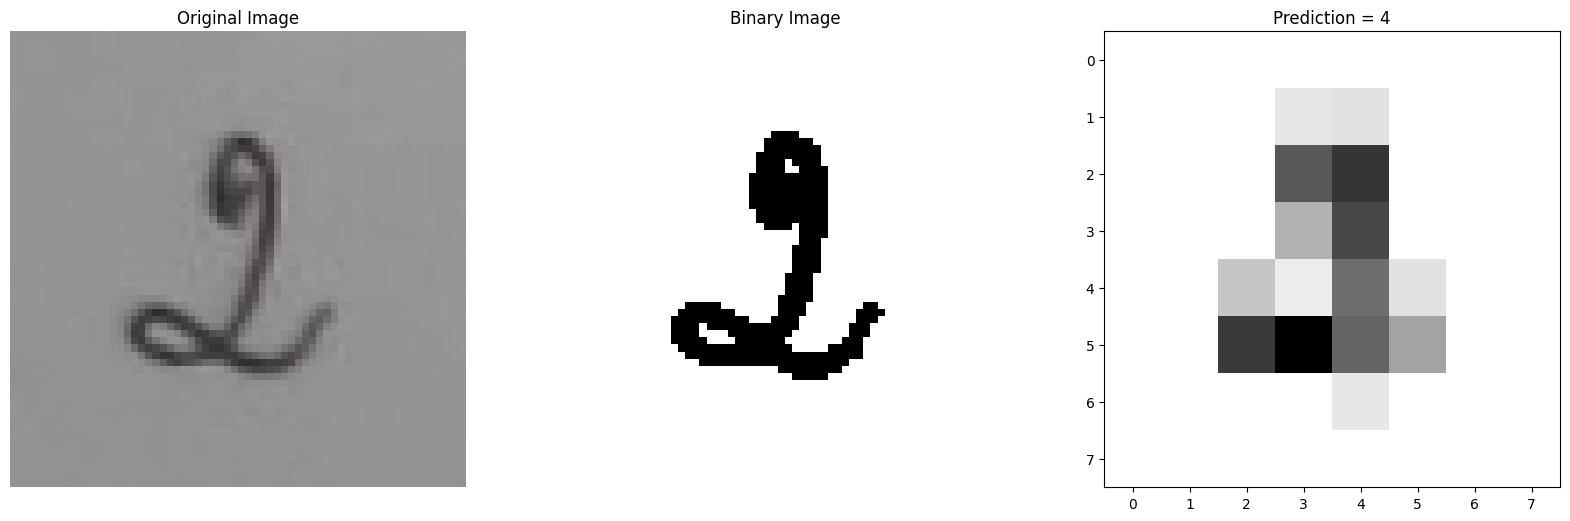

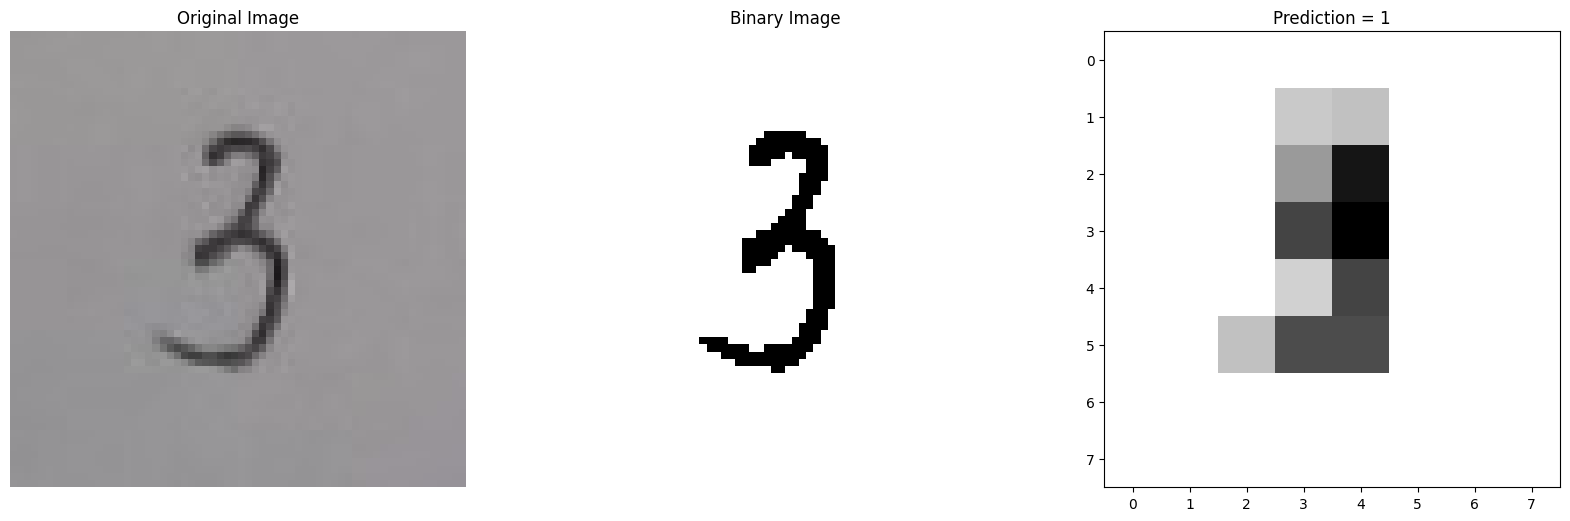

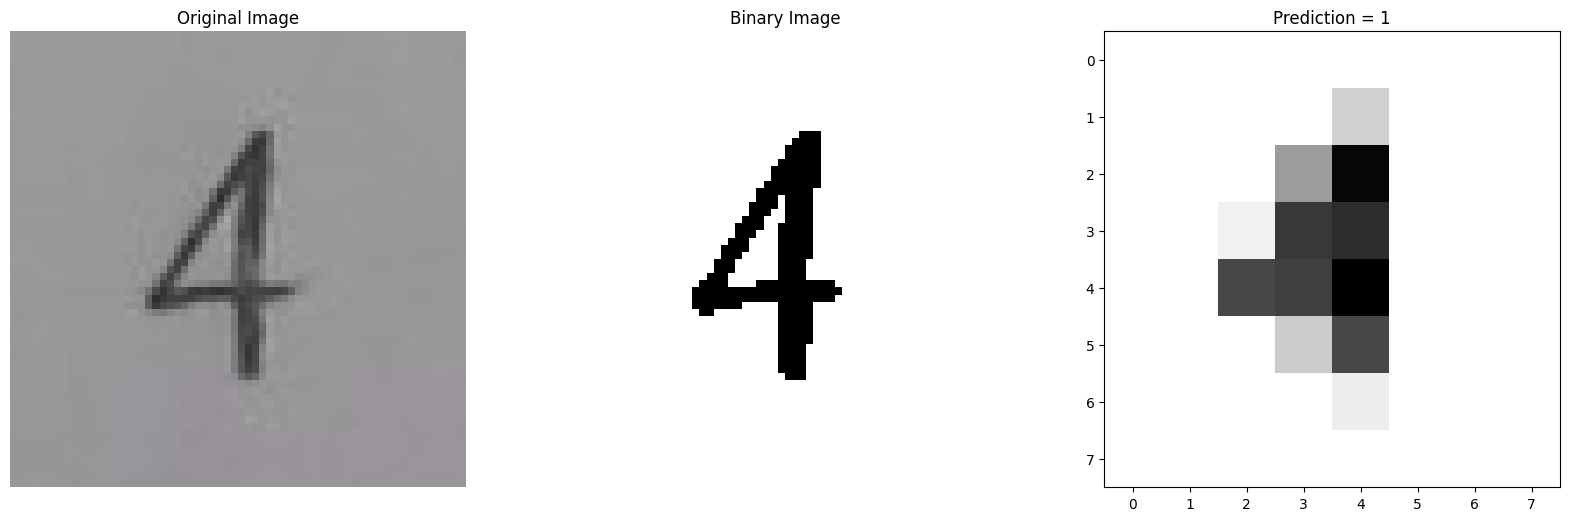

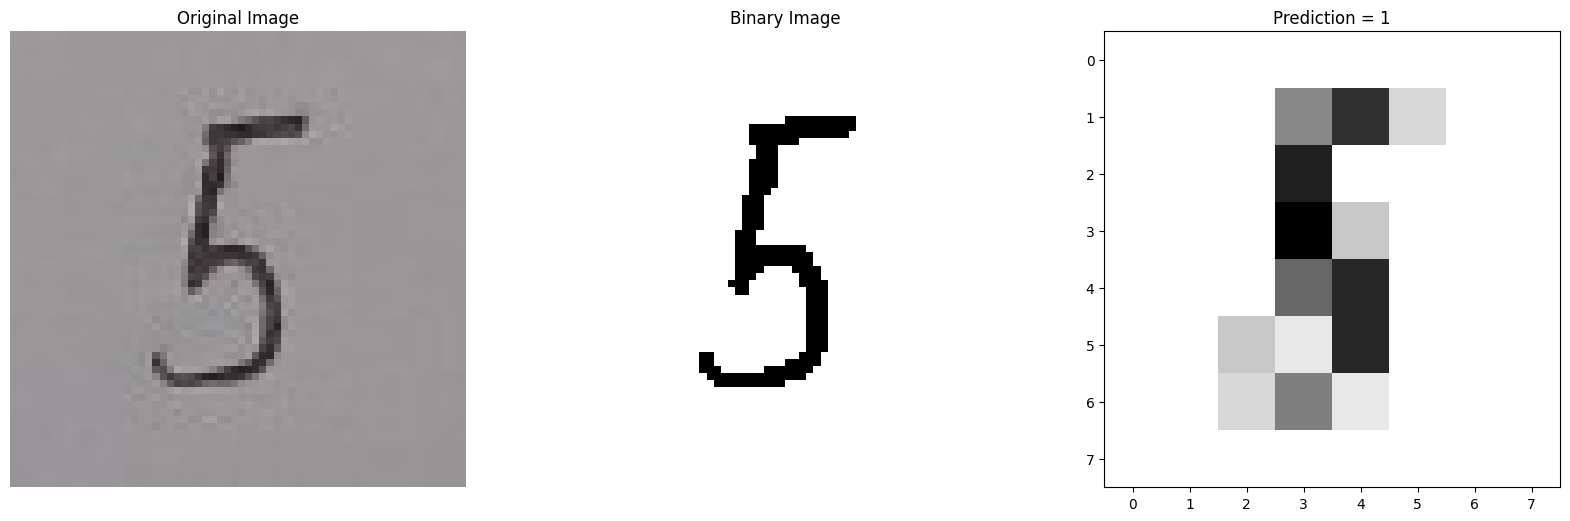

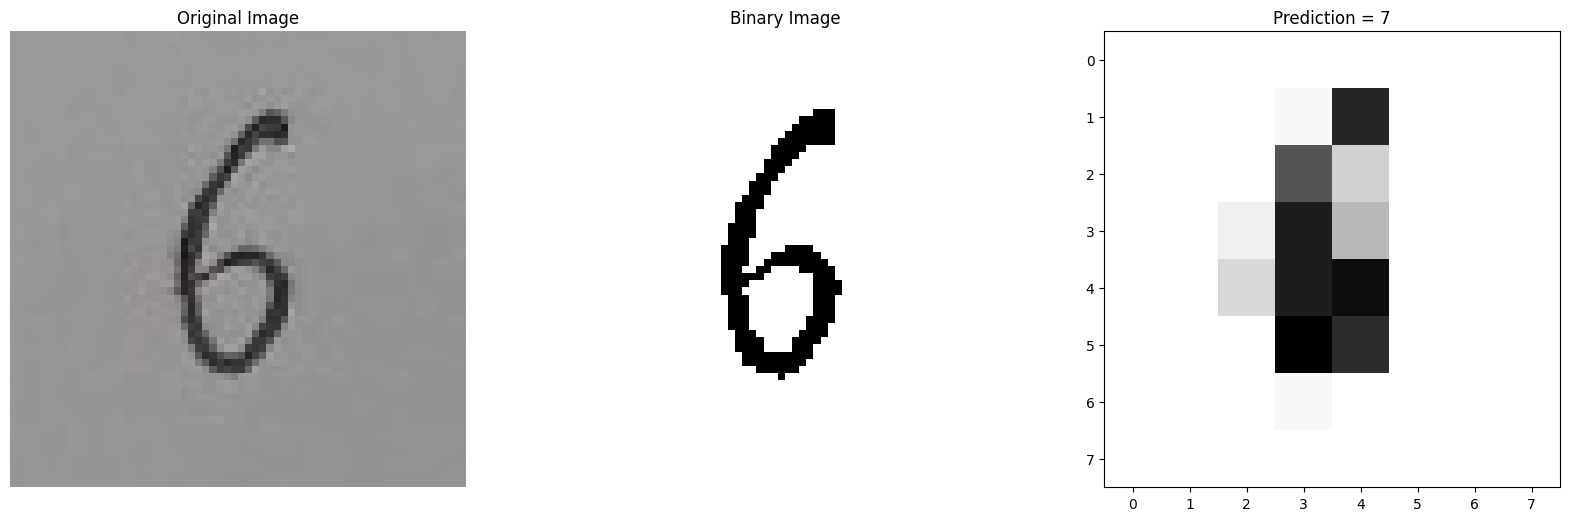

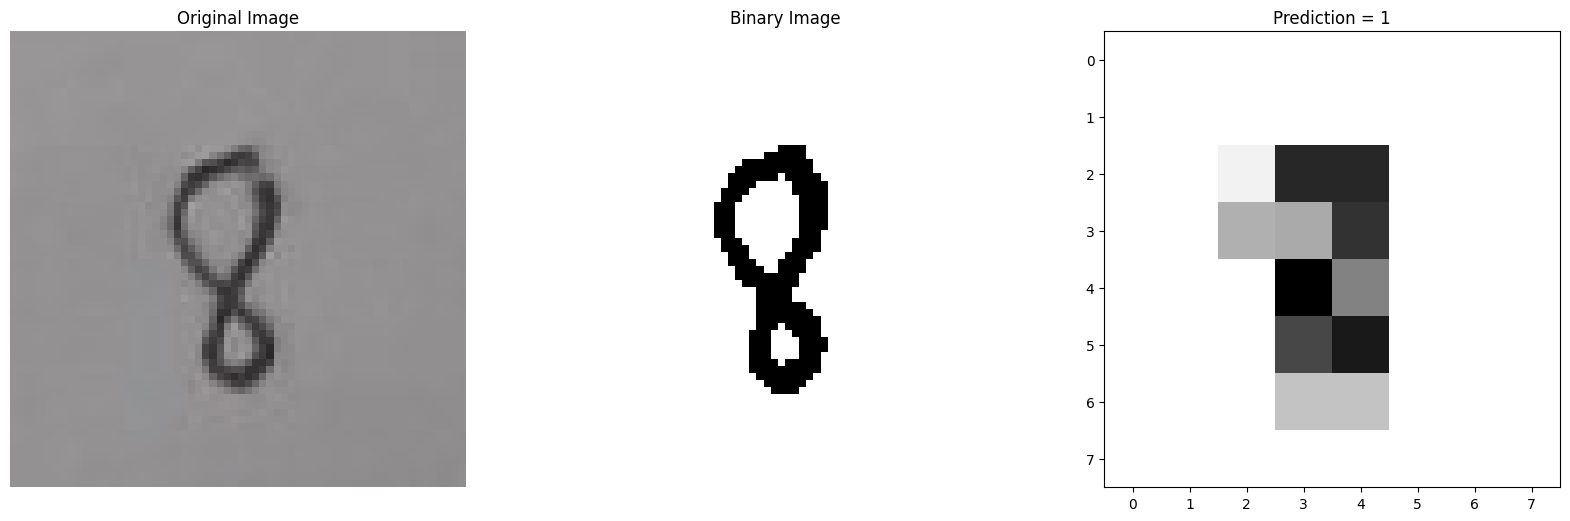

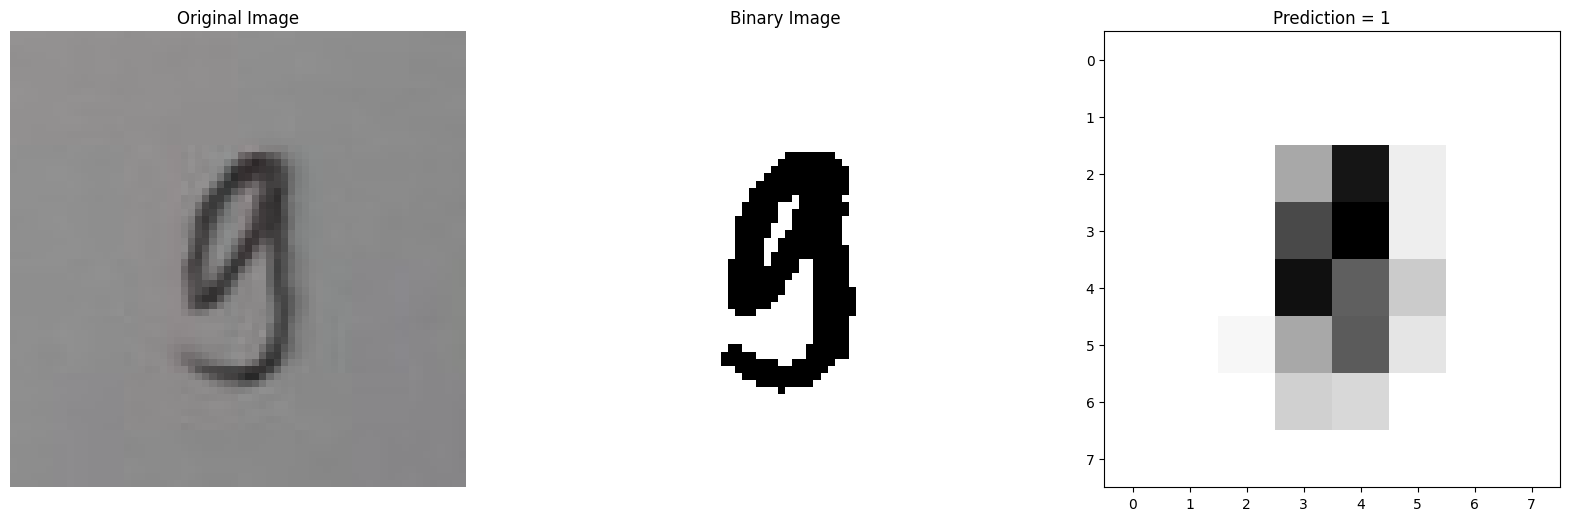

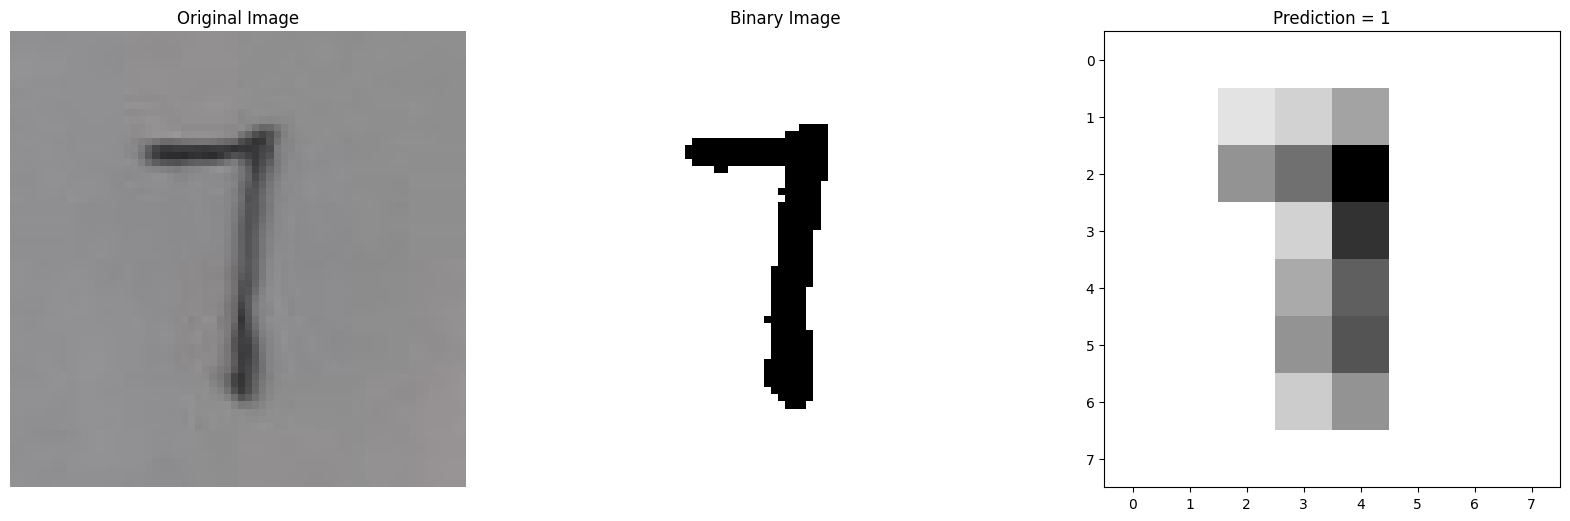

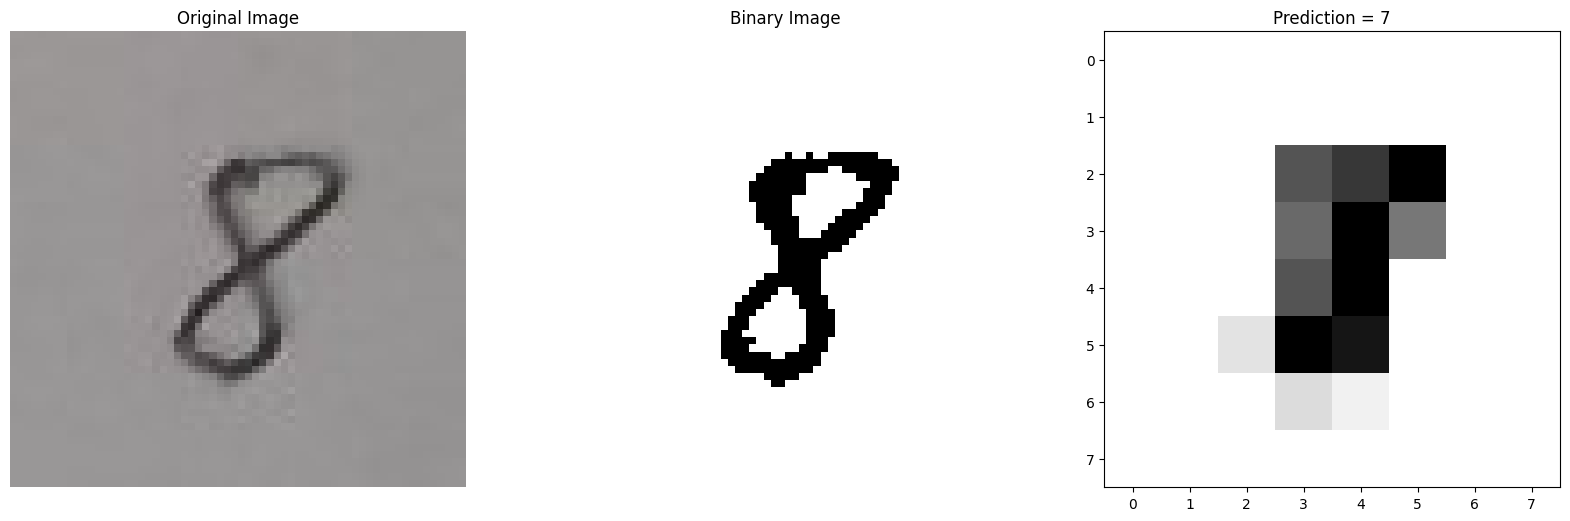

In [119]:
# Số lượng ảnh từ drive
n_images = len(data_drive)
print("Số lượng ảnh từ drive:", n_images)

true_label = []
pred_label = []

# Lặp qua từng ảnh
for i in range(n_images):
  # Thêm nhãn đúng
  true_label.append(int(data_drive[i][0]))

  image = cv2.imread(link_drive + data_drive[i])
  _, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

  # Hiển thị ảnh gốc
  ax = axes[0]
  ax.set_axis_off()
  ax.imshow(image, interpolation="nearest")
  ax.set_title(f'Original Image')

  # Hiển thị ảnh nhị phân
  ax = axes[1]
  ax.set_axis_off()
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # chuyển sang ảnh xám
  im,thre = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV) # chuyển đổi hình ảnh xám thành ảnh nhị phân

  ax.imshow(thre, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f'Binary Image')

  # Ảnh resize
  ax = axes[2]
  a = cv2.resize(thre, (8,8), interpolation=cv2.INTER_AREA)
  a = a/255*16
  ax.imshow(a, cmap =plt.cm.gray_r, interpolation="nearest")
  a = a.reshape(1, 64)
  
  # Hiển thị kết quả dự đoán
  predict = clf.predict(a)
  pred_label.append(predict[0])
  ax.set_title(f'Prediction = {predict[0]}')

In [124]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(true_label, pred_label)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.33      0.88      0.48         8
           2       0.50      0.11      0.18         9
           3       0.00      0.00      0.00         9
           4       0.17      0.22      0.19         9
           5       0.40      0.44      0.42         9
           6       1.00      0.22      0.36         9
           7       0.36      0.56      0.43         9
           8       0.64      0.78      0.70         9
           9       0.44      0.78      0.56         9

    accuracy                           0.41        90
   macro avg       0.48      0.42      0.37        90
weighted avg       0.49      0.41      0.37        90




Confusion matrix:
[[2 1 0 0 4 2 0 1 0 0]
 [0 7 0 0 0 0 0 1 0 0]
 [0 0 1 0 3 2 0 0 3 0]
 [0 4 0 0 0 2 0 2 0 1]
 [0 2 0 0 2 0 0 0 0 5]
 [0 3 0 0 0 4 0 1 0 1]
 [0 0 0 0 3 0 2 3 1 0]
 [0 1 1 0 0 0 0 5 0 2]
 [0 1 0 0 0 0 0 1 7 0]
 [0 2 0 0 0 0 0 0 0 7]]


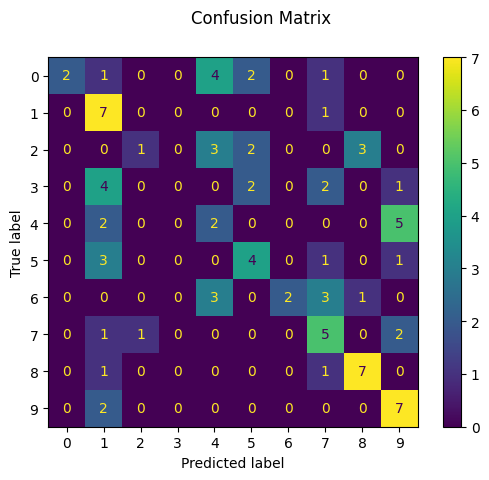

In [125]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(true_label, pred_label)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

##Nhận xét


1. Kết quả
- Số trường hợp đúng:.....
- Tỉ lệ dự đoán đúng:.....




2. Các trường hợp
- Dự đoán đúng:.....
- Dự đoán sai:.....

3. Lý do kết quả dự đoán không tốt trên dữ liệu tự thu thập
- Nét chữ nhạt
- Camera không tốt
- Ảnh thiếu sáng

# Train với dữ liệu tự thu thập

## Xử lí ảnh

In [127]:
# Lấy đường link truy cập vào dataset ảnh từ drive
link_drive = '/content/drive/MyDrive/ML/data/'
data_drive = os.listdir(link_drive)
data_handwritten = np.array([])
data_label = np.array([])

# Số lượng ảnh từ drive
n_images = len(data_drive)
print("Số lượng ảnh từ drive:", n_images)
for i in range(n_images):
  image = cv2.imread(link_drive + data_drive[i])
  
  # Đọc ảnh thang độ xám
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

  # Chuyển đổi hình ảnh thang độ xám thành nhị phân
  im,thre = cv2.threshold(image_gray,127,255,cv2.THRESH_BINARY)

  # Resize
  image_resize = cv2.resize(thre,(8,8),interpolation=cv2.INTER_AREA)
  image_resize = image_resize/255 * 16
  image_resize = image_resize.reshape(1, 64)

  # tạo dữ liệu, nhãn 
  data_handwritten = np.vstack((data_handwritten, image_resize)) if data_handwritten.size else image_resize
  data_label = np.append(data_label,data_drive[i][0])

Số lượng ảnh từ drive: 90


In [128]:
data_handwritten.shape

(90, 64)

In [129]:
data_label.shape

(90,)

## Train

In [130]:
# Create a classifier: a support vector classifier
clf1 = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    data_handwritten, data_label, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf1.fit(X_train1, y_train1)

# Predict the value of the digit on the test subset
predicted1 = clf1.predict(X_test1)

In [131]:
print(f"Classification report for classifier {clf1}:\n"
      f"{metrics.classification_report(y_test1, predicted1)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.16      1.00      0.28         4
           2       0.33      0.75      0.46         4
           3       0.33      0.25      0.29         4
           4       1.00      0.25      0.40         4
           5       1.00      0.20      0.33         5
           6       0.00      0.00      0.00         5
           7       1.00      0.40      0.57         5
           8       0.00      0.00      0.00         5
           9       1.00      0.20      0.33         5

    accuracy                           0.33        45
   macro avg       0.55      0.36      0.32        45
weighted avg       0.55      0.33      0.31        45




Confusion matrix:
[[2 2 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 0 0]
 [0 3 0 1 0 0 0 0 0 0]
 [0 3 0 0 1 0 0 0 0 0]
 [1 1 2 0 0 1 0 0 0 0]
 [0 3 2 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 2 0 0]
 [0 3 2 0 0 0 0 0 0 0]
 [0 2 0 2 0 0 0 0 0 1]]


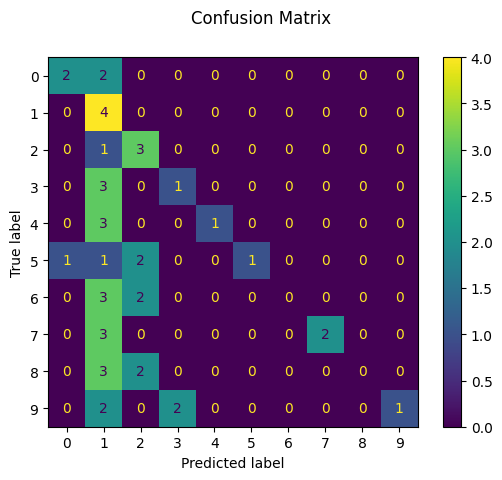

In [132]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test1, predicted1)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [135]:
tp = np.trace(disp.confusion_matrix)
print("TP:", tp)

TP: 15


## Nhận xét

1. Kết quả
- Số trường hợp đúng: 15
- Tỉ lệ dự đoán đúng: 0.33




2. Các trường hợp
- Dự đoán đúng: nét chữ đậm, rõ ràng
- Dự đoán sai: các số thường bị dự đoán là số 1, các trường hợp số viết bị hẹp

3. Lý do kết quả dự đoán không tốt trên dữ liệu tự thu thập
- Nét chữ nhạt
- Camera không tốt
- Ảnh thiếu sáng